In [1]:
from rl_ood import *
path = Path.cwd()

In [2]:
default_values = PENDULUM_VALUES
default_values

{'Gravity': 10.0,
 'Mass_pole': 1.0,
 'Length_pole': 1.0,
 'Max_speed': 8.0,
 'Max_torque': 2.0}

In [3]:
values = create_ood_values(default_values)
ood_configs = get_ood_configs(values, values)
len(ood_configs)



50

# OOD environments instantiation

In [4]:
default_values, values = get_pendulum_values()
default_values

{'Gravity': 10.0,
 'Mass_pole': 1.0,
 'Length_pole': 1.0,
 'Max_speed': 8.0,
 'Max_torque': 2.0}

Each ood config differs from the defaut environment by only one attribute.

In [5]:
ood_configs = get_ood_configs(default_values, values)
len(ood_configs)


40

In [6]:
ood_configs[0]

{'Gravity': 0.5,
 'Mass_pole': 1.0,
 'Length_pole': 1.0,
 'Max_speed': 8.0,
 'Max_torque': 2.0,
 'change': 'Gravity'}

# Evaluate OOD impact

### Original environment

We train an agent on the original environment, and we evaluate its performances

In [7]:
instanciate_pendulum(default_values)

<TimeLimit<PendulumEnv<Pendulum-v1>>>

In [8]:
env = instanciate_pendulum(default_values)
path_agent = path / 'Agents' / 'trained_pendulum'
#if os.path.exists(path_agent):
#    agent = PPO.load(path_agent)
#else:
agent = PPO(
    "MlpPolicy",
    env,
    gamma=0.98,
    use_sde=True,
    sde_sample_freq=4,
    learning_rate=1e-3,
    verbose=1,
)
agent.learn(1000000, progress_bar=True)
agent.save(path_agent)
evaluate(env, agent, nb_episodes=10, render=True)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -5.48e+03 |
| time/              |           |
|    fps             | 927       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -5.9e+03     |
| time/                   |              |
|    fps                  | 641          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0047011315 |
|    clip_fraction        | 0.0456       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.77        |
|    explained_variance   | 0.00645      |
|    learning_rate        | 0.001        |
|    loss                 | 1.31e+03     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00589     |
|    std                  | 0.991        |
|    value_loss           | 4.92e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -6.04e+03   |
| time/                   |             |
|    fps                  | 636         |
|    iterations           | 3           |
|    time_elapsed         | 9           |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.007638103 |
|    clip_fraction        | 0.0304      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.62       |
|    explained_variance   | 0.00439     |
|    learning_rate        | 0.001       |
|    loss                 | 2.34e+03    |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.00869    |
|    std                  | 0.984       |
|    value_loss           | 5.52e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -6.03e+03    |
| time/                   |              |
|    fps                  | 632          |
|    iterations           | 4            |
|    time_elapsed         | 12           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0097216405 |
|    clip_fraction        | 0.0794       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.6         |
|    explained_variance   | 0.00293      |
|    learning_rate        | 0.001        |
|    loss                 | 1.61e+03     |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.0115      |
|    std                  | 0.952        |
|    value_loss           | 4.75e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -6e+03      |
| time/                   |             |
|    fps                  | 596         |
|    iterations           | 5           |
|    time_elapsed         | 17          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.004504931 |
|    clip_fraction        | 0.033       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.66       |
|    explained_variance   | 0.00151     |
|    learning_rate        | 0.001       |
|    loss                 | 1.33e+03    |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00257    |
|    std                  | 0.953       |
|    value_loss           | 3.76e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -5.96e+03    |
| time/                   |              |
|    fps                  | 593          |
|    iterations           | 6            |
|    time_elapsed         | 20           |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0071278038 |
|    clip_fraction        | 0.0616       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.69        |
|    explained_variance   | 0.000686     |
|    learning_rate        | 0.001        |
|    loss                 | 1.04e+03     |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.00623     |
|    std                  | 0.94         |
|    value_loss           | 2.57e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -5.9e+03     |
| time/                   |              |
|    fps                  | 586          |
|    iterations           | 7            |
|    time_elapsed         | 24           |
|    total_timesteps      | 14336        |
| train/                  |              |
|    approx_kl            | 0.0121584665 |
|    clip_fraction        | 0.127        |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.73        |
|    explained_variance   | 0.000366     |
|    learning_rate        | 0.001        |
|    loss                 | 535          |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.0143      |
|    std                  | 0.944        |
|    value_loss           | 1.7e+03      |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -5.86e+03  |
| time/                   |            |
|    fps                  | 578        |
|    iterations           | 8          |
|    time_elapsed         | 28         |
|    total_timesteps      | 16384      |
| train/                  |            |
|    approx_kl            | 0.00606463 |
|    clip_fraction        | 0.0565     |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.68      |
|    explained_variance   | 0.000203   |
|    learning_rate        | 0.001      |
|    loss                 | 339        |
|    n_updates            | 70         |
|    policy_gradient_loss | -0.00804   |
|    std                  | 0.928      |
|    value_loss           | 1.4e+03    |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.79e+03   |
| time/                   |             |
|    fps                  | 581         |
|    iterations           | 9           |
|    time_elapsed         | 31          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.011487009 |
|    clip_fraction        | 0.0796      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.62       |
|    explained_variance   | 0.000249    |
|    learning_rate        | 0.001       |
|    loss                 | 381         |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.00712    |
|    std                  | 0.874       |
|    value_loss           | 1.19e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.71e+03   |
| time/                   |             |
|    fps                  | 581         |
|    iterations           | 10          |
|    time_elapsed         | 35          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.007246679 |
|    clip_fraction        | 0.0904      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.61       |
|    explained_variance   | 0.000648    |
|    learning_rate        | 0.001       |
|    loss                 | 270         |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0102     |
|    std                  | 0.85        |
|    value_loss           | 658         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.65e+03   |
| time/                   |             |
|    fps                  | 579         |
|    iterations           | 11          |
|    time_elapsed         | 38          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.009954321 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.57       |
|    explained_variance   | 0.207       |
|    learning_rate        | 0.001       |
|    loss                 | 192         |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0122     |
|    std                  | 0.807       |
|    value_loss           | 617         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.59e+03   |
| time/                   |             |
|    fps                  | 576         |
|    iterations           | 12          |
|    time_elapsed         | 42          |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.009077607 |
|    clip_fraction        | 0.117       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.57       |
|    explained_variance   | 0.336       |
|    learning_rate        | 0.001       |
|    loss                 | 99.9        |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0081     |
|    std                  | 0.778       |
|    value_loss           | 331         |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -5.54e+03 |
| time/                   |           |
|    fps                  | 578       |
|    iterations           | 13        |
|    time_elapsed         | 46        |
|    total_timesteps      | 26624     |
| train/                  |           |
|    approx_kl            | 0.0137865 |
|    clip_fraction        | 0.162     |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.56     |
|    explained_variance   | 0.561     |
|    learning_rate        | 0.001     |
|    loss                 | 143       |
|    n_updates            | 120       |
|    policy_gradient_loss | -0.0196   |
|    std                  | 0.746     |
|    value_loss           | 321       |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.48e+03   |
| time/                   |             |
|    fps                  | 582         |
|    iterations           | 14          |
|    time_elapsed         | 49          |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.017920718 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.5        |
|    explained_variance   | 0.647       |
|    learning_rate        | 0.001       |
|    loss                 | 138         |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0162     |
|    std                  | 0.714       |
|    value_loss           | 274         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -5.41e+03  |
| time/                   |            |
|    fps                  | 580        |
|    iterations           | 15         |
|    time_elapsed         | 52         |
|    total_timesteps      | 30720      |
| train/                  |            |
|    approx_kl            | 0.01349612 |
|    clip_fraction        | 0.188      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.46      |
|    explained_variance   | 0.708      |
|    learning_rate        | 0.001      |
|    loss                 | 116        |
|    n_updates            | 140        |
|    policy_gradient_loss | -0.0227    |
|    std                  | 0.703      |
|    value_loss           | 238        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.32e+03   |
| time/                   |             |
|    fps                  | 571         |
|    iterations           | 16          |
|    time_elapsed         | 57          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.015357187 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.44       |
|    explained_variance   | 0.714       |
|    learning_rate        | 0.001       |
|    loss                 | 128         |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0196     |
|    std                  | 0.672       |
|    value_loss           | 259         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.23e+03   |
| time/                   |             |
|    fps                  | 570         |
|    iterations           | 17          |
|    time_elapsed         | 61          |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.022328347 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.36       |
|    explained_variance   | 0.816       |
|    learning_rate        | 0.001       |
|    loss                 | 84.3        |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.0264     |
|    std                  | 0.638       |
|    value_loss           | 152         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -5.13e+03    |
| time/                   |              |
|    fps                  | 562          |
|    iterations           | 18           |
|    time_elapsed         | 65           |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0155546935 |
|    clip_fraction        | 0.185        |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.33        |
|    explained_variance   | 0.738        |
|    learning_rate        | 0.001        |
|    loss                 | 104          |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.0269      |
|    std                  | 0.632        |
|    value_loss           | 251          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.02e+03   |
| time/                   |             |
|    fps                  | 567         |
|    iterations           | 19          |
|    time_elapsed         | 68          |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.010069288 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.32       |
|    explained_variance   | 0.831       |
|    learning_rate        | 0.001       |
|    loss                 | 64.2        |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.0178     |
|    std                  | 0.615       |
|    value_loss           | 195         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -4.88e+03   |
| time/                   |             |
|    fps                  | 567         |
|    iterations           | 20          |
|    time_elapsed         | 72          |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.016648658 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.24       |
|    explained_variance   | 0.821       |
|    learning_rate        | 0.001       |
|    loss                 | 111         |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0161     |
|    std                  | 0.596       |
|    value_loss           | 236         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -4.7e+03   |
| time/                   |            |
|    fps                  | 564        |
|    iterations           | 21         |
|    time_elapsed         | 76         |
|    total_timesteps      | 43008      |
| train/                  |            |
|    approx_kl            | 0.01800426 |
|    clip_fraction        | 0.123      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.12      |
|    explained_variance   | 0.787      |
|    learning_rate        | 0.001      |
|    loss                 | 165        |
|    n_updates            | 200        |
|    policy_gradient_loss | -0.0125    |
|    std                  | 0.575      |
|    value_loss           | 344        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -4.58e+03   |
| time/                   |             |
|    fps                  | 562         |
|    iterations           | 22          |
|    time_elapsed         | 80          |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.011668731 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.17       |
|    explained_variance   | 0.819       |
|    learning_rate        | 0.001       |
|    loss                 | 155         |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.014      |
|    std                  | 0.555       |
|    value_loss           | 376         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -4.48e+03  |
| time/                   |            |
|    fps                  | 549        |
|    iterations           | 23         |
|    time_elapsed         | 85         |
|    total_timesteps      | 47104      |
| train/                  |            |
|    approx_kl            | 0.03543345 |
|    clip_fraction        | 0.154      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.09      |
|    explained_variance   | 0.81       |
|    learning_rate        | 0.001      |
|    loss                 | 185        |
|    n_updates            | 220        |
|    policy_gradient_loss | -0.00793   |
|    std                  | 0.53       |
|    value_loss           | 321        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -4.35e+03   |
| time/                   |             |
|    fps                  | 552         |
|    iterations           | 24          |
|    time_elapsed         | 89          |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.029897103 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.07       |
|    explained_variance   | 0.819       |
|    learning_rate        | 0.001       |
|    loss                 | 206         |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0301     |
|    std                  | 0.516       |
|    value_loss           | 414         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -4.24e+03   |
| time/                   |             |
|    fps                  | 554         |
|    iterations           | 25          |
|    time_elapsed         | 92          |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.015662424 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.95       |
|    explained_variance   | 0.826       |
|    learning_rate        | 0.001       |
|    loss                 | 189         |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0168     |
|    std                  | 0.499       |
|    value_loss           | 300         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -4.11e+03   |
| time/                   |             |
|    fps                  | 543         |
|    iterations           | 26          |
|    time_elapsed         | 97          |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.017506832 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.87       |
|    explained_variance   | 0.847       |
|    learning_rate        | 0.001       |
|    loss                 | 125         |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0117     |
|    std                  | 0.476       |
|    value_loss           | 229         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -4.01e+03   |
| time/                   |             |
|    fps                  | 530         |
|    iterations           | 27          |
|    time_elapsed         | 104         |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.019953925 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0.907       |
|    learning_rate        | 0.001       |
|    loss                 | 77.3        |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.0017     |
|    std                  | 0.472       |
|    value_loss           | 115         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.89e+03   |
| time/                   |             |
|    fps                  | 522         |
|    iterations           | 28          |
|    time_elapsed         | 109         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.014363334 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.001       |
|    loss                 | 93          |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.00699    |
|    std                  | 0.449       |
|    value_loss           | 212         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.78e+03   |
| time/                   |             |
|    fps                  | 523         |
|    iterations           | 29          |
|    time_elapsed         | 113         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.028390624 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.001       |
|    loss                 | 97.5        |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.0071     |
|    std                  | 0.435       |
|    value_loss           | 146         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.67e+03   |
| time/                   |             |
|    fps                  | 522         |
|    iterations           | 30          |
|    time_elapsed         | 117         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.060291246 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.001       |
|    loss                 | 64.7        |
|    n_updates            | 290         |
|    policy_gradient_loss | 0.00343     |
|    std                  | 0.428       |
|    value_loss           | 83.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.57e+03   |
| time/                   |             |
|    fps                  | 523         |
|    iterations           | 31          |
|    time_elapsed         | 121         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.017492017 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.001       |
|    loss                 | 18.6        |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00093    |
|    std                  | 0.411       |
|    value_loss           | 98.5        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -3.46e+03  |
| time/                   |            |
|    fps                  | 518        |
|    iterations           | 32         |
|    time_elapsed         | 126        |
|    total_timesteps      | 65536      |
| train/                  |            |
|    approx_kl            | 0.04165906 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.52      |
|    explained_variance   | 0.904      |
|    learning_rate        | 0.001      |
|    loss                 | 20.8       |
|    n_updates            | 310        |
|    policy_gradient_loss | 0.00521    |
|    std                  | 0.389      |
|    value_loss           | 77.6       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.38e+03   |
| time/                   |             |
|    fps                  | 519         |
|    iterations           | 33          |
|    time_elapsed         | 130         |
|    total_timesteps      | 67584       |
| train/                  |             |
|    approx_kl            | 0.053955324 |
|    clip_fraction        | 0.528       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.001       |
|    loss                 | 1.35        |
|    n_updates            | 320         |
|    policy_gradient_loss | 0.0326      |
|    std                  | 0.342       |
|    value_loss           | 2.45        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.29e+03   |
| time/                   |             |
|    fps                  | 516         |
|    iterations           | 34          |
|    time_elapsed         | 134         |
|    total_timesteps      | 69632       |
| train/                  |             |
|    approx_kl            | 0.010014792 |
|    clip_fraction        | 0.0702      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.852       |
|    learning_rate        | 0.001       |
|    loss                 | 70.5        |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.00825    |
|    std                  | 0.341       |
|    value_loss           | 133         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -3.22e+03  |
| time/                   |            |
|    fps                  | 511        |
|    iterations           | 35         |
|    time_elapsed         | 140        |
|    total_timesteps      | 71680      |
| train/                  |            |
|    approx_kl            | 0.03558126 |
|    clip_fraction        | 0.353      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.5       |
|    explained_variance   | 0.879      |
|    learning_rate        | 0.001      |
|    loss                 | 0.514      |
|    n_updates            | 340        |
|    policy_gradient_loss | -0.00136   |
|    std                  | 0.338      |
|    value_loss           | 2.35       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.14e+03   |
| time/                   |             |
|    fps                  | 512         |
|    iterations           | 36          |
|    time_elapsed         | 143         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.008180603 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.919       |
|    learning_rate        | 0.001       |
|    loss                 | 92.7        |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.0107     |
|    std                  | 0.338       |
|    value_loss           | 103         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -3.13e+03    |
| time/                   |              |
|    fps                  | 513          |
|    iterations           | 37           |
|    time_elapsed         | 147          |
|    total_timesteps      | 75776        |
| train/                  |              |
|    approx_kl            | 0.0058447598 |
|    clip_fraction        | 0.0396       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | 0.915        |
|    learning_rate        | 0.001        |
|    loss                 | 165          |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.0125      |
|    std                  | 0.338        |
|    value_loss           | 249          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.09e+03   |
| time/                   |             |
|    fps                  | 514         |
|    iterations           | 38          |
|    time_elapsed         | 151         |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.004957409 |
|    clip_fraction        | 0.0281      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.63       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.001       |
|    loss                 | 127         |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.00798    |
|    std                  | 0.337       |
|    value_loss           | 365         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -3.05e+03    |
| time/                   |              |
|    fps                  | 512          |
|    iterations           | 39           |
|    time_elapsed         | 155          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0040622926 |
|    clip_fraction        | 0.0274       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.65        |
|    explained_variance   | 0.921        |
|    learning_rate        | 0.001        |
|    loss                 | 349          |
|    n_updates            | 380          |
|    policy_gradient_loss | -0.00964     |
|    std                  | 0.335        |
|    value_loss           | 444          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -2.99e+03    |
| time/                   |              |
|    fps                  | 510          |
|    iterations           | 40           |
|    time_elapsed         | 160          |
|    total_timesteps      | 81920        |
| train/                  |              |
|    approx_kl            | 0.0097162705 |
|    clip_fraction        | 0.0518       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.58        |
|    explained_variance   | 0.921        |
|    learning_rate        | 0.001        |
|    loss                 | 147          |
|    n_updates            | 390          |
|    policy_gradient_loss | -0.0191      |
|    std                  | 0.334        |
|    value_loss           | 301          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -2.92e+03    |
| time/                   |              |
|    fps                  | 509          |
|    iterations           | 41           |
|    time_elapsed         | 164          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0070800073 |
|    clip_fraction        | 0.0571       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.49        |
|    explained_variance   | 0.908        |
|    learning_rate        | 0.001        |
|    loss                 | 14.2         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.0134      |
|    std                  | 0.329        |
|    value_loss           | 98.2         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.84e+03   |
| time/                   |             |
|    fps                  | 508         |
|    iterations           | 42          |
|    time_elapsed         | 169         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.020946862 |
|    clip_fraction        | 0.0858      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.001       |
|    loss                 | 7.01        |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.0143     |
|    std                  | 0.331       |
|    value_loss           | 23.1        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -2.78e+03    |
| time/                   |              |
|    fps                  | 507          |
|    iterations           | 43           |
|    time_elapsed         | 173          |
|    total_timesteps      | 88064        |
| train/                  |              |
|    approx_kl            | 0.0041153682 |
|    clip_fraction        | 0.0724       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.49        |
|    explained_variance   | 0.944        |
|    learning_rate        | 0.001        |
|    loss                 | 18.1         |
|    n_updates            | 420          |
|    policy_gradient_loss | -0.00614     |
|    std                  | 0.333        |
|    value_loss           | 92.7         |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.74e+03  |
| time/                   |            |
|    fps                  | 508        |
|    iterations           | 44         |
|    time_elapsed         | 177        |
|    total_timesteps      | 90112      |
| train/                  |            |
|    approx_kl            | 0.02546575 |
|    clip_fraction        | 0.201      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.48      |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.001      |
|    loss                 | 1.29       |
|    n_updates            | 430        |
|    policy_gradient_loss | -0.0121    |
|    std                  | 0.327      |
|    value_loss           | 17.8       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.69e+03   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 45          |
|    time_elapsed         | 182         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.007903594 |
|    clip_fraction        | 0.0624      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.92        |
|    learning_rate        | 0.001       |
|    loss                 | 13.4        |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.0076     |
|    std                  | 0.326       |
|    value_loss           | 73.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.64e+03   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 46          |
|    time_elapsed         | 187         |
|    total_timesteps      | 94208       |
| train/                  |             |
|    approx_kl            | 0.009642431 |
|    clip_fraction        | 0.0971      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.47       |
|    explained_variance   | 0.912       |
|    learning_rate        | 0.001       |
|    loss                 | 116         |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.011      |
|    std                  | 0.322       |
|    value_loss           | 150         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.6e+03    |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 47          |
|    time_elapsed         | 192         |
|    total_timesteps      | 96256       |
| train/                  |             |
|    approx_kl            | 0.017039523 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.908       |
|    learning_rate        | 0.001       |
|    loss                 | 21.4        |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.0121     |
|    std                  | 0.316       |
|    value_loss           | 98.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.55e+03   |
| time/                   |             |
|    fps                  | 498         |
|    iterations           | 48          |
|    time_elapsed         | 197         |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.029878158 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.001       |
|    loss                 | 11.7        |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.0219     |
|    std                  | 0.315       |
|    value_loss           | 52.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.52e+03  |
| time/                   |            |
|    fps                  | 496        |
|    iterations           | 49         |
|    time_elapsed         | 202        |
|    total_timesteps      | 100352     |
| train/                  |            |
|    approx_kl            | 0.03971407 |
|    clip_fraction        | 0.459      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.4       |
|    explained_variance   | 0.906      |
|    learning_rate        | 0.001      |
|    loss                 | 3.51       |
|    n_updates            | 480        |
|    policy_gradient_loss | 0.0212     |
|    std                  | 0.313      |
|    value_loss           | 36.2       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.41e+03   |
| time/                   |             |
|    fps                  | 491         |
|    iterations           | 50          |
|    time_elapsed         | 208         |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.016835995 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.826       |
|    learning_rate        | 0.001       |
|    loss                 | 3.85        |
|    n_updates            | 490         |
|    policy_gradient_loss | -0.0161     |
|    std                  | 0.307       |
|    value_loss           | 87.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.37e+03  |
| time/                   |            |
|    fps                  | 487        |
|    iterations           | 51         |
|    time_elapsed         | 214        |
|    total_timesteps      | 104448     |
| train/                  |            |
|    approx_kl            | 0.03580416 |
|    clip_fraction        | 0.285      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.849      |
|    learning_rate        | 0.001      |
|    loss                 | 1.44       |
|    n_updates            | 500        |
|    policy_gradient_loss | -0.000818  |
|    std                  | 0.296      |
|    value_loss           | 27.1       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.4e+03    |
| time/                   |             |
|    fps                  | 484         |
|    iterations           | 52          |
|    time_elapsed         | 219         |
|    total_timesteps      | 106496      |
| train/                  |             |
|    approx_kl            | 0.021993097 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.72        |
|    learning_rate        | 0.001       |
|    loss                 | 18          |
|    n_updates            | 510         |
|    policy_gradient_loss | -0.0152     |
|    std                  | 0.298       |
|    value_loss           | 550         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -2.4e+03     |
| time/                   |              |
|    fps                  | 482          |
|    iterations           | 53           |
|    time_elapsed         | 225          |
|    total_timesteps      | 108544       |
| train/                  |              |
|    approx_kl            | 0.0039075078 |
|    clip_fraction        | 0.0304       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.79        |
|    explained_variance   | 0.732        |
|    learning_rate        | 0.001        |
|    loss                 | 64.8         |
|    n_updates            | 520          |
|    policy_gradient_loss | -0.00616     |
|    std                  | 0.302        |
|    value_loss           | 1.21e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.43e+03   |
| time/                   |             |
|    fps                  | 478         |
|    iterations           | 54          |
|    time_elapsed         | 231         |
|    total_timesteps      | 110592      |
| train/                  |             |
|    approx_kl            | 0.024696577 |
|    clip_fraction        | 0.255       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.68       |
|    explained_variance   | 0.611       |
|    learning_rate        | 0.001       |
|    loss                 | 75          |
|    n_updates            | 530         |
|    policy_gradient_loss | -0.0278     |
|    std                  | 0.303       |
|    value_loss           | 532         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -2.47e+03    |
| time/                   |              |
|    fps                  | 478          |
|    iterations           | 55           |
|    time_elapsed         | 235          |
|    total_timesteps      | 112640       |
| train/                  |              |
|    approx_kl            | 0.0050310674 |
|    clip_fraction        | 0.0386       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.79        |
|    explained_variance   | -2.38        |
|    learning_rate        | 0.001        |
|    loss                 | 72.7         |
|    n_updates            | 540          |
|    policy_gradient_loss | -0.00411     |
|    std                  | 0.305        |
|    value_loss           | 687          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.48e+03   |
| time/                   |             |
|    fps                  | 477         |
|    iterations           | 56          |
|    time_elapsed         | 240         |
|    total_timesteps      | 114688      |
| train/                  |             |
|    approx_kl            | 0.024273664 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.81       |
|    explained_variance   | 0.46        |
|    learning_rate        | 0.001       |
|    loss                 | 39.6        |
|    n_updates            | 550         |
|    policy_gradient_loss | -0.0201     |
|    std                  | 0.303       |
|    value_loss           | 282         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.46e+03   |
| time/                   |             |
|    fps                  | 474         |
|    iterations           | 57          |
|    time_elapsed         | 246         |
|    total_timesteps      | 116736      |
| train/                  |             |
|    approx_kl            | 0.011475278 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.001       |
|    loss                 | 316         |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0219     |
|    std                  | 0.304       |
|    value_loss           | 801         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.5e+03    |
| time/                   |             |
|    fps                  | 471         |
|    iterations           | 58          |
|    time_elapsed         | 252         |
|    total_timesteps      | 118784      |
| train/                  |             |
|    approx_kl            | 0.019190382 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.001       |
|    loss                 | 157         |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.0212     |
|    std                  | 0.297       |
|    value_loss           | 580         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.55e+03   |
| time/                   |             |
|    fps                  | 470         |
|    iterations           | 59          |
|    time_elapsed         | 256         |
|    total_timesteps      | 120832      |
| train/                  |             |
|    approx_kl            | 0.022117484 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.484       |
|    learning_rate        | 0.001       |
|    loss                 | 32.3        |
|    n_updates            | 580         |
|    policy_gradient_loss | -0.0162     |
|    std                  | 0.289       |
|    value_loss           | 255         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.58e+03   |
| time/                   |             |
|    fps                  | 470         |
|    iterations           | 60          |
|    time_elapsed         | 260         |
|    total_timesteps      | 122880      |
| train/                  |             |
|    approx_kl            | 0.026965156 |
|    clip_fraction        | 0.282       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.776       |
|    learning_rate        | 0.001       |
|    loss                 | 37.8        |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.0351     |
|    std                  | 0.284       |
|    value_loss           | 125         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.56e+03   |
| time/                   |             |
|    fps                  | 468         |
|    iterations           | 61          |
|    time_elapsed         | 266         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.021696556 |
|    clip_fraction        | 0.249       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.001       |
|    loss                 | 81          |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0289     |
|    std                  | 0.283       |
|    value_loss           | 430         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.55e+03   |
| time/                   |             |
|    fps                  | 470         |
|    iterations           | 62          |
|    time_elapsed         | 269         |
|    total_timesteps      | 126976      |
| train/                  |             |
|    approx_kl            | 0.018070117 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.001       |
|    loss                 | 165         |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.0273     |
|    std                  | 0.283       |
|    value_loss           | 763         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.43e+03   |
| time/                   |             |
|    fps                  | 472         |
|    iterations           | 63          |
|    time_elapsed         | 273         |
|    total_timesteps      | 129024      |
| train/                  |             |
|    approx_kl            | 0.010079882 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.001       |
|    loss                 | 168         |
|    n_updates            | 620         |
|    policy_gradient_loss | -0.0192     |
|    std                  | 0.281       |
|    value_loss           | 503         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.42e+03   |
| time/                   |             |
|    fps                  | 472         |
|    iterations           | 64          |
|    time_elapsed         | 277         |
|    total_timesteps      | 131072      |
| train/                  |             |
|    approx_kl            | 0.027289174 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.001       |
|    loss                 | 45.3        |
|    n_updates            | 630         |
|    policy_gradient_loss | -0.0121     |
|    std                  | 0.282       |
|    value_loss           | 175         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.38e+03   |
| time/                   |             |
|    fps                  | 473         |
|    iterations           | 65          |
|    time_elapsed         | 280         |
|    total_timesteps      | 133120      |
| train/                  |             |
|    approx_kl            | 0.014474064 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.001       |
|    loss                 | 282         |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0218     |
|    std                  | 0.283       |
|    value_loss           | 783         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.35e+03  |
| time/                   |            |
|    fps                  | 475        |
|    iterations           | 66         |
|    time_elapsed         | 284        |
|    total_timesteps      | 135168     |
| train/                  |            |
|    approx_kl            | 0.01575543 |
|    clip_fraction        | 0.178      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.35      |
|    explained_variance   | 0.942      |
|    learning_rate        | 0.001      |
|    loss                 | 109        |
|    n_updates            | 650        |
|    policy_gradient_loss | -0.0258    |
|    std                  | 0.282      |
|    value_loss           | 428        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.29e+03   |
| time/                   |             |
|    fps                  | 474         |
|    iterations           | 67          |
|    time_elapsed         | 288         |
|    total_timesteps      | 137216      |
| train/                  |             |
|    approx_kl            | 0.013352599 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.001       |
|    loss                 | 92.4        |
|    n_updates            | 660         |
|    policy_gradient_loss | -0.0251     |
|    std                  | 0.28        |
|    value_loss           | 496         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.24e+03  |
| time/                   |            |
|    fps                  | 476        |
|    iterations           | 68         |
|    time_elapsed         | 292        |
|    total_timesteps      | 139264     |
| train/                  |            |
|    approx_kl            | 0.10681538 |
|    clip_fraction        | 0.35       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.25      |
|    explained_variance   | 0.853      |
|    learning_rate        | 0.001      |
|    loss                 | 44.4       |
|    n_updates            | 670        |
|    policy_gradient_loss | -0.00335   |
|    std                  | 0.278      |
|    value_loss           | 161        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.21e+03  |
| time/                   |            |
|    fps                  | 478        |
|    iterations           | 69         |
|    time_elapsed         | 295        |
|    total_timesteps      | 141312     |
| train/                  |            |
|    approx_kl            | 0.17596982 |
|    clip_fraction        | 0.402      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.19      |
|    explained_variance   | 0.871      |
|    learning_rate        | 0.001      |
|    loss                 | 6.95       |
|    n_updates            | 680        |
|    policy_gradient_loss | -0.00648   |
|    std                  | 0.272      |
|    value_loss           | 48.3       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -2.28e+03 |
| time/                   |           |
|    fps                  | 479       |
|    iterations           | 70        |
|    time_elapsed         | 298       |
|    total_timesteps      | 143360    |
| train/                  |           |
|    approx_kl            | 2.5121698 |
|    clip_fraction        | 0.93      |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.36     |
|    explained_variance   | 0.921     |
|    learning_rate        | 0.001     |
|    loss                 | 0.315     |
|    n_updates            | 690       |
|    policy_gradient_loss | 0.0474    |
|    std                  | 0.253     |
|    value_loss           | 3.73      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.38e+03   |
| time/                   |             |
|    fps                  | 481         |
|    iterations           | 71          |
|    time_elapsed         | 302         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.009363538 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.8        |
|    explained_variance   | -2.07       |
|    learning_rate        | 0.001       |
|    loss                 | 60.9        |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.00177    |
|    std                  | 0.254       |
|    value_loss           | 445         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.46e+03   |
| time/                   |             |
|    fps                  | 482         |
|    iterations           | 72          |
|    time_elapsed         | 305         |
|    total_timesteps      | 147456      |
| train/                  |             |
|    approx_kl            | 0.015599532 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.81       |
|    explained_variance   | 0.684       |
|    learning_rate        | 0.001       |
|    loss                 | 73.3        |
|    n_updates            | 710         |
|    policy_gradient_loss | -0.0288     |
|    std                  | 0.256       |
|    value_loss           | 273         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.55e+03   |
| time/                   |             |
|    fps                  | 484         |
|    iterations           | 73          |
|    time_elapsed         | 308         |
|    total_timesteps      | 149504      |
| train/                  |             |
|    approx_kl            | 0.019634698 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | 0.711       |
|    learning_rate        | 0.001       |
|    loss                 | 94.1        |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.0428     |
|    std                  | 0.256       |
|    value_loss           | 234         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.63e+03   |
| time/                   |             |
|    fps                  | 486         |
|    iterations           | 74          |
|    time_elapsed         | 311         |
|    total_timesteps      | 151552      |
| train/                  |             |
|    approx_kl            | 0.020263314 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.8        |
|    explained_variance   | 0.714       |
|    learning_rate        | 0.001       |
|    loss                 | 106         |
|    n_updates            | 730         |
|    policy_gradient_loss | -0.0324     |
|    std                  | 0.255       |
|    value_loss           | 204         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.7e+03    |
| time/                   |             |
|    fps                  | 487         |
|    iterations           | 75          |
|    time_elapsed         | 314         |
|    total_timesteps      | 153600      |
| train/                  |             |
|    approx_kl            | 0.018372884 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.74       |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.001       |
|    loss                 | 134         |
|    n_updates            | 740         |
|    policy_gradient_loss | -0.0311     |
|    std                  | 0.252       |
|    value_loss           | 259         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.75e+03   |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 76          |
|    time_elapsed         | 318         |
|    total_timesteps      | 155648      |
| train/                  |             |
|    approx_kl            | 0.018673595 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.791       |
|    learning_rate        | 0.001       |
|    loss                 | 101         |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.0323     |
|    std                  | 0.248       |
|    value_loss           | 228         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.81e+03   |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 77          |
|    time_elapsed         | 321         |
|    total_timesteps      | 157696      |
| train/                  |             |
|    approx_kl            | 0.014028439 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | 0.82        |
|    learning_rate        | 0.001       |
|    loss                 | 121         |
|    n_updates            | 760         |
|    policy_gradient_loss | -0.0356     |
|    std                  | 0.244       |
|    value_loss           | 255         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.86e+03   |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 78          |
|    time_elapsed         | 326         |
|    total_timesteps      | 159744      |
| train/                  |             |
|    approx_kl            | 0.010469172 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.001       |
|    loss                 | 53.8        |
|    n_updates            | 770         |
|    policy_gradient_loss | -0.0195     |
|    std                  | 0.238       |
|    value_loss           | 141         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.91e+03   |
| time/                   |             |
|    fps                  | 486         |
|    iterations           | 79          |
|    time_elapsed         | 332         |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.008676955 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.001       |
|    loss                 | 77.9        |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.013      |
|    std                  | 0.232       |
|    value_loss           | 151         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.95e+03  |
| time/                   |            |
|    fps                  | 481        |
|    iterations           | 80         |
|    time_elapsed         | 340        |
|    total_timesteps      | 163840     |
| train/                  |            |
|    approx_kl            | 0.02193278 |
|    clip_fraction        | 0.136      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.36      |
|    explained_variance   | 0.908      |
|    learning_rate        | 0.001      |
|    loss                 | 56         |
|    n_updates            | 790        |
|    policy_gradient_loss | -0.0146    |
|    std                  | 0.225      |
|    value_loss           | 152        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.99e+03   |
| time/                   |             |
|    fps                  | 476         |
|    iterations           | 81          |
|    time_elapsed         | 348         |
|    total_timesteps      | 165888      |
| train/                  |             |
|    approx_kl            | 0.014028128 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.001       |
|    loss                 | 51.3        |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.0156     |
|    std                  | 0.219       |
|    value_loss           | 185         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3e+03      |
| time/                   |             |
|    fps                  | 466         |
|    iterations           | 82          |
|    time_elapsed         | 360         |
|    total_timesteps      | 167936      |
| train/                  |             |
|    approx_kl            | 0.010111778 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.001       |
|    loss                 | 68.2        |
|    n_updates            | 810         |
|    policy_gradient_loss | -0.00496    |
|    std                  | 0.215       |
|    value_loss           | 174         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.09e+03   |
| time/                   |             |
|    fps                  | 463         |
|    iterations           | 83          |
|    time_elapsed         | 366         |
|    total_timesteps      | 169984      |
| train/                  |             |
|    approx_kl            | 0.022661185 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.001       |
|    loss                 | 18.9        |
|    n_updates            | 820         |
|    policy_gradient_loss | -0.00683    |
|    std                  | 0.209       |
|    value_loss           | 75.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -3.13e+03  |
| time/                   |            |
|    fps                  | 463        |
|    iterations           | 84         |
|    time_elapsed         | 371        |
|    total_timesteps      | 172032     |
| train/                  |            |
|    approx_kl            | 0.02056532 |
|    clip_fraction        | 0.192      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.14      |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.001      |
|    loss                 | 85.1       |
|    n_updates            | 830        |
|    policy_gradient_loss | -0.0127    |
|    std                  | 0.203      |
|    value_loss           | 187        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.11e+03   |
| time/                   |             |
|    fps                  | 462         |
|    iterations           | 85          |
|    time_elapsed         | 376         |
|    total_timesteps      | 174080      |
| train/                  |             |
|    approx_kl            | 0.047737826 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.001       |
|    loss                 | 74          |
|    n_updates            | 840         |
|    policy_gradient_loss | 0.00629     |
|    std                  | 0.196       |
|    value_loss           | 170         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.11e+03   |
| time/                   |             |
|    fps                  | 462         |
|    iterations           | 86          |
|    time_elapsed         | 381         |
|    total_timesteps      | 176128      |
| train/                  |             |
|    approx_kl            | 0.028199876 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.945      |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.001       |
|    loss                 | 85.2        |
|    n_updates            | 850         |
|    policy_gradient_loss | 0.00212     |
|    std                  | 0.192       |
|    value_loss           | 103         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -3.1e+03     |
| time/                   |              |
|    fps                  | 461          |
|    iterations           | 87           |
|    time_elapsed         | 386          |
|    total_timesteps      | 178176       |
| train/                  |              |
|    approx_kl            | 0.0129392035 |
|    clip_fraction        | 0.173        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.903       |
|    explained_variance   | 0.931        |
|    learning_rate        | 0.001        |
|    loss                 | 95.4         |
|    n_updates            | 860          |
|    policy_gradient_loss | -0.00188     |
|    std                  | 0.189        |
|    value_loss           | 161          |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -3.1e+03   |
| time/                   |            |
|    fps                  | 460        |
|    iterations           | 88         |
|    time_elapsed         | 391        |
|    total_timesteps      | 180224     |
| train/                  |            |
|    approx_kl            | 0.02029404 |
|    clip_fraction        | 0.234      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.877     |
|    explained_variance   | 0.94       |
|    learning_rate        | 0.001      |
|    loss                 | 79.8       |
|    n_updates            | 870        |
|    policy_gradient_loss | 0.0084     |
|    std                  | 0.187      |
|    value_loss           | 154        |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -3.1e+03  |
| time/                   |           |
|    fps                  | 460       |
|    iterations           | 89        |
|    time_elapsed         | 395       |
|    total_timesteps      | 182272    |
| train/                  |           |
|    approx_kl            | 0.0426789 |
|    clip_fraction        | 0.271     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.776    |
|    explained_variance   | 0.93      |
|    learning_rate        | 0.001     |
|    loss                 | 31.6      |
|    n_updates            | 880       |
|    policy_gradient_loss | 0.00591   |
|    std                  | 0.19      |
|    value_loss           | 81        |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.1e+03    |
| time/                   |             |
|    fps                  | 460         |
|    iterations           | 90          |
|    time_elapsed         | 400         |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.030780924 |
|    clip_fraction        | 0.413       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.735      |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.001       |
|    loss                 | 8.04        |
|    n_updates            | 890         |
|    policy_gradient_loss | 0.0363      |
|    std                  | 0.186       |
|    value_loss           | 30.5        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -3.11e+03  |
| time/                   |            |
|    fps                  | 458        |
|    iterations           | 91         |
|    time_elapsed         | 406        |
|    total_timesteps      | 186368     |
| train/                  |            |
|    approx_kl            | 0.15442583 |
|    clip_fraction        | 0.397      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.728     |
|    explained_variance   | 0.937      |
|    learning_rate        | 0.001      |
|    loss                 | 3.03       |
|    n_updates            | 900        |
|    policy_gradient_loss | 0.0244     |
|    std                  | 0.185      |
|    value_loss           | 16.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -3.12e+03  |
| time/                   |            |
|    fps                  | 457        |
|    iterations           | 92         |
|    time_elapsed         | 411        |
|    total_timesteps      | 188416     |
| train/                  |            |
|    approx_kl            | 0.01684378 |
|    clip_fraction        | 0.134      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.933     |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.001      |
|    loss                 | 17.3       |
|    n_updates            | 910        |
|    policy_gradient_loss | -0.0143    |
|    std                  | 0.189      |
|    value_loss           | 79.4       |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -3.1e+03     |
| time/                   |              |
|    fps                  | 455          |
|    iterations           | 93           |
|    time_elapsed         | 417          |
|    total_timesteps      | 190464       |
| train/                  |              |
|    approx_kl            | 0.0130298175 |
|    clip_fraction        | 0.092        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.785       |
|    explained_variance   | 0.958        |
|    learning_rate        | 0.001        |
|    loss                 | 7.04         |
|    n_updates            | 920          |
|    policy_gradient_loss | -0.0089      |
|    std                  | 0.184        |
|    value_loss           | 31.3         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.11e+03   |
| time/                   |             |
|    fps                  | 455         |
|    iterations           | 94          |
|    time_elapsed         | 422         |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.024702368 |
|    clip_fraction        | 0.285       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.752      |
|    explained_variance   | -6.36       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0941      |
|    n_updates            | 930         |
|    policy_gradient_loss | -0.00251    |
|    std                  | 0.184       |
|    value_loss           | 0.351       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.11e+03   |
| time/                   |             |
|    fps                  | 454         |
|    iterations           | 95          |
|    time_elapsed         | 427         |
|    total_timesteps      | 194560      |
| train/                  |             |
|    approx_kl            | 0.012073363 |
|    clip_fraction        | 0.0967      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.812      |
|    explained_variance   | 0.949       |
|    learning_rate        | 0.001       |
|    loss                 | 29.7        |
|    n_updates            | 940         |
|    policy_gradient_loss | -0.0126     |
|    std                  | 0.189       |
|    value_loss           | 49.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.11e+03   |
| time/                   |             |
|    fps                  | 454         |
|    iterations           | 96          |
|    time_elapsed         | 432         |
|    total_timesteps      | 196608      |
| train/                  |             |
|    approx_kl            | 0.016193831 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.781      |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.001       |
|    loss                 | 13.2        |
|    n_updates            | 950         |
|    policy_gradient_loss | -0.0197     |
|    std                  | 0.189       |
|    value_loss           | 80          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.11e+03   |
| time/                   |             |
|    fps                  | 454         |
|    iterations           | 97          |
|    time_elapsed         | 437         |
|    total_timesteps      | 198656      |
| train/                  |             |
|    approx_kl            | 0.045019083 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.799      |
|    explained_variance   | 0.974       |
|    learning_rate        | 0.001       |
|    loss                 | 1.66        |
|    n_updates            | 960         |
|    policy_gradient_loss | -0.0112     |
|    std                  | 0.186       |
|    value_loss           | 3.33        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.1e+03    |
| time/                   |             |
|    fps                  | 453         |
|    iterations           | 98          |
|    time_elapsed         | 442         |
|    total_timesteps      | 200704      |
| train/                  |             |
|    approx_kl            | 0.014052924 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.827      |
|    explained_variance   | 0.975       |
|    learning_rate        | 0.001       |
|    loss                 | 2.83        |
|    n_updates            | 970         |
|    policy_gradient_loss | -0.00378    |
|    std                  | 0.185       |
|    value_loss           | 13.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.14e+03   |
| time/                   |             |
|    fps                  | 453         |
|    iterations           | 99          |
|    time_elapsed         | 447         |
|    total_timesteps      | 202752      |
| train/                  |             |
|    approx_kl            | 0.027597815 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.808      |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.001       |
|    loss                 | 14.2        |
|    n_updates            | 980         |
|    policy_gradient_loss | -0.00172    |
|    std                  | 0.187       |
|    value_loss           | 14.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.07e+03   |
| time/                   |             |
|    fps                  | 451         |
|    iterations           | 100         |
|    time_elapsed         | 453         |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.012939107 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.001       |
|    loss                 | 27.1        |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.0246     |
|    std                  | 0.187       |
|    value_loss           | 139         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.91e+03  |
| time/                   |            |
|    fps                  | 450        |
|    iterations           | 101        |
|    time_elapsed         | 458        |
|    total_timesteps      | 206848     |
| train/                  |            |
|    approx_kl            | 0.17737758 |
|    clip_fraction        | 0.337      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.834     |
|    explained_variance   | 0.928      |
|    learning_rate        | 0.001      |
|    loss                 | 0.151      |
|    n_updates            | 1000       |
|    policy_gradient_loss | -0.00649   |
|    std                  | 0.174      |
|    value_loss           | 5.86       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -2.8e+03  |
| time/                   |           |
|    fps                  | 450       |
|    iterations           | 102       |
|    time_elapsed         | 463       |
|    total_timesteps      | 208896    |
| train/                  |           |
|    approx_kl            | 0.1092054 |
|    clip_fraction        | 0.267     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.857    |
|    explained_variance   | 0.976     |
|    learning_rate        | 0.001     |
|    loss                 | -0.00372  |
|    n_updates            | 1010      |
|    policy_gradient_loss | -0.00616  |
|    std                  | 0.178     |
|    value_loss           | 1.59      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.67e+03   |
| time/                   |             |
|    fps                  | 450         |
|    iterations           | 103         |
|    time_elapsed         | 467         |
|    total_timesteps      | 210944      |
| train/                  |             |
|    approx_kl            | 0.020966662 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.964      |
|    explained_variance   | 0.824       |
|    learning_rate        | 0.001       |
|    loss                 | 5.38        |
|    n_updates            | 1020        |
|    policy_gradient_loss | -0.0148     |
|    std                  | 0.178       |
|    value_loss           | 91.1        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.52e+03  |
| time/                   |            |
|    fps                  | 450        |
|    iterations           | 104        |
|    time_elapsed         | 472        |
|    total_timesteps      | 212992     |
| train/                  |            |
|    approx_kl            | 0.03373123 |
|    clip_fraction        | 0.287      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.906     |
|    explained_variance   | 0.823      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0817     |
|    n_updates            | 1030       |
|    policy_gradient_loss | -0.00889   |
|    std                  | 0.177      |
|    value_loss           | 1.49       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -2.37e+03   |
| time/                   |             |
|    fps                  | 451         |
|    iterations           | 105         |
|    time_elapsed         | 476         |
|    total_timesteps      | 215040      |
| train/                  |             |
|    approx_kl            | 0.012077054 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.955      |
|    explained_variance   | 0.951       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0857      |
|    n_updates            | 1040        |
|    policy_gradient_loss | -0.0149     |
|    std                  | 0.175       |
|    value_loss           | 22.4        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -2.25e+03  |
| time/                   |            |
|    fps                  | 451        |
|    iterations           | 106        |
|    time_elapsed         | 481        |
|    total_timesteps      | 217088     |
| train/                  |            |
|    approx_kl            | 0.02321846 |
|    clip_fraction        | 0.22       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.957     |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.001      |
|    loss                 | 1.5        |
|    n_updates            | 1050       |
|    policy_gradient_loss | -0.00851   |
|    std                  | 0.176      |
|    value_loss           | 19.6       |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -2.11e+03    |
| time/                   |              |
|    fps                  | 450          |
|    iterations           | 107          |
|    time_elapsed         | 486          |
|    total_timesteps      | 219136       |
| train/                  |              |
|    approx_kl            | 0.0043197037 |
|    clip_fraction        | 0.1          |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.95        |
|    explained_variance   | 0.878        |
|    learning_rate        | 0.001        |
|    loss                 | 7.03         |
|    n_updates            | 1060         |
|    policy_gradient_loss | -0.000578    |
|    std                  | 0.174        |
|    value_loss           | 60.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.98e+03   |
| time/                   |             |
|    fps                  | 450         |
|    iterations           | 108         |
|    time_elapsed         | 490         |
|    total_timesteps      | 221184      |
| train/                  |             |
|    approx_kl            | 0.022952829 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.944      |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.001       |
|    loss                 | 7.35        |
|    n_updates            | 1070        |
|    policy_gradient_loss | -0.0174     |
|    std                  | 0.176       |
|    value_loss           | 32.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.89e+03   |
| time/                   |             |
|    fps                  | 450         |
|    iterations           | 109         |
|    time_elapsed         | 495         |
|    total_timesteps      | 223232      |
| train/                  |             |
|    approx_kl            | 0.010569919 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.942      |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.001       |
|    loss                 | 77          |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.0201     |
|    std                  | 0.175       |
|    value_loss           | 65.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.81e+03   |
| time/                   |             |
|    fps                  | 449         |
|    iterations           | 110         |
|    time_elapsed         | 500         |
|    total_timesteps      | 225280      |
| train/                  |             |
|    approx_kl            | 0.015868075 |
|    clip_fraction        | 0.0952      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.958      |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.001       |
|    loss                 | 7.04        |
|    n_updates            | 1090        |
|    policy_gradient_loss | -0.0195     |
|    std                  | 0.174       |
|    value_loss           | 42.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.79e+03   |
| time/                   |             |
|    fps                  | 449         |
|    iterations           | 111         |
|    time_elapsed         | 506         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.007488057 |
|    clip_fraction        | 0.0742      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.952      |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.001       |
|    loss                 | 27.1        |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0141     |
|    std                  | 0.174       |
|    value_loss           | 98.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.78e+03   |
| time/                   |             |
|    fps                  | 449         |
|    iterations           | 112         |
|    time_elapsed         | 509         |
|    total_timesteps      | 229376      |
| train/                  |             |
|    approx_kl            | 0.019649837 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.936      |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.001       |
|    loss                 | 60.3        |
|    n_updates            | 1110        |
|    policy_gradient_loss | -0.0215     |
|    std                  | 0.173       |
|    value_loss           | 103         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.71e+03   |
| time/                   |             |
|    fps                  | 450         |
|    iterations           | 113         |
|    time_elapsed         | 513         |
|    total_timesteps      | 231424      |
| train/                  |             |
|    approx_kl            | 0.023554977 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.912      |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.001       |
|    loss                 | 4.41        |
|    n_updates            | 1120        |
|    policy_gradient_loss | -0.0165     |
|    std                  | 0.172       |
|    value_loss           | 48.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.75e+03  |
| time/                   |            |
|    fps                  | 451        |
|    iterations           | 114        |
|    time_elapsed         | 517        |
|    total_timesteps      | 233472     |
| train/                  |            |
|    approx_kl            | 0.23631403 |
|    clip_fraction        | 0.218      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.889     |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.001      |
|    loss                 | 37.2       |
|    n_updates            | 1130       |
|    policy_gradient_loss | -0.00726   |
|    std                  | 0.168      |
|    value_loss           | 41.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.8e+03   |
| time/                   |            |
|    fps                  | 451        |
|    iterations           | 115        |
|    time_elapsed         | 521        |
|    total_timesteps      | 235520     |
| train/                  |            |
|    approx_kl            | 0.00906637 |
|    clip_fraction        | 0.135      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.1       |
|    explained_variance   | 0.267      |
|    learning_rate        | 0.001      |
|    loss                 | 39.1       |
|    n_updates            | 1140       |
|    policy_gradient_loss | -0.0159    |
|    std                  | 0.166      |
|    value_loss           | 276        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.85e+03   |
| time/                   |             |
|    fps                  | 452         |
|    iterations           | 116         |
|    time_elapsed         | 525         |
|    total_timesteps      | 237568      |
| train/                  |             |
|    approx_kl            | 0.014485063 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.001       |
|    loss                 | 90.7        |
|    n_updates            | 1150        |
|    policy_gradient_loss | -0.0197     |
|    std                  | 0.168       |
|    value_loss           | 212         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.9e+03    |
| time/                   |             |
|    fps                  | 452         |
|    iterations           | 117         |
|    time_elapsed         | 529         |
|    total_timesteps      | 239616      |
| train/                  |             |
|    approx_kl            | 0.028481469 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.001       |
|    loss                 | 66.7        |
|    n_updates            | 1160        |
|    policy_gradient_loss | -0.04       |
|    std                  | 0.168       |
|    value_loss           | 185         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.91e+03   |
| time/                   |             |
|    fps                  | 453         |
|    iterations           | 118         |
|    time_elapsed         | 533         |
|    total_timesteps      | 241664      |
| train/                  |             |
|    approx_kl            | 0.017492892 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.001       |
|    loss                 | 112         |
|    n_updates            | 1170        |
|    policy_gradient_loss | -0.0326     |
|    std                  | 0.167       |
|    value_loss           | 299         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.81e+03   |
| time/                   |             |
|    fps                  | 453         |
|    iterations           | 119         |
|    time_elapsed         | 537         |
|    total_timesteps      | 243712      |
| train/                  |             |
|    approx_kl            | 0.020367138 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.893      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.001       |
|    loss                 | 26.9        |
|    n_updates            | 1180        |
|    policy_gradient_loss | -0.0138     |
|    std                  | 0.164       |
|    value_loss           | 40.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.68e+03   |
| time/                   |             |
|    fps                  | 454         |
|    iterations           | 120         |
|    time_elapsed         | 540         |
|    total_timesteps      | 245760      |
| train/                  |             |
|    approx_kl            | 0.034097202 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.864      |
|    explained_variance   | 0.97        |
|    learning_rate        | 0.001       |
|    loss                 | 10.5        |
|    n_updates            | 1190        |
|    policy_gradient_loss | -0.0255     |
|    std                  | 0.165       |
|    value_loss           | 63.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.56e+03  |
| time/                   |            |
|    fps                  | 454        |
|    iterations           | 121        |
|    time_elapsed         | 544        |
|    total_timesteps      | 247808     |
| train/                  |            |
|    approx_kl            | 0.12040676 |
|    clip_fraction        | 0.317      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.799     |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.001      |
|    loss                 | 0.561      |
|    n_updates            | 1200       |
|    policy_gradient_loss | -0.0185    |
|    std                  | 0.162      |
|    value_loss           | 1.92       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.45e+03   |
| time/                   |             |
|    fps                  | 454         |
|    iterations           | 122         |
|    time_elapsed         | 549         |
|    total_timesteps      | 249856      |
| train/                  |             |
|    approx_kl            | 0.011899022 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.823      |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.001       |
|    loss                 | 86.8        |
|    n_updates            | 1210        |
|    policy_gradient_loss | -0.0175     |
|    std                  | 0.16        |
|    value_loss           | 104         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.36e+03   |
| time/                   |             |
|    fps                  | 455         |
|    iterations           | 123         |
|    time_elapsed         | 553         |
|    total_timesteps      | 251904      |
| train/                  |             |
|    approx_kl            | 0.020857312 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.802      |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.001       |
|    loss                 | 116         |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.0273     |
|    std                  | 0.158       |
|    value_loss           | 110         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.31e+03  |
| time/                   |            |
|    fps                  | 455        |
|    iterations           | 124        |
|    time_elapsed         | 557        |
|    total_timesteps      | 253952     |
| train/                  |            |
|    approx_kl            | 0.08917672 |
|    clip_fraction        | 0.365      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.738     |
|    explained_variance   | 0.937      |
|    learning_rate        | 0.001      |
|    loss                 | 2.43       |
|    n_updates            | 1230       |
|    policy_gradient_loss | 0.011      |
|    std                  | 0.149      |
|    value_loss           | 4.31       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.23e+03   |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 125         |
|    time_elapsed         | 561         |
|    total_timesteps      | 256000      |
| train/                  |             |
|    approx_kl            | 0.016442597 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.903      |
|    explained_variance   | 0.765       |
|    learning_rate        | 0.001       |
|    loss                 | 40.4        |
|    n_updates            | 1240        |
|    policy_gradient_loss | -0.0211     |
|    std                  | 0.152       |
|    value_loss           | 176         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.18e+03   |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 126         |
|    time_elapsed         | 565         |
|    total_timesteps      | 258048      |
| train/                  |             |
|    approx_kl            | 0.011331635 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.847      |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.001       |
|    loss                 | 193         |
|    n_updates            | 1250        |
|    policy_gradient_loss | -0.0239     |
|    std                  | 0.152       |
|    value_loss           | 325         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.16e+03   |
| time/                   |             |
|    fps                  | 457         |
|    iterations           | 127         |
|    time_elapsed         | 568         |
|    total_timesteps      | 260096      |
| train/                  |             |
|    approx_kl            | 0.042854898 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.736      |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.001       |
|    loss                 | 9.01        |
|    n_updates            | 1260        |
|    policy_gradient_loss | -0.0199     |
|    std                  | 0.155       |
|    value_loss           | 14.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.13e+03   |
| time/                   |             |
|    fps                  | 457         |
|    iterations           | 128         |
|    time_elapsed         | 573         |
|    total_timesteps      | 262144      |
| train/                  |             |
|    approx_kl            | 0.014224753 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.847      |
|    explained_variance   | 0.84        |
|    learning_rate        | 0.001       |
|    loss                 | 202         |
|    n_updates            | 1270        |
|    policy_gradient_loss | -0.0216     |
|    std                  | 0.155       |
|    value_loss           | 456         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.07e+03   |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 129         |
|    time_elapsed         | 578         |
|    total_timesteps      | 264192      |
| train/                  |             |
|    approx_kl            | 0.005327881 |
|    clip_fraction        | 0.0626      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.756      |
|    explained_variance   | 0.912       |
|    learning_rate        | 0.001       |
|    loss                 | 73          |
|    n_updates            | 1280        |
|    policy_gradient_loss | -0.0159     |
|    std                  | 0.154       |
|    value_loss           | 217         |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.08e+03 |
| time/                   |           |
|    fps                  | 456       |
|    iterations           | 130       |
|    time_elapsed         | 583       |
|    total_timesteps      | 266240    |
| train/                  |           |
|    approx_kl            | 1.0129676 |
|    clip_fraction        | 0.46      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.674    |
|    explained_variance   | 0.978     |
|    learning_rate        | 0.001     |
|    loss                 | 6.21      |
|    n_updates            | 1290      |
|    policy_gradient_loss | -0.0535   |
|    std                  | 0.16      |
|    value_loss           | 9.06      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.01e+03   |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 131         |
|    time_elapsed         | 587         |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.010545801 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.705      |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.001       |
|    loss                 | 47          |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0196     |
|    std                  | 0.156       |
|    value_loss           | 164         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -971        |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 132         |
|    time_elapsed         | 591         |
|    total_timesteps      | 270336      |
| train/                  |             |
|    approx_kl            | 0.015484456 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.592      |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.001       |
|    loss                 | 23.7        |
|    n_updates            | 1310        |
|    policy_gradient_loss | -0.0164     |
|    std                  | 0.155       |
|    value_loss           | 71          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -942       |
| time/                   |            |
|    fps                  | 457        |
|    iterations           | 133        |
|    time_elapsed         | 595        |
|    total_timesteps      | 272384     |
| train/                  |            |
|    approx_kl            | 0.10147734 |
|    clip_fraction        | 0.451      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.508     |
|    explained_variance   | 0.97       |
|    learning_rate        | 0.001      |
|    loss                 | 0.379      |
|    n_updates            | 1320       |
|    policy_gradient_loss | 0.00327    |
|    std                  | 0.141      |
|    value_loss           | 3.53       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -925        |
| time/                   |             |
|    fps                  | 457         |
|    iterations           | 134         |
|    time_elapsed         | 599         |
|    total_timesteps      | 274432      |
| train/                  |             |
|    approx_kl            | 0.026353125 |
|    clip_fraction        | 0.329       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.502      |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.001       |
|    loss                 | 1.02        |
|    n_updates            | 1330        |
|    policy_gradient_loss | -0.0102     |
|    std                  | 0.136       |
|    value_loss           | 28.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -908        |
| time/                   |             |
|    fps                  | 457         |
|    iterations           | 135         |
|    time_elapsed         | 603         |
|    total_timesteps      | 276480      |
| train/                  |             |
|    approx_kl            | 0.012606462 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.515      |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.001       |
|    loss                 | 14.7        |
|    n_updates            | 1340        |
|    policy_gradient_loss | -0.0191     |
|    std                  | 0.135       |
|    value_loss           | 59.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -889        |
| time/                   |             |
|    fps                  | 458         |
|    iterations           | 136         |
|    time_elapsed         | 607         |
|    total_timesteps      | 278528      |
| train/                  |             |
|    approx_kl            | 0.067182794 |
|    clip_fraction        | 0.508       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.532      |
|    explained_variance   | 0.996       |
|    learning_rate        | 0.001       |
|    loss                 | 0.00116     |
|    n_updates            | 1350        |
|    policy_gradient_loss | -0.0057     |
|    std                  | 0.135       |
|    value_loss           | 0.385       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -876        |
| time/                   |             |
|    fps                  | 458         |
|    iterations           | 137         |
|    time_elapsed         | 611         |
|    total_timesteps      | 280576      |
| train/                  |             |
|    approx_kl            | 0.075981215 |
|    clip_fraction        | 0.304       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.508      |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.001       |
|    loss                 | 0.325       |
|    n_updates            | 1360        |
|    policy_gradient_loss | -0.00347    |
|    std                  | 0.131       |
|    value_loss           | 1.07        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -874       |
| time/                   |            |
|    fps                  | 459        |
|    iterations           | 138        |
|    time_elapsed         | 615        |
|    total_timesteps      | 282624     |
| train/                  |            |
|    approx_kl            | 0.03900224 |
|    clip_fraction        | 0.294      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.47      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.001      |
|    loss                 | -0.00506   |
|    n_updates            | 1370       |
|    policy_gradient_loss | -0.00424   |
|    std                  | 0.129      |
|    value_loss           | 0.806      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -928        |
| time/                   |             |
|    fps                  | 459         |
|    iterations           | 139         |
|    time_elapsed         | 619         |
|    total_timesteps      | 284672      |
| train/                  |             |
|    approx_kl            | 0.023564596 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.539      |
|    explained_variance   | 0.792       |
|    learning_rate        | 0.001       |
|    loss                 | 50.7        |
|    n_updates            | 1380        |
|    policy_gradient_loss | -0.0213     |
|    std                  | 0.13        |
|    value_loss           | 115         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -962       |
| time/                   |            |
|    fps                  | 459        |
|    iterations           | 140        |
|    time_elapsed         | 623        |
|    total_timesteps      | 286720     |
| train/                  |            |
|    approx_kl            | 0.01591139 |
|    clip_fraction        | 0.158      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.598     |
|    explained_variance   | 0.939      |
|    learning_rate        | 0.001      |
|    loss                 | 21.1       |
|    n_updates            | 1390       |
|    policy_gradient_loss | -0.0286    |
|    std                  | 0.132      |
|    value_loss           | 102        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -950        |
| time/                   |             |
|    fps                  | 460         |
|    iterations           | 141         |
|    time_elapsed         | 627         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.008074596 |
|    clip_fraction        | 0.0874      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.447      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.001       |
|    loss                 | 33.6        |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.00652    |
|    std                  | 0.13        |
|    value_loss           | 89.2        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -958       |
| time/                   |            |
|    fps                  | 460        |
|    iterations           | 142        |
|    time_elapsed         | 631        |
|    total_timesteps      | 290816     |
| train/                  |            |
|    approx_kl            | 0.08689141 |
|    clip_fraction        | 0.2        |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.413     |
|    explained_variance   | 0.978      |
|    learning_rate        | 0.001      |
|    loss                 | 1.96       |
|    n_updates            | 1410       |
|    policy_gradient_loss | 0.00469    |
|    std                  | 0.129      |
|    value_loss           | 18         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -988       |
| time/                   |            |
|    fps                  | 459        |
|    iterations           | 143        |
|    time_elapsed         | 637        |
|    total_timesteps      | 292864     |
| train/                  |            |
|    approx_kl            | 0.07609604 |
|    clip_fraction        | 0.258      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.372     |
|    explained_variance   | 0.954      |
|    learning_rate        | 0.001      |
|    loss                 | 0.362      |
|    n_updates            | 1420       |
|    policy_gradient_loss | 0.0115     |
|    std                  | 0.132      |
|    value_loss           | 5.4        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.02e+03   |
| time/                   |             |
|    fps                  | 459         |
|    iterations           | 144         |
|    time_elapsed         | 642         |
|    total_timesteps      | 294912      |
| train/                  |             |
|    approx_kl            | 0.026656095 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.595      |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.001       |
|    loss                 | 3.2         |
|    n_updates            | 1430        |
|    policy_gradient_loss | -0.0323     |
|    std                  | 0.138       |
|    value_loss           | 40.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.02e+03   |
| time/                   |             |
|    fps                  | 459         |
|    iterations           | 145         |
|    time_elapsed         | 646         |
|    total_timesteps      | 296960      |
| train/                  |             |
|    approx_kl            | 0.024906449 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.626      |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.001       |
|    loss                 | 18.5        |
|    n_updates            | 1440        |
|    policy_gradient_loss | -0.0267     |
|    std                  | 0.139       |
|    value_loss           | 64.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.01e+03  |
| time/                   |            |
|    fps                  | 459        |
|    iterations           | 146        |
|    time_elapsed         | 650        |
|    total_timesteps      | 299008     |
| train/                  |            |
|    approx_kl            | 0.12245479 |
|    clip_fraction        | 0.583      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.284     |
|    explained_variance   | 0.971      |
|    learning_rate        | 0.001      |
|    loss                 | 0.121      |
|    n_updates            | 1450       |
|    policy_gradient_loss | 0.019      |
|    std                  | 0.133      |
|    value_loss           | 1.55       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.01e+03  |
| time/                   |            |
|    fps                  | 460        |
|    iterations           | 147        |
|    time_elapsed         | 654        |
|    total_timesteps      | 301056     |
| train/                  |            |
|    approx_kl            | 0.16623093 |
|    clip_fraction        | 0.435      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.209     |
|    explained_variance   | 0.987      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0121    |
|    n_updates            | 1460       |
|    policy_gradient_loss | -0.0109    |
|    std                  | 0.126      |
|    value_loss           | 0.659      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -962       |
| time/                   |            |
|    fps                  | 460        |
|    iterations           | 148        |
|    time_elapsed         | 658        |
|    total_timesteps      | 303104     |
| train/                  |            |
|    approx_kl            | 0.05043829 |
|    clip_fraction        | 0.416      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.25      |
|    explained_variance   | 0.887      |
|    learning_rate        | 0.001      |
|    loss                 | 1.37       |
|    n_updates            | 1470       |
|    policy_gradient_loss | 0.0132     |
|    std                  | 0.122      |
|    value_loss           | 2.68       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -966        |
| time/                   |             |
|    fps                  | 460         |
|    iterations           | 149         |
|    time_elapsed         | 662         |
|    total_timesteps      | 305152      |
| train/                  |             |
|    approx_kl            | 0.017683856 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.336      |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.001       |
|    loss                 | 5.83        |
|    n_updates            | 1480        |
|    policy_gradient_loss | -0.0101     |
|    std                  | 0.122       |
|    value_loss           | 37.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.01e+03  |
| time/                   |            |
|    fps                  | 460        |
|    iterations           | 150        |
|    time_elapsed         | 666        |
|    total_timesteps      | 307200     |
| train/                  |            |
|    approx_kl            | 0.12478486 |
|    clip_fraction        | 0.321      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.271     |
|    explained_variance   | 0.969      |
|    learning_rate        | 0.001      |
|    loss                 | 0.35       |
|    n_updates            | 1490       |
|    policy_gradient_loss | -0.00639   |
|    std                  | 0.122      |
|    value_loss           | 3.7        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.01e+03   |
| time/                   |             |
|    fps                  | 460         |
|    iterations           | 151         |
|    time_elapsed         | 670         |
|    total_timesteps      | 309248      |
| train/                  |             |
|    approx_kl            | 0.010025897 |
|    clip_fraction        | 0.072       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.499      |
|    explained_variance   | 0.664       |
|    learning_rate        | 0.001       |
|    loss                 | 27.5        |
|    n_updates            | 1500        |
|    policy_gradient_loss | -0.0134     |
|    std                  | 0.123       |
|    value_loss           | 191         |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.01e+03 |
| time/                   |           |
|    fps                  | 461       |
|    iterations           | 152       |
|    time_elapsed         | 674       |
|    total_timesteps      | 311296    |
| train/                  |           |
|    approx_kl            | 0.2672376 |
|    clip_fraction        | 0.164     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.264    |
|    explained_variance   | 0.965     |
|    learning_rate        | 0.001     |
|    loss                 | 2.91      |
|    n_updates            | 1510      |
|    policy_gradient_loss | -0.00863  |
|    std                  | 0.124     |
|    value_loss           | 24.5      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.02e+03 |
| time/                   |           |
|    fps                  | 461       |
|    iterations           | 153       |
|    time_elapsed         | 678       |
|    total_timesteps      | 313344    |
| train/                  |           |
|    approx_kl            | 0.0717088 |
|    clip_fraction        | 0.4       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.281    |
|    explained_variance   | 0.983     |
|    learning_rate        | 0.001     |
|    loss                 | 0.0618    |
|    n_updates            | 1520      |
|    policy_gradient_loss | -0.00595  |
|    std                  | 0.12      |
|    value_loss           | 4.58      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.02e+03   |
| time/                   |             |
|    fps                  | 462         |
|    iterations           | 154         |
|    time_elapsed         | 682         |
|    total_timesteps      | 315392      |
| train/                  |             |
|    approx_kl            | 0.012634786 |
|    clip_fraction        | 0.0908      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.314      |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.001       |
|    loss                 | 5.42        |
|    n_updates            | 1530        |
|    policy_gradient_loss | -0.0249     |
|    std                  | 0.119       |
|    value_loss           | 33          |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.02e+03 |
| time/                   |           |
|    fps                  | 462       |
|    iterations           | 155       |
|    time_elapsed         | 686       |
|    total_timesteps      | 317440    |
| train/                  |           |
|    approx_kl            | 0.1429995 |
|    clip_fraction        | 0.459     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.294    |
|    explained_variance   | 0.943     |
|    learning_rate        | 0.001     |
|    loss                 | 1.57      |
|    n_updates            | 1540      |
|    policy_gradient_loss | 0.0206    |
|    std                  | 0.121     |
|    value_loss           | 3.31      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.02e+03   |
| time/                   |             |
|    fps                  | 463         |
|    iterations           | 156         |
|    time_elapsed         | 689         |
|    total_timesteps      | 319488      |
| train/                  |             |
|    approx_kl            | 0.036757294 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.328      |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.001       |
|    loss                 | 0.608       |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.0064     |
|    std                  | 0.117       |
|    value_loss           | 1.63        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.02e+03 |
| time/                   |           |
|    fps                  | 463       |
|    iterations           | 157       |
|    time_elapsed         | 693       |
|    total_timesteps      | 321536    |
| train/                  |           |
|    approx_kl            | 0.305281  |
|    clip_fraction        | 0.335     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.294    |
|    explained_variance   | 0.991     |
|    learning_rate        | 0.001     |
|    loss                 | 0.202     |
|    n_updates            | 1560      |
|    policy_gradient_loss | 0.00149   |
|    std                  | 0.114     |
|    value_loss           | 1.12      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.01e+03   |
| time/                   |             |
|    fps                  | 463         |
|    iterations           | 158         |
|    time_elapsed         | 697         |
|    total_timesteps      | 323584      |
| train/                  |             |
|    approx_kl            | 0.064038135 |
|    clip_fraction        | 0.346       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.29       |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.001       |
|    loss                 | 0.212       |
|    n_updates            | 1570        |
|    policy_gradient_loss | -0.00613    |
|    std                  | 0.115       |
|    value_loss           | 1.78        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.06e+03   |
| time/                   |             |
|    fps                  | 464         |
|    iterations           | 159         |
|    time_elapsed         | 701         |
|    total_timesteps      | 325632      |
| train/                  |             |
|    approx_kl            | 0.105774745 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.287      |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.001       |
|    loss                 | 0.674       |
|    n_updates            | 1580        |
|    policy_gradient_loss | -0.0102     |
|    std                  | 0.113       |
|    value_loss           | 1.72        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.04e+03   |
| time/                   |             |
|    fps                  | 464         |
|    iterations           | 160         |
|    time_elapsed         | 705         |
|    total_timesteps      | 327680      |
| train/                  |             |
|    approx_kl            | 0.048958637 |
|    clip_fraction        | 0.273       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.404      |
|    explained_variance   | 0.768       |
|    learning_rate        | 0.001       |
|    loss                 | 6.09        |
|    n_updates            | 1590        |
|    policy_gradient_loss | -0.0289     |
|    std                  | 0.113       |
|    value_loss           | 75          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.14e+03  |
| time/                   |            |
|    fps                  | 464        |
|    iterations           | 161        |
|    time_elapsed         | 709        |
|    total_timesteps      | 329728     |
| train/                  |            |
|    approx_kl            | 0.05047603 |
|    clip_fraction        | 0.304      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.315     |
|    explained_variance   | 0.947      |
|    learning_rate        | 0.001      |
|    loss                 | 6.82       |
|    n_updates            | 1600       |
|    policy_gradient_loss | -0.0368    |
|    std                  | 0.112      |
|    value_loss           | 32         |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.23e+03   |
| time/                   |             |
|    fps                  | 465         |
|    iterations           | 162         |
|    time_elapsed         | 713         |
|    total_timesteps      | 331776      |
| train/                  |             |
|    approx_kl            | 0.026434377 |
|    clip_fraction        | 0.33        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.487      |
|    explained_variance   | 0.798       |
|    learning_rate        | 0.001       |
|    loss                 | 14.3        |
|    n_updates            | 1610        |
|    policy_gradient_loss | -0.0222     |
|    std                  | 0.113       |
|    value_loss           | 63.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.16e+03   |
| time/                   |             |
|    fps                  | 465         |
|    iterations           | 163         |
|    time_elapsed         | 716         |
|    total_timesteps      | 333824      |
| train/                  |             |
|    approx_kl            | 0.033939354 |
|    clip_fraction        | 0.272       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.34       |
|    explained_variance   | 0.985       |
|    learning_rate        | 0.001       |
|    loss                 | 13.8        |
|    n_updates            | 1620        |
|    policy_gradient_loss | -0.0342     |
|    std                  | 0.112       |
|    value_loss           | 29.6        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.13e+03 |
| time/                   |           |
|    fps                  | 465       |
|    iterations           | 164       |
|    time_elapsed         | 720       |
|    total_timesteps      | 335872    |
| train/                  |           |
|    approx_kl            | 0.6932158 |
|    clip_fraction        | 0.364     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.212    |
|    explained_variance   | 0.993     |
|    learning_rate        | 0.001     |
|    loss                 | 2.95      |
|    n_updates            | 1630      |
|    policy_gradient_loss | -0.0353   |
|    std                  | 0.112     |
|    value_loss           | 14.1      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.11e+03  |
| time/                   |            |
|    fps                  | 465        |
|    iterations           | 165        |
|    time_elapsed         | 726        |
|    total_timesteps      | 337920     |
| train/                  |            |
|    approx_kl            | 0.15067817 |
|    clip_fraction        | 0.241      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.229     |
|    explained_variance   | 0.993      |
|    learning_rate        | 0.001      |
|    loss                 | 6          |
|    n_updates            | 1640       |
|    policy_gradient_loss | 0.00749    |
|    std                  | 0.116      |
|    value_loss           | 15.8       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.06e+03   |
| time/                   |             |
|    fps                  | 464         |
|    iterations           | 166         |
|    time_elapsed         | 731         |
|    total_timesteps      | 339968      |
| train/                  |             |
|    approx_kl            | 0.110150285 |
|    clip_fraction        | 0.375       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0718     |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.001       |
|    loss                 | 0.456       |
|    n_updates            | 1650        |
|    policy_gradient_loss | -0.00332    |
|    std                  | 0.113       |
|    value_loss           | 1.73        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.06e+03  |
| time/                   |            |
|    fps                  | 464        |
|    iterations           | 167        |
|    time_elapsed         | 736        |
|    total_timesteps      | 342016     |
| train/                  |            |
|    approx_kl            | 0.03178358 |
|    clip_fraction        | 0.251      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.17      |
|    explained_variance   | 0.965      |
|    learning_rate        | 0.001      |
|    loss                 | 24.6       |
|    n_updates            | 1660       |
|    policy_gradient_loss | -0.0126    |
|    std                  | 0.112      |
|    value_loss           | 102        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.05e+03  |
| time/                   |            |
|    fps                  | 464        |
|    iterations           | 168        |
|    time_elapsed         | 740        |
|    total_timesteps      | 344064     |
| train/                  |            |
|    approx_kl            | 0.11003292 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.113     |
|    explained_variance   | 0.976      |
|    learning_rate        | 0.001      |
|    loss                 | 30.2       |
|    n_updates            | 1670       |
|    policy_gradient_loss | -0.00958   |
|    std                  | 0.111      |
|    value_loss           | 26.6       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.12e+03 |
| time/                   |           |
|    fps                  | 464       |
|    iterations           | 169       |
|    time_elapsed         | 744       |
|    total_timesteps      | 346112    |
| train/                  |           |
|    approx_kl            | 3.2531443 |
|    clip_fraction        | 0.734     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0829   |
|    explained_variance   | 0.992     |
|    learning_rate        | 0.001     |
|    loss                 | 0.326     |
|    n_updates            | 1680      |
|    policy_gradient_loss | 0.0459    |
|    std                  | 0.105     |
|    value_loss           | 1.05      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.19e+03   |
| time/                   |             |
|    fps                  | 465         |
|    iterations           | 170         |
|    time_elapsed         | 748         |
|    total_timesteps      | 348160      |
| train/                  |             |
|    approx_kl            | 0.016571302 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.498      |
|    explained_variance   | -0.229      |
|    learning_rate        | 0.001       |
|    loss                 | 16.6        |
|    n_updates            | 1690        |
|    policy_gradient_loss | -0.00652    |
|    std                  | 0.107       |
|    value_loss           | 74.9        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.26e+03  |
| time/                   |            |
|    fps                  | 465        |
|    iterations           | 171        |
|    time_elapsed         | 752        |
|    total_timesteps      | 350208     |
| train/                  |            |
|    approx_kl            | 0.04363772 |
|    clip_fraction        | 0.294      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.47      |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.001      |
|    loss                 | 6.82       |
|    n_updates            | 1700       |
|    policy_gradient_loss | -0.0228    |
|    std                  | 0.108      |
|    value_loss           | 22         |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.33e+03   |
| time/                   |             |
|    fps                  | 465         |
|    iterations           | 172         |
|    time_elapsed         | 756         |
|    total_timesteps      | 352256      |
| train/                  |             |
|    approx_kl            | 0.036013193 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.438      |
|    explained_variance   | 0.917       |
|    learning_rate        | 0.001       |
|    loss                 | 7.94        |
|    n_updates            | 1710        |
|    policy_gradient_loss | -0.0335     |
|    std                  | 0.108       |
|    value_loss           | 20.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.35e+03   |
| time/                   |             |
|    fps                  | 465         |
|    iterations           | 173         |
|    time_elapsed         | 760         |
|    total_timesteps      | 354304      |
| train/                  |             |
|    approx_kl            | 0.058445986 |
|    clip_fraction        | 0.315       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.413      |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.001       |
|    loss                 | 5.98        |
|    n_updates            | 1720        |
|    policy_gradient_loss | -0.0206     |
|    std                  | 0.108       |
|    value_loss           | 18.4        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.38e+03 |
| time/                   |           |
|    fps                  | 466       |
|    iterations           | 174       |
|    time_elapsed         | 764       |
|    total_timesteps      | 356352    |
| train/                  |           |
|    approx_kl            | 0.0327897 |
|    clip_fraction        | 0.305     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.388    |
|    explained_variance   | 0.962     |
|    learning_rate        | 0.001     |
|    loss                 | 7.53      |
|    n_updates            | 1730      |
|    policy_gradient_loss | -0.0252   |
|    std                  | 0.108     |
|    value_loss           | 17.7      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.44e+03  |
| time/                   |            |
|    fps                  | 466        |
|    iterations           | 175        |
|    time_elapsed         | 768        |
|    total_timesteps      | 358400     |
| train/                  |            |
|    approx_kl            | 0.03508658 |
|    clip_fraction        | 0.298      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.362     |
|    explained_variance   | 0.962      |
|    learning_rate        | 0.001      |
|    loss                 | 8.44       |
|    n_updates            | 1740       |
|    policy_gradient_loss | -0.0302    |
|    std                  | 0.107      |
|    value_loss           | 20.1       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.45e+03   |
| time/                   |             |
|    fps                  | 466         |
|    iterations           | 176         |
|    time_elapsed         | 772         |
|    total_timesteps      | 360448      |
| train/                  |             |
|    approx_kl            | 0.030650638 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.331      |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.001       |
|    loss                 | 12.8        |
|    n_updates            | 1750        |
|    policy_gradient_loss | -0.0216     |
|    std                  | 0.107       |
|    value_loss           | 21.1        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.49e+03  |
| time/                   |            |
|    fps                  | 467        |
|    iterations           | 177        |
|    time_elapsed         | 776        |
|    total_timesteps      | 362496     |
| train/                  |            |
|    approx_kl            | 0.04625374 |
|    clip_fraction        | 0.324      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.3       |
|    explained_variance   | 0.963      |
|    learning_rate        | 0.001      |
|    loss                 | 7.74       |
|    n_updates            | 1760       |
|    policy_gradient_loss | -0.0186    |
|    std                  | 0.106      |
|    value_loss           | 17         |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.54e+03   |
| time/                   |             |
|    fps                  | 467         |
|    iterations           | 178         |
|    time_elapsed         | 779         |
|    total_timesteps      | 364544      |
| train/                  |             |
|    approx_kl            | 0.036653697 |
|    clip_fraction        | 0.333       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.244      |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.001       |
|    loss                 | 4.49        |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.0118     |
|    std                  | 0.104       |
|    value_loss           | 11.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.54e+03  |
| time/                   |            |
|    fps                  | 467        |
|    iterations           | 179        |
|    time_elapsed         | 783        |
|    total_timesteps      | 366592     |
| train/                  |            |
|    approx_kl            | 0.19743422 |
|    clip_fraction        | 0.385      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.208     |
|    explained_variance   | 0.989      |
|    learning_rate        | 0.001      |
|    loss                 | 3.91       |
|    n_updates            | 1780       |
|    policy_gradient_loss | 0.00299    |
|    std                  | 0.105      |
|    value_loss           | 7.62       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.58e+03   |
| time/                   |             |
|    fps                  | 467         |
|    iterations           | 180         |
|    time_elapsed         | 787         |
|    total_timesteps      | 368640      |
| train/                  |             |
|    approx_kl            | 0.116426945 |
|    clip_fraction        | 0.38        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.215      |
|    explained_variance   | 0.975       |
|    learning_rate        | 0.001       |
|    loss                 | 4.57        |
|    n_updates            | 1790        |
|    policy_gradient_loss | -0.0175     |
|    std                  | 0.104       |
|    value_loss           | 9.81        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.61e+03  |
| time/                   |            |
|    fps                  | 468        |
|    iterations           | 181        |
|    time_elapsed         | 791        |
|    total_timesteps      | 370688     |
| train/                  |            |
|    approx_kl            | 0.03684803 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.179     |
|    explained_variance   | 0.977      |
|    learning_rate        | 0.001      |
|    loss                 | 4.18       |
|    n_updates            | 1800       |
|    policy_gradient_loss | -0.0241    |
|    std                  | 0.101      |
|    value_loss           | 12.1       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.65e+03   |
| time/                   |             |
|    fps                  | 468         |
|    iterations           | 182         |
|    time_elapsed         | 795         |
|    total_timesteps      | 372736      |
| train/                  |             |
|    approx_kl            | 0.050717786 |
|    clip_fraction        | 0.365       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.171      |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.001       |
|    loss                 | 4.42        |
|    n_updates            | 1810        |
|    policy_gradient_loss | -0.0194     |
|    std                  | 0.101       |
|    value_loss           | 12.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.68e+03   |
| time/                   |             |
|    fps                  | 468         |
|    iterations           | 183         |
|    time_elapsed         | 799         |
|    total_timesteps      | 374784      |
| train/                  |             |
|    approx_kl            | 0.052881576 |
|    clip_fraction        | 0.353       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.108      |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.001       |
|    loss                 | 9.17        |
|    n_updates            | 1820        |
|    policy_gradient_loss | -0.0284     |
|    std                  | 0.098       |
|    value_loss           | 18.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.7e+03   |
| time/                   |            |
|    fps                  | 468        |
|    iterations           | 184        |
|    time_elapsed         | 803        |
|    total_timesteps      | 376832     |
| train/                  |            |
|    approx_kl            | 0.04280582 |
|    clip_fraction        | 0.287      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0551    |
|    explained_variance   | 0.968      |
|    learning_rate        | 0.001      |
|    loss                 | 6.77       |
|    n_updates            | 1830       |
|    policy_gradient_loss | -0.0239    |
|    std                  | 0.0962     |
|    value_loss           | 26.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.72e+03  |
| time/                   |            |
|    fps                  | 469        |
|    iterations           | 185        |
|    time_elapsed         | 807        |
|    total_timesteps      | 378880     |
| train/                  |            |
|    approx_kl            | 0.05070077 |
|    clip_fraction        | 0.297      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.0811     |
|    explained_variance   | 0.901      |
|    learning_rate        | 0.001      |
|    loss                 | 36.3       |
|    n_updates            | 1840       |
|    policy_gradient_loss | -0.0243    |
|    std                  | 0.0939     |
|    value_loss           | 58.1       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.73e+03   |
| time/                   |             |
|    fps                  | 469         |
|    iterations           | 186         |
|    time_elapsed         | 811         |
|    total_timesteps      | 380928      |
| train/                  |             |
|    approx_kl            | 0.043006156 |
|    clip_fraction        | 0.282       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.121       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.001       |
|    loss                 | 33.4        |
|    n_updates            | 1850        |
|    policy_gradient_loss | -0.0258     |
|    std                  | 0.094       |
|    value_loss           | 73          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.73e+03  |
| time/                   |            |
|    fps                  | 469        |
|    iterations           | 187        |
|    time_elapsed         | 815        |
|    total_timesteps      | 382976     |
| train/                  |            |
|    approx_kl            | 0.07036403 |
|    clip_fraction        | 0.411      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.276      |
|    explained_variance   | 0.921      |
|    learning_rate        | 0.001      |
|    loss                 | 33.5       |
|    n_updates            | 1860       |
|    policy_gradient_loss | 0.0362     |
|    std                  | 0.0924     |
|    value_loss           | 51.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.64e+03  |
| time/                   |            |
|    fps                  | 470        |
|    iterations           | 188        |
|    time_elapsed         | 819        |
|    total_timesteps      | 385024     |
| train/                  |            |
|    approx_kl            | 0.06566941 |
|    clip_fraction        | 0.377      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.345      |
|    explained_variance   | 0.968      |
|    learning_rate        | 0.001      |
|    loss                 | 1.18       |
|    n_updates            | 1870       |
|    policy_gradient_loss | 0.0117     |
|    std                  | 0.0956     |
|    value_loss           | 17.8       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.64e+03 |
| time/                   |           |
|    fps                  | 470       |
|    iterations           | 189       |
|    time_elapsed         | 823       |
|    total_timesteps      | 387072    |
| train/                  |           |
|    approx_kl            | 0.2173278 |
|    clip_fraction        | 0.533     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.33      |
|    explained_variance   | 0.988     |
|    learning_rate        | 0.001     |
|    loss                 | 0.989     |
|    n_updates            | 1880      |
|    policy_gradient_loss | 0.0292    |
|    std                  | 0.102     |
|    value_loss           | 3.09      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.64e+03 |
| time/                   |           |
|    fps                  | 470       |
|    iterations           | 190       |
|    time_elapsed         | 827       |
|    total_timesteps      | 389120    |
| train/                  |           |
|    approx_kl            | 0.1326805 |
|    clip_fraction        | 0.464     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.385     |
|    explained_variance   | 0.995     |
|    learning_rate        | 0.001     |
|    loss                 | 0.893     |
|    n_updates            | 1890      |
|    policy_gradient_loss | 0.0157    |
|    std                  | 0.0943    |
|    value_loss           | 1.75      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.64e+03  |
| time/                   |            |
|    fps                  | 470        |
|    iterations           | 191        |
|    time_elapsed         | 831        |
|    total_timesteps      | 391168     |
| train/                  |            |
|    approx_kl            | 0.46490937 |
|    clip_fraction        | 0.349      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.46       |
|    explained_variance   | 0.793      |
|    learning_rate        | 0.001      |
|    loss                 | 0.482      |
|    n_updates            | 1900       |
|    policy_gradient_loss | -0.039     |
|    std                  | 0.0922     |
|    value_loss           | 18.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.61e+03  |
| time/                   |            |
|    fps                  | 470        |
|    iterations           | 192        |
|    time_elapsed         | 835        |
|    total_timesteps      | 393216     |
| train/                  |            |
|    approx_kl            | 0.02917794 |
|    clip_fraction        | 0.186      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.45       |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.001      |
|    loss                 | 3.08       |
|    n_updates            | 1910       |
|    policy_gradient_loss | -0.0279    |
|    std                  | 0.094      |
|    value_loss           | 23.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.57e+03  |
| time/                   |            |
|    fps                  | 471        |
|    iterations           | 193        |
|    time_elapsed         | 839        |
|    total_timesteps      | 395264     |
| train/                  |            |
|    approx_kl            | 0.06689124 |
|    clip_fraction        | 0.299      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.521      |
|    explained_variance   | 0.884      |
|    learning_rate        | 0.001      |
|    loss                 | 8.38       |
|    n_updates            | 1920       |
|    policy_gradient_loss | -0.0193    |
|    std                  | 0.0929     |
|    value_loss           | 36.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.57e+03  |
| time/                   |            |
|    fps                  | 471        |
|    iterations           | 194        |
|    time_elapsed         | 843        |
|    total_timesteps      | 397312     |
| train/                  |            |
|    approx_kl            | 0.18780619 |
|    clip_fraction        | 0.298      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.54       |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0735     |
|    n_updates            | 1930       |
|    policy_gradient_loss | -0.0208    |
|    std                  | 0.0931     |
|    value_loss           | 7.78       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.57e+03 |
| time/                   |           |
|    fps                  | 471       |
|    iterations           | 195       |
|    time_elapsed         | 846       |
|    total_timesteps      | 399360    |
| train/                  |           |
|    approx_kl            | 3.5669403 |
|    clip_fraction        | 0.435     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.492     |
|    explained_variance   | 0.904     |
|    learning_rate        | 0.001     |
|    loss                 | 6.67      |
|    n_updates            | 1940      |
|    policy_gradient_loss | -0.00663  |
|    std                  | 0.0919    |
|    value_loss           | 13.9      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.57e+03 |
| time/                   |           |
|    fps                  | 471       |
|    iterations           | 196       |
|    time_elapsed         | 850       |
|    total_timesteps      | 401408    |
| train/                  |           |
|    approx_kl            | 1.1478698 |
|    clip_fraction        | 0.721     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.541     |
|    explained_variance   | 0.933     |
|    learning_rate        | 0.001     |
|    loss                 | 0.945     |
|    n_updates            | 1950      |
|    policy_gradient_loss | 0.0448    |
|    std                  | 0.095     |
|    value_loss           | 3.28      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.59e+03   |
| time/                   |             |
|    fps                  | 472         |
|    iterations           | 197         |
|    time_elapsed         | 854         |
|    total_timesteps      | 403456      |
| train/                  |             |
|    approx_kl            | 0.055817127 |
|    clip_fraction        | 0.323       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.309       |
|    explained_variance   | 0.979       |
|    learning_rate        | 0.001       |
|    loss                 | 0.343       |
|    n_updates            | 1960        |
|    policy_gradient_loss | -0.011      |
|    std                  | 0.0914      |
|    value_loss           | 3.78        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.6e+03    |
| time/                   |             |
|    fps                  | 472         |
|    iterations           | 198         |
|    time_elapsed         | 858         |
|    total_timesteps      | 405504      |
| train/                  |             |
|    approx_kl            | 0.057507437 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.235       |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.001       |
|    loss                 | 4.54        |
|    n_updates            | 1970        |
|    policy_gradient_loss | -0.0201     |
|    std                  | 0.0929      |
|    value_loss           | 38.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.55e+03   |
| time/                   |             |
|    fps                  | 472         |
|    iterations           | 199         |
|    time_elapsed         | 862         |
|    total_timesteps      | 407552      |
| train/                  |             |
|    approx_kl            | 0.047479883 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.248       |
|    explained_variance   | 0.954       |
|    learning_rate        | 0.001       |
|    loss                 | 16.9        |
|    n_updates            | 1980        |
|    policy_gradient_loss | -0.0305     |
|    std                  | 0.0938      |
|    value_loss           | 40.1        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.54e+03  |
| time/                   |            |
|    fps                  | 472        |
|    iterations           | 200        |
|    time_elapsed         | 866        |
|    total_timesteps      | 409600     |
| train/                  |            |
|    approx_kl            | 0.13245584 |
|    clip_fraction        | 0.257      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.374      |
|    explained_variance   | 0.97       |
|    learning_rate        | 0.001      |
|    loss                 | 0.882      |
|    n_updates            | 1990       |
|    policy_gradient_loss | -0.0176    |
|    std                  | 0.093      |
|    value_loss           | 17.9       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.54e+03 |
| time/                   |           |
|    fps                  | 473       |
|    iterations           | 201       |
|    time_elapsed         | 869       |
|    total_timesteps      | 411648    |
| train/                  |           |
|    approx_kl            | 0.1365828 |
|    clip_fraction        | 0.595     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.41      |
|    explained_variance   | 0.968     |
|    learning_rate        | 0.001     |
|    loss                 | 2.88      |
|    n_updates            | 2000      |
|    policy_gradient_loss | 0.0297    |
|    std                  | 0.0937    |
|    value_loss           | 15.2      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.56e+03 |
| time/                   |           |
|    fps                  | 473       |
|    iterations           | 202       |
|    time_elapsed         | 873       |
|    total_timesteps      | 413696    |
| train/                  |           |
|    approx_kl            | 19.364038 |
|    clip_fraction        | 0.774     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.206     |
|    explained_variance   | 0.978     |
|    learning_rate        | 0.001     |
|    loss                 | 0.352     |
|    n_updates            | 2010      |
|    policy_gradient_loss | 0.042     |
|    std                  | 0.0919    |
|    value_loss           | 2.75      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.61e+03   |
| time/                   |             |
|    fps                  | 474         |
|    iterations           | 203         |
|    time_elapsed         | 877         |
|    total_timesteps      | 415744      |
| train/                  |             |
|    approx_kl            | 0.029619223 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.308      |
|    explained_variance   | 0.586       |
|    learning_rate        | 0.001       |
|    loss                 | 10          |
|    n_updates            | 2020        |
|    policy_gradient_loss | -0.0188     |
|    std                  | 0.0938      |
|    value_loss           | 60.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.65e+03  |
| time/                   |            |
|    fps                  | 474        |
|    iterations           | 204        |
|    time_elapsed         | 881        |
|    total_timesteps      | 417792     |
| train/                  |            |
|    approx_kl            | 0.02919384 |
|    clip_fraction        | 0.196      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.255     |
|    explained_variance   | 0.932      |
|    learning_rate        | 0.001      |
|    loss                 | 4.88       |
|    n_updates            | 2030       |
|    policy_gradient_loss | -0.0186    |
|    std                  | 0.0943     |
|    value_loss           | 21.3       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.69e+03   |
| time/                   |             |
|    fps                  | 474         |
|    iterations           | 205         |
|    time_elapsed         | 885         |
|    total_timesteps      | 419840      |
| train/                  |             |
|    approx_kl            | 0.055965967 |
|    clip_fraction        | 0.303       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.198      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.001       |
|    loss                 | 13.2        |
|    n_updates            | 2040        |
|    policy_gradient_loss | -0.0138     |
|    std                  | 0.0986      |
|    value_loss           | 21.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.72e+03   |
| time/                   |             |
|    fps                  | 474         |
|    iterations           | 206         |
|    time_elapsed         | 889         |
|    total_timesteps      | 421888      |
| train/                  |             |
|    approx_kl            | 0.047009617 |
|    clip_fraction        | 0.351       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.135      |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.001       |
|    loss                 | 9.23        |
|    n_updates            | 2050        |
|    policy_gradient_loss | -0.0285     |
|    std                  | 0.0993      |
|    value_loss           | 26.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.76e+03  |
| time/                   |            |
|    fps                  | 474        |
|    iterations           | 207        |
|    time_elapsed         | 893        |
|    total_timesteps      | 423936     |
| train/                  |            |
|    approx_kl            | 0.03247214 |
|    clip_fraction        | 0.239      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0801    |
|    explained_variance   | 0.956      |
|    learning_rate        | 0.001      |
|    loss                 | 10.4       |
|    n_updates            | 2060       |
|    policy_gradient_loss | -0.0286    |
|    std                  | 0.099      |
|    value_loss           | 30.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.74e+03  |
| time/                   |            |
|    fps                  | 474        |
|    iterations           | 208        |
|    time_elapsed         | 897        |
|    total_timesteps      | 425984     |
| train/                  |            |
|    approx_kl            | 0.07009989 |
|    clip_fraction        | 0.318      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0382    |
|    explained_variance   | 0.944      |
|    learning_rate        | 0.001      |
|    loss                 | 14.3       |
|    n_updates            | 2070       |
|    policy_gradient_loss | -0.00922   |
|    std                  | 0.0991     |
|    value_loss           | 35.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.71e+03  |
| time/                   |            |
|    fps                  | 475        |
|    iterations           | 209        |
|    time_elapsed         | 901        |
|    total_timesteps      | 428032     |
| train/                  |            |
|    approx_kl            | 0.04998979 |
|    clip_fraction        | 0.3        |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.0796     |
|    explained_variance   | 0.936      |
|    learning_rate        | 0.001      |
|    loss                 | 19.7       |
|    n_updates            | 2080       |
|    policy_gradient_loss | -0.0179    |
|    std                  | 0.1        |
|    value_loss           | 36.7       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.66e+03 |
| time/                   |           |
|    fps                  | 475       |
|    iterations           | 210       |
|    time_elapsed         | 904       |
|    total_timesteps      | 430080    |
| train/                  |           |
|    approx_kl            | 16.3592   |
|    clip_fraction        | 0.675     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.27      |
|    explained_variance   | 0.948     |
|    learning_rate        | 0.001     |
|    loss                 | 9.1       |
|    n_updates            | 2090      |
|    policy_gradient_loss | 0.122     |
|    std                  | 0.103     |
|    value_loss           | 21.4      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.67e+03 |
| time/                   |           |
|    fps                  | 475       |
|    iterations           | 211       |
|    time_elapsed         | 908       |
|    total_timesteps      | 432128    |
| train/                  |           |
|    approx_kl            | 0.026444  |
|    clip_fraction        | 0.232     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.254    |
|    explained_variance   | 0.7       |
|    learning_rate        | 0.001     |
|    loss                 | 9.64      |
|    n_updates            | 2100      |
|    policy_gradient_loss | -0.0235   |
|    std                  | 0.104     |
|    value_loss           | 42.6      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.67e+03   |
| time/                   |             |
|    fps                  | 475         |
|    iterations           | 212         |
|    time_elapsed         | 912         |
|    total_timesteps      | 434176      |
| train/                  |             |
|    approx_kl            | 0.040739253 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.273      |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.001       |
|    loss                 | 5.41        |
|    n_updates            | 2110        |
|    policy_gradient_loss | -0.015      |
|    std                  | 0.104       |
|    value_loss           | 16.4        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.68e+03  |
| time/                   |            |
|    fps                  | 475        |
|    iterations           | 213        |
|    time_elapsed         | 916        |
|    total_timesteps      | 436224     |
| train/                  |            |
|    approx_kl            | 0.08432809 |
|    clip_fraction        | 0.322      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.204     |
|    explained_variance   | 0.979      |
|    learning_rate        | 0.001      |
|    loss                 | 3.52       |
|    n_updates            | 2120       |
|    policy_gradient_loss | -0.0278    |
|    std                  | 0.105      |
|    value_loss           | 10.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.73e+03  |
| time/                   |            |
|    fps                  | 475        |
|    iterations           | 214        |
|    time_elapsed         | 920        |
|    total_timesteps      | 438272     |
| train/                  |            |
|    approx_kl            | 0.19036354 |
|    clip_fraction        | 0.407      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.117     |
|    explained_variance   | 0.98       |
|    learning_rate        | 0.001      |
|    loss                 | 2.92       |
|    n_updates            | 2130       |
|    policy_gradient_loss | -0.0217    |
|    std                  | 0.105      |
|    value_loss           | 10.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.75e+03  |
| time/                   |            |
|    fps                  | 476        |
|    iterations           | 215        |
|    time_elapsed         | 924        |
|    total_timesteps      | 440320     |
| train/                  |            |
|    approx_kl            | 0.17563322 |
|    clip_fraction        | 0.44       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0405    |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.001      |
|    loss                 | 3.31       |
|    n_updates            | 2140       |
|    policy_gradient_loss | -0.00938   |
|    std                  | 0.107      |
|    value_loss           | 5.63       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.79e+03  |
| time/                   |            |
|    fps                  | 476        |
|    iterations           | 216        |
|    time_elapsed         | 928        |
|    total_timesteps      | 442368     |
| train/                  |            |
|    approx_kl            | 0.05238224 |
|    clip_fraction        | 0.331      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.0215     |
|    explained_variance   | 0.98       |
|    learning_rate        | 0.001      |
|    loss                 | 2.24       |
|    n_updates            | 2150       |
|    policy_gradient_loss | -0.0221    |
|    std                  | 0.103      |
|    value_loss           | 7.58       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.83e+03 |
| time/                   |           |
|    fps                  | 476       |
|    iterations           | 217       |
|    time_elapsed         | 932       |
|    total_timesteps      | 444416    |
| train/                  |           |
|    approx_kl            | 0.5040933 |
|    clip_fraction        | 0.517     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.0707    |
|    explained_variance   | 0.991     |
|    learning_rate        | 0.001     |
|    loss                 | 2.06      |
|    n_updates            | 2160      |
|    policy_gradient_loss | 0.0272    |
|    std                  | 0.104     |
|    value_loss           | 4.48      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.8e+03    |
| time/                   |             |
|    fps                  | 476         |
|    iterations           | 218         |
|    time_elapsed         | 936         |
|    total_timesteps      | 446464      |
| train/                  |             |
|    approx_kl            | 0.073841214 |
|    clip_fraction        | 0.375       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0823      |
|    explained_variance   | 0.974       |
|    learning_rate        | 0.001       |
|    loss                 | 5.67        |
|    n_updates            | 2170        |
|    policy_gradient_loss | -0.0166     |
|    std                  | 0.107       |
|    value_loss           | 8.16        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.76e+03  |
| time/                   |            |
|    fps                  | 476        |
|    iterations           | 219        |
|    time_elapsed         | 940        |
|    total_timesteps      | 448512     |
| train/                  |            |
|    approx_kl            | 0.16267784 |
|    clip_fraction        | 0.485      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.138      |
|    explained_variance   | 0.987      |
|    learning_rate        | 0.001      |
|    loss                 | 1.74       |
|    n_updates            | 2180       |
|    policy_gradient_loss | -0.0112    |
|    std                  | 0.107      |
|    value_loss           | 4.61       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.72e+03   |
| time/                   |             |
|    fps                  | 477         |
|    iterations           | 220         |
|    time_elapsed         | 944         |
|    total_timesteps      | 450560      |
| train/                  |             |
|    approx_kl            | 0.075906925 |
|    clip_fraction        | 0.379       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.184       |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.001       |
|    loss                 | 2.75        |
|    n_updates            | 2190        |
|    policy_gradient_loss | -0.0198     |
|    std                  | 0.104       |
|    value_loss           | 5.87        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.69e+03  |
| time/                   |            |
|    fps                  | 477        |
|    iterations           | 221        |
|    time_elapsed         | 948        |
|    total_timesteps      | 452608     |
| train/                  |            |
|    approx_kl            | 0.07405951 |
|    clip_fraction        | 0.426      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.204      |
|    explained_variance   | 0.987      |
|    learning_rate        | 0.001      |
|    loss                 | 3.26       |
|    n_updates            | 2200       |
|    policy_gradient_loss | -0.00409   |
|    std                  | 0.106      |
|    value_loss           | 5.98       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.65e+03   |
| time/                   |             |
|    fps                  | 477         |
|    iterations           | 222         |
|    time_elapsed         | 952         |
|    total_timesteps      | 454656      |
| train/                  |             |
|    approx_kl            | 0.090555534 |
|    clip_fraction        | 0.304       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.196       |
|    explained_variance   | 0.969       |
|    learning_rate        | 0.001       |
|    loss                 | 6.69        |
|    n_updates            | 2210        |
|    policy_gradient_loss | -0.0315     |
|    std                  | 0.109       |
|    value_loss           | 14.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.63e+03   |
| time/                   |             |
|    fps                  | 477         |
|    iterations           | 223         |
|    time_elapsed         | 955         |
|    total_timesteps      | 456704      |
| train/                  |             |
|    approx_kl            | 0.045480106 |
|    clip_fraction        | 0.351       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.245       |
|    explained_variance   | 0.984       |
|    learning_rate        | 0.001       |
|    loss                 | 3.58        |
|    n_updates            | 2220        |
|    policy_gradient_loss | -0.0224     |
|    std                  | 0.108       |
|    value_loss           | 8.86        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.6e+03   |
| time/                   |            |
|    fps                  | 477        |
|    iterations           | 224        |
|    time_elapsed         | 959        |
|    total_timesteps      | 458752     |
| train/                  |            |
|    approx_kl            | 0.09463043 |
|    clip_fraction        | 0.407      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.285      |
|    explained_variance   | 0.975      |
|    learning_rate        | 0.001      |
|    loss                 | 6.56       |
|    n_updates            | 2230       |
|    policy_gradient_loss | -0.031     |
|    std                  | 0.109      |
|    value_loss           | 13.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.57e+03  |
| time/                   |            |
|    fps                  | 478        |
|    iterations           | 225        |
|    time_elapsed         | 963        |
|    total_timesteps      | 460800     |
| train/                  |            |
|    approx_kl            | 0.09164195 |
|    clip_fraction        | 0.359      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.403      |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.001      |
|    loss                 | 9.24       |
|    n_updates            | 2240       |
|    policy_gradient_loss | -0.023     |
|    std                  | 0.111      |
|    value_loss           | 24         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.53e+03  |
| time/                   |            |
|    fps                  | 478        |
|    iterations           | 226        |
|    time_elapsed         | 967        |
|    total_timesteps      | 462848     |
| train/                  |            |
|    approx_kl            | 0.20080495 |
|    clip_fraction        | 0.368      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.509      |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.001      |
|    loss                 | 17.3       |
|    n_updates            | 2250       |
|    policy_gradient_loss | -0.0126    |
|    std                  | 0.114      |
|    value_loss           | 30.3       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.49e+03 |
| time/                   |           |
|    fps                  | 478       |
|    iterations           | 227       |
|    time_elapsed         | 971       |
|    total_timesteps      | 464896    |
| train/                  |           |
|    approx_kl            | 1.0014389 |
|    clip_fraction        | 0.868     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.31      |
|    explained_variance   | 0.851     |
|    learning_rate        | 0.001     |
|    loss                 | 0.975     |
|    n_updates            | 2260      |
|    policy_gradient_loss | 0.128     |
|    std                  | 0.106     |
|    value_loss           | 8.77      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.47e+03   |
| time/                   |             |
|    fps                  | 478         |
|    iterations           | 228         |
|    time_elapsed         | 975         |
|    total_timesteps      | 466944      |
| train/                  |             |
|    approx_kl            | 0.065008916 |
|    clip_fraction        | 0.339       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.145       |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.001       |
|    loss                 | 48.8        |
|    n_updates            | 2270        |
|    policy_gradient_loss | -0.0264     |
|    std                  | 0.108       |
|    value_loss           | 97.2        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.43e+03  |
| time/                   |            |
|    fps                  | 478        |
|    iterations           | 229        |
|    time_elapsed         | 979        |
|    total_timesteps      | 468992     |
| train/                  |            |
|    approx_kl            | 0.47104788 |
|    clip_fraction        | 0.35       |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.492      |
|    explained_variance   | 0.939      |
|    learning_rate        | 0.001      |
|    loss                 | 5.77       |
|    n_updates            | 2280       |
|    policy_gradient_loss | -0.0195    |
|    std                  | 0.111      |
|    value_loss           | 29.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.4e+03   |
| time/                   |            |
|    fps                  | 479        |
|    iterations           | 230        |
|    time_elapsed         | 983        |
|    total_timesteps      | 471040     |
| train/                  |            |
|    approx_kl            | 0.32515472 |
|    clip_fraction        | 0.894      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.0131     |
|    explained_variance   | 0.975      |
|    learning_rate        | 0.001      |
|    loss                 | 0.281      |
|    n_updates            | 2290       |
|    policy_gradient_loss | 0.106      |
|    std                  | 0.099      |
|    value_loss           | 1.84       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.39e+03   |
| time/                   |             |
|    fps                  | 479         |
|    iterations           | 231         |
|    time_elapsed         | 986         |
|    total_timesteps      | 473088      |
| train/                  |             |
|    approx_kl            | 0.014986265 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.347      |
|    explained_variance   | 0.889       |
|    learning_rate        | 0.001       |
|    loss                 | 65.2        |
|    n_updates            | 2300        |
|    policy_gradient_loss | -0.0242     |
|    std                  | 0.0983      |
|    value_loss           | 184         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.37e+03  |
| time/                   |            |
|    fps                  | 479        |
|    iterations           | 232        |
|    time_elapsed         | 990        |
|    total_timesteps      | 475136     |
| train/                  |            |
|    approx_kl            | 0.01903106 |
|    clip_fraction        | 0.267      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.399     |
|    explained_variance   | 0.9        |
|    learning_rate        | 0.001      |
|    loss                 | 81.4       |
|    n_updates            | 2310       |
|    policy_gradient_loss | -0.0366    |
|    std                  | 0.0976     |
|    value_loss           | 137        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.36e+03   |
| time/                   |             |
|    fps                  | 479         |
|    iterations           | 233         |
|    time_elapsed         | 994         |
|    total_timesteps      | 477184      |
| train/                  |             |
|    approx_kl            | 0.014606336 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.374      |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.001       |
|    loss                 | 33.3        |
|    n_updates            | 2320        |
|    policy_gradient_loss | -0.035      |
|    std                  | 0.0968      |
|    value_loss           | 96.2        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.34e+03  |
| time/                   |            |
|    fps                  | 479        |
|    iterations           | 234        |
|    time_elapsed         | 998        |
|    total_timesteps      | 479232     |
| train/                  |            |
|    approx_kl            | 0.04480467 |
|    clip_fraction        | 0.258      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.306     |
|    explained_variance   | 0.945      |
|    learning_rate        | 0.001      |
|    loss                 | 39.2       |
|    n_updates            | 2330       |
|    policy_gradient_loss | -0.0196    |
|    std                  | 0.0953     |
|    value_loss           | 56         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.34e+03  |
| time/                   |            |
|    fps                  | 480        |
|    iterations           | 235        |
|    time_elapsed         | 1002       |
|    total_timesteps      | 481280     |
| train/                  |            |
|    approx_kl            | 0.13204286 |
|    clip_fraction        | 0.385      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.206     |
|    explained_variance   | 0.966      |
|    learning_rate        | 0.001      |
|    loss                 | 12.8       |
|    n_updates            | 2340       |
|    policy_gradient_loss | -0.01      |
|    std                  | 0.0924     |
|    value_loss           | 22.9       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.34e+03 |
| time/                   |           |
|    fps                  | 480       |
|    iterations           | 236       |
|    time_elapsed         | 1006      |
|    total_timesteps      | 483328    |
| train/                  |           |
|    approx_kl            | 2.9133735 |
|    clip_fraction        | 0.632     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0224   |
|    explained_variance   | 0.997     |
|    learning_rate        | 0.001     |
|    loss                 | 0.364     |
|    n_updates            | 2350      |
|    policy_gradient_loss | 0.0569    |
|    std                  | 0.0972    |
|    value_loss           | 1.08      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.34e+03   |
| time/                   |             |
|    fps                  | 480         |
|    iterations           | 237         |
|    time_elapsed         | 1010        |
|    total_timesteps      | 485376      |
| train/                  |             |
|    approx_kl            | 0.020487852 |
|    clip_fraction        | 0.358       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.256      |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.001       |
|    loss                 | 22.4        |
|    n_updates            | 2360        |
|    policy_gradient_loss | -0.0047     |
|    std                  | 0.097       |
|    value_loss           | 66.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.34e+03   |
| time/                   |             |
|    fps                  | 480         |
|    iterations           | 238         |
|    time_elapsed         | 1014        |
|    total_timesteps      | 487424      |
| train/                  |             |
|    approx_kl            | 0.015306354 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.188      |
|    explained_variance   | 0.905       |
|    learning_rate        | 0.001       |
|    loss                 | 38.8        |
|    n_updates            | 2370        |
|    policy_gradient_loss | -0.0233     |
|    std                  | 0.0961      |
|    value_loss           | 57.4        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.34e+03  |
| time/                   |            |
|    fps                  | 480        |
|    iterations           | 239        |
|    time_elapsed         | 1018       |
|    total_timesteps      | 489472     |
| train/                  |            |
|    approx_kl            | 0.19244692 |
|    clip_fraction        | 0.496      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0147    |
|    explained_variance   | 0.938      |
|    learning_rate        | 0.001      |
|    loss                 | 1.65       |
|    n_updates            | 2380       |
|    policy_gradient_loss | -0.00176   |
|    std                  | 0.0925     |
|    value_loss           | 3.72       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.34e+03 |
| time/                   |           |
|    fps                  | 479       |
|    iterations           | 240       |
|    time_elapsed         | 1024      |
|    total_timesteps      | 491520    |
| train/                  |           |
|    approx_kl            | 0.9157737 |
|    clip_fraction        | 0.418     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.0746    |
|    explained_variance   | 0.983     |
|    learning_rate        | 0.001     |
|    loss                 | 0.161     |
|    n_updates            | 2390      |
|    policy_gradient_loss | 0.0164    |
|    std                  | 0.0847    |
|    value_loss           | 1.56      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.33e+03   |
| time/                   |             |
|    fps                  | 479         |
|    iterations           | 241         |
|    time_elapsed         | 1029        |
|    total_timesteps      | 493568      |
| train/                  |             |
|    approx_kl            | 0.031517643 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0426      |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.001       |
|    loss                 | 18.4        |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.017      |
|    std                  | 0.0845      |
|    value_loss           | 31.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.33e+03   |
| time/                   |             |
|    fps                  | 479         |
|    iterations           | 242         |
|    time_elapsed         | 1032        |
|    total_timesteps      | 495616      |
| train/                  |             |
|    approx_kl            | 0.110229164 |
|    clip_fraction        | 0.474       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.222       |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.001       |
|    loss                 | 0.208       |
|    n_updates            | 2410        |
|    policy_gradient_loss | -0.00056    |
|    std                  | 0.0853      |
|    value_loss           | 0.666       |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.32e+03  |
| time/                   |            |
|    fps                  | 479        |
|    iterations           | 243        |
|    time_elapsed         | 1037       |
|    total_timesteps      | 497664     |
| train/                  |            |
|    approx_kl            | 0.11281046 |
|    clip_fraction        | 0.398      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.293      |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0872     |
|    n_updates            | 2420       |
|    policy_gradient_loss | 0.00722    |
|    std                  | 0.0846     |
|    value_loss           | 0.12       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.32e+03  |
| time/                   |            |
|    fps                  | 480        |
|    iterations           | 244        |
|    time_elapsed         | 1040       |
|    total_timesteps      | 499712     |
| train/                  |            |
|    approx_kl            | 0.04690682 |
|    clip_fraction        | 0.314      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.322      |
|    explained_variance   | 0.994      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0401     |
|    n_updates            | 2430       |
|    policy_gradient_loss | 0.000858   |
|    std                  | 0.083      |
|    value_loss           | 0.547      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.33e+03  |
| time/                   |            |
|    fps                  | 480        |
|    iterations           | 245        |
|    time_elapsed         | 1044       |
|    total_timesteps      | 501760     |
| train/                  |            |
|    approx_kl            | 0.07421528 |
|    clip_fraction        | 0.355      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.339      |
|    explained_variance   | 0.972      |
|    learning_rate        | 0.001      |
|    loss                 | 0.113      |
|    n_updates            | 2440       |
|    policy_gradient_loss | -0.00907   |
|    std                  | 0.0808     |
|    value_loss           | 1.17       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.31e+03  |
| time/                   |            |
|    fps                  | 480        |
|    iterations           | 246        |
|    time_elapsed         | 1047       |
|    total_timesteps      | 503808     |
| train/                  |            |
|    approx_kl            | 0.08239682 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.337      |
|    explained_variance   | 0.972      |
|    learning_rate        | 0.001      |
|    loss                 | 0.276      |
|    n_updates            | 2450       |
|    policy_gradient_loss | -0.00885   |
|    std                  | 0.0791     |
|    value_loss           | 1.24       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.36e+03  |
| time/                   |            |
|    fps                  | 480        |
|    iterations           | 247        |
|    time_elapsed         | 1051       |
|    total_timesteps      | 505856     |
| train/                  |            |
|    approx_kl            | 0.39827996 |
|    clip_fraction        | 0.333      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.386      |
|    explained_variance   | 0.968      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0773     |
|    n_updates            | 2460       |
|    policy_gradient_loss | 0.0124     |
|    std                  | 0.0731     |
|    value_loss           | 0.279      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.36e+03   |
| time/                   |             |
|    fps                  | 480         |
|    iterations           | 248         |
|    time_elapsed         | 1056        |
|    total_timesteps      | 507904      |
| train/                  |             |
|    approx_kl            | 0.050929077 |
|    clip_fraction        | 0.278       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.112       |
|    explained_variance   | 0.812       |
|    learning_rate        | 0.001       |
|    loss                 | 2.93        |
|    n_updates            | 2470        |
|    policy_gradient_loss | -0.021      |
|    std                  | 0.073       |
|    value_loss           | 77.2        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.48e+03  |
| time/                   |            |
|    fps                  | 481        |
|    iterations           | 249        |
|    time_elapsed         | 1059       |
|    total_timesteps      | 509952     |
| train/                  |            |
|    approx_kl            | 0.03188486 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.193      |
|    explained_variance   | 0.942      |
|    learning_rate        | 0.001      |
|    loss                 | 5.48       |
|    n_updates            | 2480       |
|    policy_gradient_loss | -0.027     |
|    std                  | 0.0726     |
|    value_loss           | 89.2       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.6e+03    |
| time/                   |             |
|    fps                  | 481         |
|    iterations           | 250         |
|    time_elapsed         | 1063        |
|    total_timesteps      | 512000      |
| train/                  |             |
|    approx_kl            | 0.043649744 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.184       |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.001       |
|    loss                 | 3.73        |
|    n_updates            | 2490        |
|    policy_gradient_loss | -0.0383     |
|    std                  | 0.0728      |
|    value_loss           | 65.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.67e+03   |
| time/                   |             |
|    fps                  | 481         |
|    iterations           | 251         |
|    time_elapsed         | 1067        |
|    total_timesteps      | 514048      |
| train/                  |             |
|    approx_kl            | 0.038910374 |
|    clip_fraction        | 0.324       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.105      |
|    explained_variance   | 0.96        |
|    learning_rate        | 0.001       |
|    loss                 | 5.05        |
|    n_updates            | 2500        |
|    policy_gradient_loss | -0.0318     |
|    std                  | 0.0718      |
|    value_loss           | 50.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.75e+03   |
| time/                   |             |
|    fps                  | 481         |
|    iterations           | 252         |
|    time_elapsed         | 1071        |
|    total_timesteps      | 516096      |
| train/                  |             |
|    approx_kl            | 0.047832727 |
|    clip_fraction        | 0.321       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.156      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.001       |
|    loss                 | 5.37        |
|    n_updates            | 2510        |
|    policy_gradient_loss | -0.0363     |
|    std                  | 0.0711      |
|    value_loss           | 33.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.71e+03  |
| time/                   |            |
|    fps                  | 482        |
|    iterations           | 253        |
|    time_elapsed         | 1074       |
|    total_timesteps      | 518144     |
| train/                  |            |
|    approx_kl            | 0.03789404 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.144     |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.001      |
|    loss                 | 17.3       |
|    n_updates            | 2520       |
|    policy_gradient_loss | -0.0284    |
|    std                  | 0.071      |
|    value_loss           | 31.8       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.72e+03 |
| time/                   |           |
|    fps                  | 482       |
|    iterations           | 254       |
|    time_elapsed         | 1078      |
|    total_timesteps      | 520192    |
| train/                  |           |
|    approx_kl            | 0.2011566 |
|    clip_fraction        | 0.483     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.618     |
|    explained_variance   | 0.959     |
|    learning_rate        | 0.001     |
|    loss                 | 0.141     |
|    n_updates            | 2530      |
|    policy_gradient_loss | 0.00431   |
|    std                  | 0.0687    |
|    value_loss           | 2.74      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.68e+03   |
| time/                   |             |
|    fps                  | 482         |
|    iterations           | 255         |
|    time_elapsed         | 1082        |
|    total_timesteps      | 522240      |
| train/                  |             |
|    approx_kl            | 0.016866136 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.231       |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.001       |
|    loss                 | 9.34        |
|    n_updates            | 2540        |
|    policy_gradient_loss | -0.0205     |
|    std                  | 0.0686      |
|    value_loss           | 13.5        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.74e+03 |
| time/                   |           |
|    fps                  | 482       |
|    iterations           | 256       |
|    time_elapsed         | 1086      |
|    total_timesteps      | 524288    |
| train/                  |           |
|    approx_kl            | 0.0596783 |
|    clip_fraction        | 0.313     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.551     |
|    explained_variance   | 0.997     |
|    learning_rate        | 0.001     |
|    loss                 | 0.929     |
|    n_updates            | 2550      |
|    policy_gradient_loss | -0.0173   |
|    std                  | 0.0693    |
|    value_loss           | 3.14      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.71e+03   |
| time/                   |             |
|    fps                  | 482         |
|    iterations           | 257         |
|    time_elapsed         | 1090        |
|    total_timesteps      | 526336      |
| train/                  |             |
|    approx_kl            | 0.032140486 |
|    clip_fraction        | 0.316       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0438      |
|    explained_variance   | 0.997       |
|    learning_rate        | 0.001       |
|    loss                 | 7.08        |
|    n_updates            | 2560        |
|    policy_gradient_loss | -0.0433     |
|    std                  | 0.068       |
|    value_loss           | 16.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.71e+03  |
| time/                   |            |
|    fps                  | 482        |
|    iterations           | 258        |
|    time_elapsed         | 1093       |
|    total_timesteps      | 528384     |
| train/                  |            |
|    approx_kl            | 0.13722995 |
|    clip_fraction        | 0.537      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.523      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.001      |
|    loss                 | 0.211      |
|    n_updates            | 2570       |
|    policy_gradient_loss | 0.0356     |
|    std                  | 0.0632     |
|    value_loss           | 0.204      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.66e+03  |
| time/                   |            |
|    fps                  | 483        |
|    iterations           | 259        |
|    time_elapsed         | 1098       |
|    total_timesteps      | 530432     |
| train/                  |            |
|    approx_kl            | 0.17677772 |
|    clip_fraction        | 0.517      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.471      |
|    explained_variance   | 0.983      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0649     |
|    n_updates            | 2580       |
|    policy_gradient_loss | 0.0268     |
|    std                  | 0.0601     |
|    value_loss           | 0.623      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.61e+03  |
| time/                   |            |
|    fps                  | 483        |
|    iterations           | 260        |
|    time_elapsed         | 1101       |
|    total_timesteps      | 532480     |
| train/                  |            |
|    approx_kl            | 0.09683102 |
|    clip_fraction        | 0.287      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.394      |
|    explained_variance   | 0.954      |
|    learning_rate        | 0.001      |
|    loss                 | 0.83       |
|    n_updates            | 2590       |
|    policy_gradient_loss | -0.0217    |
|    std                  | 0.0595     |
|    value_loss           | 20         |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.6e+03    |
| time/                   |             |
|    fps                  | 483         |
|    iterations           | 261         |
|    time_elapsed         | 1105        |
|    total_timesteps      | 534528      |
| train/                  |             |
|    approx_kl            | 0.124142826 |
|    clip_fraction        | 0.442       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.4         |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.001       |
|    loss                 | 0.398       |
|    n_updates            | 2600        |
|    policy_gradient_loss | 0.00726     |
|    std                  | 0.0614      |
|    value_loss           | 0.439       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.55e+03   |
| time/                   |             |
|    fps                  | 483         |
|    iterations           | 262         |
|    time_elapsed         | 1109        |
|    total_timesteps      | 536576      |
| train/                  |             |
|    approx_kl            | 0.023454404 |
|    clip_fraction        | 0.354       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.181       |
|    explained_variance   | 0.962       |
|    learning_rate        | 0.001       |
|    loss                 | 6.97        |
|    n_updates            | 2610        |
|    policy_gradient_loss | 0.0124      |
|    std                  | 0.062       |
|    value_loss           | 29.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.55e+03  |
| time/                   |            |
|    fps                  | 483        |
|    iterations           | 263        |
|    time_elapsed         | 1113       |
|    total_timesteps      | 538624     |
| train/                  |            |
|    approx_kl            | 0.22126529 |
|    clip_fraction        | 0.423      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.215      |
|    explained_variance   | 0.995      |
|    learning_rate        | 0.001      |
|    loss                 | 0.79       |
|    n_updates            | 2620       |
|    policy_gradient_loss | -0.00691   |
|    std                  | 0.0636     |
|    value_loss           | 9.98       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.51e+03   |
| time/                   |             |
|    fps                  | 483         |
|    iterations           | 264         |
|    time_elapsed         | 1117        |
|    total_timesteps      | 540672      |
| train/                  |             |
|    approx_kl            | 0.029474612 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.18        |
|    explained_variance   | 0.984       |
|    learning_rate        | 0.001       |
|    loss                 | 28.9        |
|    n_updates            | 2630        |
|    policy_gradient_loss | -0.0169     |
|    std                  | 0.0637      |
|    value_loss           | 46.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.46e+03  |
| time/                   |            |
|    fps                  | 483        |
|    iterations           | 265        |
|    time_elapsed         | 1121       |
|    total_timesteps      | 542720     |
| train/                  |            |
|    approx_kl            | 0.07210924 |
|    clip_fraction        | 0.254      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.204      |
|    explained_variance   | 0.902      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0896     |
|    n_updates            | 2640       |
|    policy_gradient_loss | -0.00959   |
|    std                  | 0.0643     |
|    value_loss           | 14.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.42e+03  |
| time/                   |            |
|    fps                  | 483        |
|    iterations           | 266        |
|    time_elapsed         | 1125       |
|    total_timesteps      | 544768     |
| train/                  |            |
|    approx_kl            | 0.48235053 |
|    clip_fraction        | 0.764      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.199      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0205     |
|    n_updates            | 2650       |
|    policy_gradient_loss | 0.0155     |
|    std                  | 0.0648     |
|    value_loss           | 0.644      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.42e+03   |
| time/                   |             |
|    fps                  | 483         |
|    iterations           | 267         |
|    time_elapsed         | 1129        |
|    total_timesteps      | 546816      |
| train/                  |             |
|    approx_kl            | 0.034136545 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.00247     |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.001       |
|    loss                 | 5.76        |
|    n_updates            | 2660        |
|    policy_gradient_loss | -0.0127     |
|    std                  | 0.0646      |
|    value_loss           | 42.5        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.41e+03 |
| time/                   |           |
|    fps                  | 484       |
|    iterations           | 268       |
|    time_elapsed         | 1133      |
|    total_timesteps      | 548864    |
| train/                  |           |
|    approx_kl            | 0.0548101 |
|    clip_fraction        | 0.251     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0263   |
|    explained_variance   | 0.983     |
|    learning_rate        | 0.001     |
|    loss                 | 3.44      |
|    n_updates            | 2670      |
|    policy_gradient_loss | -0.0305   |
|    std                  | 0.0651    |
|    value_loss           | 24        |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.41e+03   |
| time/                   |             |
|    fps                  | 484         |
|    iterations           | 269         |
|    time_elapsed         | 1137        |
|    total_timesteps      | 550912      |
| train/                  |             |
|    approx_kl            | 0.028535098 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0147     |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.001       |
|    loss                 | 11.2        |
|    n_updates            | 2680        |
|    policy_gradient_loss | -0.0343     |
|    std                  | 0.0647      |
|    value_loss           | 24.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.41e+03   |
| time/                   |             |
|    fps                  | 484         |
|    iterations           | 270         |
|    time_elapsed         | 1141        |
|    total_timesteps      | 552960      |
| train/                  |             |
|    approx_kl            | 0.036626972 |
|    clip_fraction        | 0.3         |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0112      |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.001       |
|    loss                 | 18.7        |
|    n_updates            | 2690        |
|    policy_gradient_loss | -0.0276     |
|    std                  | 0.0643      |
|    value_loss           | 48.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.39e+03  |
| time/                   |            |
|    fps                  | 484        |
|    iterations           | 271        |
|    time_elapsed         | 1145       |
|    total_timesteps      | 555008     |
| train/                  |            |
|    approx_kl            | 0.08755173 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.146      |
|    explained_variance   | 0.978      |
|    learning_rate        | 0.001      |
|    loss                 | 0.169      |
|    n_updates            | 2700       |
|    policy_gradient_loss | -0.0103    |
|    std                  | 0.064      |
|    value_loss           | 11         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.37e+03  |
| time/                   |            |
|    fps                  | 484        |
|    iterations           | 272        |
|    time_elapsed         | 1148       |
|    total_timesteps      | 557056     |
| train/                  |            |
|    approx_kl            | 0.26020345 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0102    |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.001      |
|    loss                 | 8.63       |
|    n_updates            | 2710       |
|    policy_gradient_loss | 0.00101    |
|    std                  | 0.0636     |
|    value_loss           | 64.9       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.35e+03   |
| time/                   |             |
|    fps                  | 484         |
|    iterations           | 273         |
|    time_elapsed         | 1152        |
|    total_timesteps      | 559104      |
| train/                  |             |
|    approx_kl            | 0.050426934 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.106       |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.001       |
|    loss                 | 2.45        |
|    n_updates            | 2720        |
|    policy_gradient_loss | -0.0122     |
|    std                  | 0.0637      |
|    value_loss           | 21.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.34e+03   |
| time/                   |             |
|    fps                  | 485         |
|    iterations           | 274         |
|    time_elapsed         | 1156        |
|    total_timesteps      | 561152      |
| train/                  |             |
|    approx_kl            | 0.048177402 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0984      |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.001       |
|    loss                 | 15.4        |
|    n_updates            | 2730        |
|    policy_gradient_loss | -0.00961    |
|    std                  | 0.0642      |
|    value_loss           | 38.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.34e+03   |
| time/                   |             |
|    fps                  | 485         |
|    iterations           | 275         |
|    time_elapsed         | 1160        |
|    total_timesteps      | 563200      |
| train/                  |             |
|    approx_kl            | 0.062379908 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0928      |
|    explained_variance   | 0.984       |
|    learning_rate        | 0.001       |
|    loss                 | 1.46        |
|    n_updates            | 2740        |
|    policy_gradient_loss | -0.0141     |
|    std                  | 0.0636      |
|    value_loss           | 18.4        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.32e+03  |
| time/                   |            |
|    fps                  | 485        |
|    iterations           | 276        |
|    time_elapsed         | 1164       |
|    total_timesteps      | 565248     |
| train/                  |            |
|    approx_kl            | 0.20329168 |
|    clip_fraction        | 0.313      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.109      |
|    explained_variance   | 0.952      |
|    learning_rate        | 0.001      |
|    loss                 | 1.68       |
|    n_updates            | 2750       |
|    policy_gradient_loss | -0.0227    |
|    std                  | 0.0639     |
|    value_loss           | 22.6       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.31e+03 |
| time/                   |           |
|    fps                  | 485       |
|    iterations           | 277       |
|    time_elapsed         | 1168      |
|    total_timesteps      | 567296    |
| train/                  |           |
|    approx_kl            | 0.195734  |
|    clip_fraction        | 0.507     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.0536    |
|    explained_variance   | 0.99      |
|    learning_rate        | 0.001     |
|    loss                 | 0.53      |
|    n_updates            | 2760      |
|    policy_gradient_loss | 0.00651   |
|    std                  | 0.0684    |
|    value_loss           | 1.36      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.38e+03  |
| time/                   |            |
|    fps                  | 485        |
|    iterations           | 278        |
|    time_elapsed         | 1172       |
|    total_timesteps      | 569344     |
| train/                  |            |
|    approx_kl            | 0.06409915 |
|    clip_fraction        | 0.481      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.00473    |
|    explained_variance   | 0.982      |
|    learning_rate        | 0.001      |
|    loss                 | 1.09       |
|    n_updates            | 2770       |
|    policy_gradient_loss | -0.00468   |
|    std                  | 0.0683     |
|    value_loss           | 8.3        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.39e+03   |
| time/                   |             |
|    fps                  | 485         |
|    iterations           | 279         |
|    time_elapsed         | 1176        |
|    total_timesteps      | 571392      |
| train/                  |             |
|    approx_kl            | 0.024381446 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0737     |
|    explained_variance   | 0.816       |
|    learning_rate        | 0.001       |
|    loss                 | 10.1        |
|    n_updates            | 2780        |
|    policy_gradient_loss | -0.0175     |
|    std                  | 0.0676      |
|    value_loss           | 36.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.4e+03    |
| time/                   |             |
|    fps                  | 485         |
|    iterations           | 280         |
|    time_elapsed         | 1180        |
|    total_timesteps      | 573440      |
| train/                  |             |
|    approx_kl            | 0.024971228 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0375      |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.001       |
|    loss                 | 9.27        |
|    n_updates            | 2790        |
|    policy_gradient_loss | -0.0217     |
|    std                  | 0.0666      |
|    value_loss           | 38.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.38e+03   |
| time/                   |             |
|    fps                  | 486         |
|    iterations           | 281         |
|    time_elapsed         | 1184        |
|    total_timesteps      | 575488      |
| train/                  |             |
|    approx_kl            | 0.020116407 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0994      |
|    explained_variance   | 0.965       |
|    learning_rate        | 0.001       |
|    loss                 | 9.28        |
|    n_updates            | 2800        |
|    policy_gradient_loss | -0.0266     |
|    std                  | 0.0665      |
|    value_loss           | 72.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.38e+03  |
| time/                   |            |
|    fps                  | 485        |
|    iterations           | 282        |
|    time_elapsed         | 1189       |
|    total_timesteps      | 577536     |
| train/                  |            |
|    approx_kl            | 0.16264363 |
|    clip_fraction        | 0.482      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.0775     |
|    explained_variance   | 0.937      |
|    learning_rate        | 0.001      |
|    loss                 | 0.153      |
|    n_updates            | 2810       |
|    policy_gradient_loss | 0.0401     |
|    std                  | 0.0635     |
|    value_loss           | 3.25       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.37e+03   |
| time/                   |             |
|    fps                  | 485         |
|    iterations           | 283         |
|    time_elapsed         | 1193        |
|    total_timesteps      | 579584      |
| train/                  |             |
|    approx_kl            | 0.047800247 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.055       |
|    explained_variance   | 0.967       |
|    learning_rate        | 0.001       |
|    loss                 | 0.485       |
|    n_updates            | 2820        |
|    policy_gradient_loss | -0.00987    |
|    std                  | 0.0618      |
|    value_loss           | 3.87        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.37e+03  |
| time/                   |            |
|    fps                  | 485        |
|    iterations           | 284        |
|    time_elapsed         | 1197       |
|    total_timesteps      | 581632     |
| train/                  |            |
|    approx_kl            | 0.18463507 |
|    clip_fraction        | 0.41       |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.0793     |
|    explained_variance   | 0.961      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0301     |
|    n_updates            | 2830       |
|    policy_gradient_loss | 0.00488    |
|    std                  | 0.0617     |
|    value_loss           | 0.647      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.37e+03   |
| time/                   |             |
|    fps                  | 486         |
|    iterations           | 285         |
|    time_elapsed         | 1200        |
|    total_timesteps      | 583680      |
| train/                  |             |
|    approx_kl            | 0.100929946 |
|    clip_fraction        | 0.367       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.108       |
|    explained_variance   | 0.901       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0538      |
|    n_updates            | 2840        |
|    policy_gradient_loss | 0.00735     |
|    std                  | 0.0568      |
|    value_loss           | 0.92        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.36e+03   |
| time/                   |             |
|    fps                  | 486         |
|    iterations           | 286         |
|    time_elapsed         | 1204        |
|    total_timesteps      | 585728      |
| train/                  |             |
|    approx_kl            | 0.033947382 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.129       |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.001       |
|    loss                 | 3.78        |
|    n_updates            | 2850        |
|    policy_gradient_loss | -0.0149     |
|    std                  | 0.0573      |
|    value_loss           | 18.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.37e+03   |
| time/                   |             |
|    fps                  | 486         |
|    iterations           | 287         |
|    time_elapsed         | 1208        |
|    total_timesteps      | 587776      |
| train/                  |             |
|    approx_kl            | 0.022609293 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.129       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.001       |
|    loss                 | 0.158       |
|    n_updates            | 2860        |
|    policy_gradient_loss | -0.00329    |
|    std                  | 0.0567      |
|    value_loss           | 6.69        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.37e+03  |
| time/                   |            |
|    fps                  | 486        |
|    iterations           | 288        |
|    time_elapsed         | 1212       |
|    total_timesteps      | 589824     |
| train/                  |            |
|    approx_kl            | 0.07755828 |
|    clip_fraction        | 0.296      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.14       |
|    explained_variance   | 0.975      |
|    learning_rate        | 0.001      |
|    loss                 | 0.558      |
|    n_updates            | 2870       |
|    policy_gradient_loss | 0.00203    |
|    std                  | 0.056      |
|    value_loss           | 5.54       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.37e+03   |
| time/                   |             |
|    fps                  | 486         |
|    iterations           | 289         |
|    time_elapsed         | 1216        |
|    total_timesteps      | 591872      |
| train/                  |             |
|    approx_kl            | 0.082095064 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.137       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.001       |
|    loss                 | 0.285       |
|    n_updates            | 2880        |
|    policy_gradient_loss | -0.00647    |
|    std                  | 0.0558      |
|    value_loss           | 2.35        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.37e+03   |
| time/                   |             |
|    fps                  | 486         |
|    iterations           | 290         |
|    time_elapsed         | 1220        |
|    total_timesteps      | 593920      |
| train/                  |             |
|    approx_kl            | 0.053552642 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.145       |
|    explained_variance   | 0.985       |
|    learning_rate        | 0.001       |
|    loss                 | 0.82        |
|    n_updates            | 2890        |
|    policy_gradient_loss | -0.0164     |
|    std                  | 0.0557      |
|    value_loss           | 7.21        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.38e+03  |
| time/                   |            |
|    fps                  | 486        |
|    iterations           | 291        |
|    time_elapsed         | 1223       |
|    total_timesteps      | 595968     |
| train/                  |            |
|    approx_kl            | 0.18096906 |
|    clip_fraction        | 0.349      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.149      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.001      |
|    loss                 | 0.131      |
|    n_updates            | 2900       |
|    policy_gradient_loss | -0.0141    |
|    std                  | 0.0549     |
|    value_loss           | 2.35       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.47e+03  |
| time/                   |            |
|    fps                  | 487        |
|    iterations           | 292        |
|    time_elapsed         | 1227       |
|    total_timesteps      | 598016     |
| train/                  |            |
|    approx_kl            | 0.28868726 |
|    clip_fraction        | 0.401      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.126      |
|    explained_variance   | 0.975      |
|    learning_rate        | 0.001      |
|    loss                 | 0.108      |
|    n_updates            | 2910       |
|    policy_gradient_loss | -0.0071    |
|    std                  | 0.0539     |
|    value_loss           | 3.02       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.55e+03   |
| time/                   |             |
|    fps                  | 487         |
|    iterations           | 293         |
|    time_elapsed         | 1231        |
|    total_timesteps      | 600064      |
| train/                  |             |
|    approx_kl            | 0.012250364 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.115      |
|    explained_variance   | 0.496       |
|    learning_rate        | 0.001       |
|    loss                 | 13.8        |
|    n_updates            | 2920        |
|    policy_gradient_loss | -0.00495    |
|    std                  | 0.0543      |
|    value_loss           | 64          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.63e+03  |
| time/                   |            |
|    fps                  | 487        |
|    iterations           | 294        |
|    time_elapsed         | 1235       |
|    total_timesteps      | 602112     |
| train/                  |            |
|    approx_kl            | 0.03459558 |
|    clip_fraction        | 0.26       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0991    |
|    explained_variance   | 0.78       |
|    learning_rate        | 0.001      |
|    loss                 | 17.2       |
|    n_updates            | 2930       |
|    policy_gradient_loss | -0.0213    |
|    std                  | 0.0547     |
|    value_loss           | 55.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.67e+03  |
| time/                   |            |
|    fps                  | 487        |
|    iterations           | 295        |
|    time_elapsed         | 1239       |
|    total_timesteps      | 604160     |
| train/                  |            |
|    approx_kl            | 0.04241416 |
|    clip_fraction        | 0.288      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0862    |
|    explained_variance   | 0.948      |
|    learning_rate        | 0.001      |
|    loss                 | 6.18       |
|    n_updates            | 2940       |
|    policy_gradient_loss | -0.0193    |
|    std                  | 0.0551     |
|    value_loss           | 17.8       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.61e+03   |
| time/                   |             |
|    fps                  | 487         |
|    iterations           | 296         |
|    time_elapsed         | 1243        |
|    total_timesteps      | 606208      |
| train/                  |             |
|    approx_kl            | 0.093582764 |
|    clip_fraction        | 0.355       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0814      |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.001       |
|    loss                 | 1.84        |
|    n_updates            | 2950        |
|    policy_gradient_loss | -0.0312     |
|    std                  | 0.0559      |
|    value_loss           | 9.7         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.6e+03   |
| time/                   |            |
|    fps                  | 487        |
|    iterations           | 298        |
|    time_elapsed         | 1251       |
|    total_timesteps      | 610304     |
| train/                  |            |
|    approx_kl            | 0.04240597 |
|    clip_fraction        | 0.264      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.109      |
|    explained_variance   | 0.962      |
|    learning_rate        | 0.001      |
|    loss                 | 7.47       |
|    n_updates            | 2970       |
|    policy_gradient_loss | -0.0178    |
|    std                  | 0.0608     |
|    value_loss           | 45         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.53e+03  |
| time/                   |            |
|    fps                  | 487        |
|    iterations           | 299        |
|    time_elapsed         | 1255       |
|    total_timesteps      | 612352     |
| train/                  |            |
|    approx_kl            | 0.15171885 |
|    clip_fraction        | 0.389      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.164      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.001      |
|    loss                 | 4.76       |
|    n_updates            | 2980       |
|    policy_gradient_loss | -0.0475    |
|    std                  | 0.0644     |
|    value_loss           | 19.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.45e+03  |
| time/                   |            |
|    fps                  | 487        |
|    iterations           | 300        |
|    time_elapsed         | 1259       |
|    total_timesteps      | 614400     |
| train/                  |            |
|    approx_kl            | 0.14219148 |
|    clip_fraction        | 0.366      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.367      |
|    explained_variance   | 0.995      |
|    learning_rate        | 0.001      |
|    loss                 | 7.5        |
|    n_updates            | 2990       |
|    policy_gradient_loss | -0.0329    |
|    std                  | 0.069      |
|    value_loss           | 9.94       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.43e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 301         |
|    time_elapsed         | 1262        |
|    total_timesteps      | 616448      |
| train/                  |             |
|    approx_kl            | 0.058136746 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0511      |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.001       |
|    loss                 | 12.1        |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.0184     |
|    std                  | 0.0707      |
|    value_loss           | 18.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.53e+03  |
| time/                   |            |
|    fps                  | 488        |
|    iterations           | 302        |
|    time_elapsed         | 1267       |
|    total_timesteps      | 618496     |
| train/                  |            |
|    approx_kl            | 0.08329143 |
|    clip_fraction        | 0.296      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.275     |
|    explained_variance   | 0.891      |
|    learning_rate        | 0.001      |
|    loss                 | 10.5       |
|    n_updates            | 3010       |
|    policy_gradient_loss | -0.0223    |
|    std                  | 0.0723     |
|    value_loss           | 21.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.52e+03  |
| time/                   |            |
|    fps                  | 488        |
|    iterations           | 303        |
|    time_elapsed         | 1271       |
|    total_timesteps      | 620544     |
| train/                  |            |
|    approx_kl            | 0.88837683 |
|    clip_fraction        | 0.376      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.0351     |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 4.05       |
|    n_updates            | 3020       |
|    policy_gradient_loss | -0.00158   |
|    std                  | 0.0731     |
|    value_loss           | 9.95       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.59e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 304         |
|    time_elapsed         | 1275        |
|    total_timesteps      | 622592      |
| train/                  |             |
|    approx_kl            | 0.050239094 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.116       |
|    explained_variance   | 0.996       |
|    learning_rate        | 0.001       |
|    loss                 | 5.71        |
|    n_updates            | 3030        |
|    policy_gradient_loss | -0.0318     |
|    std                  | 0.0708      |
|    value_loss           | 21.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.54e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 305         |
|    time_elapsed         | 1279        |
|    total_timesteps      | 624640      |
| train/                  |             |
|    approx_kl            | 0.028431766 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.00411     |
|    explained_variance   | 0.978       |
|    learning_rate        | 0.001       |
|    loss                 | 42.8        |
|    n_updates            | 3040        |
|    policy_gradient_loss | -0.0223     |
|    std                  | 0.0695      |
|    value_loss           | 79.4        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.56e+03  |
| time/                   |            |
|    fps                  | 488        |
|    iterations           | 306        |
|    time_elapsed         | 1283       |
|    total_timesteps      | 626688     |
| train/                  |            |
|    approx_kl            | 0.05442752 |
|    clip_fraction        | 0.305      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.458      |
|    explained_variance   | 0.976      |
|    learning_rate        | 0.001      |
|    loss                 | 59.5       |
|    n_updates            | 3050       |
|    policy_gradient_loss | -0.0235    |
|    std                  | 0.0687     |
|    value_loss           | 117        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.58e+03  |
| time/                   |            |
|    fps                  | 488        |
|    iterations           | 307        |
|    time_elapsed         | 1287       |
|    total_timesteps      | 628736     |
| train/                  |            |
|    approx_kl            | 0.07425676 |
|    clip_fraction        | 0.394      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.503      |
|    explained_variance   | 0.979      |
|    learning_rate        | 0.001      |
|    loss                 | 49.3       |
|    n_updates            | 3060       |
|    policy_gradient_loss | -0.021     |
|    std                  | 0.0679     |
|    value_loss           | 77.4       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.58e+03 |
| time/                   |           |
|    fps                  | 488       |
|    iterations           | 308       |
|    time_elapsed         | 1291      |
|    total_timesteps      | 630784    |
| train/                  |           |
|    approx_kl            | 0.4468124 |
|    clip_fraction        | 0.579     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.435     |
|    explained_variance   | 0.987     |
|    learning_rate        | 0.001     |
|    loss                 | 16.4      |
|    n_updates            | 3070      |
|    policy_gradient_loss | -0.00163  |
|    std                  | 0.0687    |
|    value_loss           | 42.5      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.57e+03 |
| time/                   |           |
|    fps                  | 488       |
|    iterations           | 309       |
|    time_elapsed         | 1295      |
|    total_timesteps      | 632832    |
| train/                  |           |
|    approx_kl            | 82.517975 |
|    clip_fraction        | 0.799     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.386     |
|    explained_variance   | 0.952     |
|    learning_rate        | 0.001     |
|    loss                 | 6.73      |
|    n_updates            | 3080      |
|    policy_gradient_loss | -0.0101   |
|    std                  | 0.0684    |
|    value_loss           | 16.3      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.53e+03 |
| time/                   |           |
|    fps                  | 488       |
|    iterations           | 310       |
|    time_elapsed         | 1299      |
|    total_timesteps      | 634880    |
| train/                  |           |
|    approx_kl            | 3.339237  |
|    clip_fraction        | 0.716     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.675     |
|    explained_variance   | 0.763     |
|    learning_rate        | 0.001     |
|    loss                 | 0.244     |
|    n_updates            | 3090      |
|    policy_gradient_loss | 0.238     |
|    std                  | 0.0676    |
|    value_loss           | 1.58      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.54e+03  |
| time/                   |            |
|    fps                  | 488        |
|    iterations           | 311        |
|    time_elapsed         | 1303       |
|    total_timesteps      | 636928     |
| train/                  |            |
|    approx_kl            | 0.28625584 |
|    clip_fraction        | 0.635      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.603      |
|    explained_variance   | 0.838      |
|    learning_rate        | 0.001      |
|    loss                 | 0.592      |
|    n_updates            | 3100       |
|    policy_gradient_loss | 0.0164     |
|    std                  | 0.0667     |
|    value_loss           | 1.21       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.49e+03  |
| time/                   |            |
|    fps                  | 488        |
|    iterations           | 312        |
|    time_elapsed         | 1307       |
|    total_timesteps      | 638976     |
| train/                  |            |
|    approx_kl            | 0.13382763 |
|    clip_fraction        | 0.449      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.606      |
|    explained_variance   | 0.973      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0411     |
|    n_updates            | 3110       |
|    policy_gradient_loss | 0.00564    |
|    std                  | 0.0671     |
|    value_loss           | 0.79       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.53e+03  |
| time/                   |            |
|    fps                  | 488        |
|    iterations           | 313        |
|    time_elapsed         | 1311       |
|    total_timesteps      | 641024     |
| train/                  |            |
|    approx_kl            | 0.07354886 |
|    clip_fraction        | 0.227      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.577      |
|    explained_variance   | 0.659      |
|    learning_rate        | 0.001      |
|    loss                 | 4.24       |
|    n_updates            | 3120       |
|    policy_gradient_loss | -0.0235    |
|    std                  | 0.0682     |
|    value_loss           | 13.6       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.55e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 314         |
|    time_elapsed         | 1316        |
|    total_timesteps      | 643072      |
| train/                  |             |
|    approx_kl            | 0.054663807 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.129      |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.001       |
|    loss                 | 2.37        |
|    n_updates            | 3130        |
|    policy_gradient_loss | -0.0255     |
|    std                  | 0.0681      |
|    value_loss           | 74.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.52e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 315         |
|    time_elapsed         | 1320        |
|    total_timesteps      | 645120      |
| train/                  |             |
|    approx_kl            | 0.028075485 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.155       |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.001       |
|    loss                 | 13.2        |
|    n_updates            | 3140        |
|    policy_gradient_loss | -0.0196     |
|    std                  | 0.0683      |
|    value_loss           | 57.6        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.49e+03 |
| time/                   |           |
|    fps                  | 488       |
|    iterations           | 316       |
|    time_elapsed         | 1324      |
|    total_timesteps      | 647168    |
| train/                  |           |
|    approx_kl            | 0.9709023 |
|    clip_fraction        | 0.574     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.559     |
|    explained_variance   | -8.17     |
|    learning_rate        | 0.001     |
|    loss                 | -0.0468   |
|    n_updates            | 3150      |
|    policy_gradient_loss | 0.0055    |
|    std                  | 0.0735    |
|    value_loss           | 0.00607   |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.48e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 317         |
|    time_elapsed         | 1329        |
|    total_timesteps      | 649216      |
| train/                  |             |
|    approx_kl            | 0.030587869 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.38        |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.001       |
|    loss                 | 3.35        |
|    n_updates            | 3160        |
|    policy_gradient_loss | -0.00832    |
|    std                  | 0.074       |
|    value_loss           | 53.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.46e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 318         |
|    time_elapsed         | 1333        |
|    total_timesteps      | 651264      |
| train/                  |             |
|    approx_kl            | 0.012400823 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.181       |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.001       |
|    loss                 | 22.9        |
|    n_updates            | 3170        |
|    policy_gradient_loss | -0.0174     |
|    std                  | 0.0737      |
|    value_loss           | 127         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.47e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 319         |
|    time_elapsed         | 1337        |
|    total_timesteps      | 653312      |
| train/                  |             |
|    approx_kl            | 0.006922465 |
|    clip_fraction        | 0.0688      |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.297       |
|    explained_variance   | 0.969       |
|    learning_rate        | 0.001       |
|    loss                 | 72.2        |
|    n_updates            | 3180        |
|    policy_gradient_loss | -0.0127     |
|    std                  | 0.0736      |
|    value_loss           | 117         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.46e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 320         |
|    time_elapsed         | 1341        |
|    total_timesteps      | 655360      |
| train/                  |             |
|    approx_kl            | 0.027662639 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.428       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.001       |
|    loss                 | 7.08        |
|    n_updates            | 3190        |
|    policy_gradient_loss | 0.0119      |
|    std                  | 0.0743      |
|    value_loss           | 23.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.45e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 321         |
|    time_elapsed         | 1345        |
|    total_timesteps      | 657408      |
| train/                  |             |
|    approx_kl            | 0.023376308 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.375       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | 8.03        |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.0124     |
|    std                  | 0.0744      |
|    value_loss           | 34.2        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.44e+03  |
| time/                   |            |
|    fps                  | 488        |
|    iterations           | 322        |
|    time_elapsed         | 1349       |
|    total_timesteps      | 659456     |
| train/                  |            |
|    approx_kl            | 0.06603269 |
|    clip_fraction        | 0.287      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.384      |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.001      |
|    loss                 | 0.94       |
|    n_updates            | 3210       |
|    policy_gradient_loss | 0.000195   |
|    std                  | 0.0715     |
|    value_loss           | 19.8       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.45e+03   |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 323         |
|    time_elapsed         | 1353        |
|    total_timesteps      | 661504      |
| train/                  |             |
|    approx_kl            | 0.048170257 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.334       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.001       |
|    loss                 | 37          |
|    n_updates            | 3220        |
|    policy_gradient_loss | -0.00502    |
|    std                  | 0.0729      |
|    value_loss           | 29.4        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.45e+03 |
| time/                   |           |
|    fps                  | 488       |
|    iterations           | 324       |
|    time_elapsed         | 1357      |
|    total_timesteps      | 663552    |
| train/                  |           |
|    approx_kl            | 9.05417   |
|    clip_fraction        | 0.726     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.394     |
|    explained_variance   | 0.972     |
|    learning_rate        | 0.001     |
|    loss                 | -0.0131   |
|    n_updates            | 3230      |
|    policy_gradient_loss | 0.0175    |
|    std                  | 0.071     |
|    value_loss           | 0.719     |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.45e+03   |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 325         |
|    time_elapsed         | 1361        |
|    total_timesteps      | 665600      |
| train/                  |             |
|    approx_kl            | 0.013452766 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.37        |
|    explained_variance   | 0.984       |
|    learning_rate        | 0.001       |
|    loss                 | 7.23        |
|    n_updates            | 3240        |
|    policy_gradient_loss | -0.00224    |
|    std                  | 0.0681      |
|    value_loss           | 19.1        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.46e+03  |
| time/                   |            |
|    fps                  | 489        |
|    iterations           | 326        |
|    time_elapsed         | 1365       |
|    total_timesteps      | 667648     |
| train/                  |            |
|    approx_kl            | 0.04987496 |
|    clip_fraction        | 0.236      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.394      |
|    explained_variance   | 0.995      |
|    learning_rate        | 0.001      |
|    loss                 | 0.716      |
|    n_updates            | 3250       |
|    policy_gradient_loss | 0.00642    |
|    std                  | 0.0629     |
|    value_loss           | 2.16       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.39e+03  |
| time/                   |            |
|    fps                  | 489        |
|    iterations           | 327        |
|    time_elapsed         | 1369       |
|    total_timesteps      | 669696     |
| train/                  |            |
|    approx_kl            | 0.10962741 |
|    clip_fraction        | 0.404      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.406      |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.001      |
|    loss                 | 0.324      |
|    n_updates            | 3260       |
|    policy_gradient_loss | 0.0063     |
|    std                  | 0.0611     |
|    value_loss           | 1.18       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.41e+03  |
| time/                   |            |
|    fps                  | 489        |
|    iterations           | 328        |
|    time_elapsed         | 1373       |
|    total_timesteps      | 671744     |
| train/                  |            |
|    approx_kl            | 0.20950162 |
|    clip_fraction        | 0.483      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.421      |
|    explained_variance   | 0.983      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0036     |
|    n_updates            | 3270       |
|    policy_gradient_loss | 0.0137     |
|    std                  | 0.0604     |
|    value_loss           | 0.645      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.5e+03    |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 329         |
|    time_elapsed         | 1377        |
|    total_timesteps      | 673792      |
| train/                  |             |
|    approx_kl            | 0.007131838 |
|    clip_fraction        | 0.0847      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.514      |
|    explained_variance   | 0.718       |
|    learning_rate        | 0.001       |
|    loss                 | 20.3        |
|    n_updates            | 3280        |
|    policy_gradient_loss | -0.00551    |
|    std                  | 0.06        |
|    value_loss           | 159         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.62e+03   |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 330         |
|    time_elapsed         | 1381        |
|    total_timesteps      | 675840      |
| train/                  |             |
|    approx_kl            | 0.010983514 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | 0.645       |
|    learning_rate        | 0.001       |
|    loss                 | 32.2        |
|    n_updates            | 3290        |
|    policy_gradient_loss | -0.0177     |
|    std                  | 0.0605      |
|    value_loss           | 243         |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.67e+03 |
| time/                   |           |
|    fps                  | 489       |
|    iterations           | 331       |
|    time_elapsed         | 1384      |
|    total_timesteps      | 677888    |
| train/                  |           |
|    approx_kl            | 0.0200168 |
|    clip_fraction        | 0.242     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.655    |
|    explained_variance   | 0.922     |
|    learning_rate        | 0.001     |
|    loss                 | 26.7      |
|    n_updates            | 3300      |
|    policy_gradient_loss | -0.0336   |
|    std                  | 0.0601    |
|    value_loss           | 119       |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.73e+03   |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 332         |
|    time_elapsed         | 1388        |
|    total_timesteps      | 679936      |
| train/                  |             |
|    approx_kl            | 0.013465874 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.123      |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.001       |
|    loss                 | 14.1        |
|    n_updates            | 3310        |
|    policy_gradient_loss | -0.0129     |
|    std                  | 0.0596      |
|    value_loss           | 58          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.73e+03  |
| time/                   |            |
|    fps                  | 489        |
|    iterations           | 333        |
|    time_elapsed         | 1392       |
|    total_timesteps      | 681984     |
| train/                  |            |
|    approx_kl            | 0.06521027 |
|    clip_fraction        | 0.223      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.368      |
|    explained_variance   | 0.989      |
|    learning_rate        | 0.001      |
|    loss                 | 1.56       |
|    n_updates            | 3320       |
|    policy_gradient_loss | 0.0113     |
|    std                  | 0.0614     |
|    value_loss           | 11.3       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.73e+03 |
| time/                   |           |
|    fps                  | 489       |
|    iterations           | 334       |
|    time_elapsed         | 1396      |
|    total_timesteps      | 684032    |
| train/                  |           |
|    approx_kl            | 6.7503815 |
|    clip_fraction        | 0.533     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.357     |
|    explained_variance   | 0.979     |
|    learning_rate        | 0.001     |
|    loss                 | 0.314     |
|    n_updates            | 3330      |
|    policy_gradient_loss | 0.00846   |
|    std                  | 0.0603    |
|    value_loss           | 3.7       |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.73e+03 |
| time/                   |           |
|    fps                  | 489       |
|    iterations           | 335       |
|    time_elapsed         | 1400      |
|    total_timesteps      | 686080    |
| train/                  |           |
|    approx_kl            | 4.621748  |
|    clip_fraction        | 0.397     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.385     |
|    explained_variance   | 0.996     |
|    learning_rate        | 0.001     |
|    loss                 | 0.284     |
|    n_updates            | 3340      |
|    policy_gradient_loss | 0.00724   |
|    std                  | 0.0618    |
|    value_loss           | 2.37      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.73e+03   |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 336         |
|    time_elapsed         | 1404        |
|    total_timesteps      | 688128      |
| train/                  |             |
|    approx_kl            | 0.035814628 |
|    clip_fraction        | 0.347       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.326       |
|    explained_variance   | 0.974       |
|    learning_rate        | 0.001       |
|    loss                 | 0.433       |
|    n_updates            | 3350        |
|    policy_gradient_loss | 0.00316     |
|    std                  | 0.0646      |
|    value_loss           | 4.93        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.73e+03  |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 337        |
|    time_elapsed         | 1408       |
|    total_timesteps      | 690176     |
| train/                  |            |
|    approx_kl            | 0.18892854 |
|    clip_fraction        | 0.409      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.3        |
|    explained_variance   | 0.993      |
|    learning_rate        | 0.001      |
|    loss                 | 1.07       |
|    n_updates            | 3360       |
|    policy_gradient_loss | 0.00396    |
|    std                  | 0.0619     |
|    value_loss           | 2.42       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.72e+03  |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 338        |
|    time_elapsed         | 1412       |
|    total_timesteps      | 692224     |
| train/                  |            |
|    approx_kl            | 0.09991576 |
|    clip_fraction        | 0.523      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.283      |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 0.175      |
|    n_updates            | 3370       |
|    policy_gradient_loss | 0.0197     |
|    std                  | 0.0612     |
|    value_loss           | 0.315      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.72e+03   |
| time/                   |             |
|    fps                  | 490         |
|    iterations           | 339         |
|    time_elapsed         | 1415        |
|    total_timesteps      | 694272      |
| train/                  |             |
|    approx_kl            | 0.021979991 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.229       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.001       |
|    loss                 | 2.48        |
|    n_updates            | 3380        |
|    policy_gradient_loss | -0.0149     |
|    std                  | 0.0614      |
|    value_loss           | 6.19        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.73e+03  |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 340        |
|    time_elapsed         | 1419       |
|    total_timesteps      | 696320     |
| train/                  |            |
|    approx_kl            | 0.04507645 |
|    clip_fraction        | 0.166      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.224      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.001      |
|    loss                 | 0.815      |
|    n_updates            | 3390       |
|    policy_gradient_loss | -0.0104    |
|    std                  | 0.0614     |
|    value_loss           | 10.2       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.65e+03   |
| time/                   |             |
|    fps                  | 490         |
|    iterations           | 341         |
|    time_elapsed         | 1423        |
|    total_timesteps      | 698368      |
| train/                  |             |
|    approx_kl            | 0.019044826 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.209       |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.001       |
|    loss                 | 5.96        |
|    n_updates            | 3400        |
|    policy_gradient_loss | -0.0224     |
|    std                  | 0.0612      |
|    value_loss           | 8.5         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.57e+03  |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 342        |
|    time_elapsed         | 1427       |
|    total_timesteps      | 700416     |
| train/                  |            |
|    approx_kl            | 0.03669999 |
|    clip_fraction        | 0.206      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.236      |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.001      |
|    loss                 | 0.582      |
|    n_updates            | 3410       |
|    policy_gradient_loss | -0.0163    |
|    std                  | 0.061      |
|    value_loss           | 8.02       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.5e+03   |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 343        |
|    time_elapsed         | 1431       |
|    total_timesteps      | 702464     |
| train/                  |            |
|    approx_kl            | 0.18980902 |
|    clip_fraction        | 0.301      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.263      |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0713     |
|    n_updates            | 3420       |
|    policy_gradient_loss | -0.00387   |
|    std                  | 0.0567     |
|    value_loss           | 1.21       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.46e+03  |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 344        |
|    time_elapsed         | 1435       |
|    total_timesteps      | 704512     |
| train/                  |            |
|    approx_kl            | 0.44850248 |
|    clip_fraction        | 0.508      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.306      |
|    explained_variance   | 0.977      |
|    learning_rate        | 0.001      |
|    loss                 | 0.633      |
|    n_updates            | 3430       |
|    policy_gradient_loss | 0.04       |
|    std                  | 0.0566     |
|    value_loss           | 2.1        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.46e+03   |
| time/                   |             |
|    fps                  | 490         |
|    iterations           | 345         |
|    time_elapsed         | 1439        |
|    total_timesteps      | 706560      |
| train/                  |             |
|    approx_kl            | 0.085526675 |
|    clip_fraction        | 0.379       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.276       |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.001       |
|    loss                 | 0.483       |
|    n_updates            | 3440        |
|    policy_gradient_loss | -0.00018    |
|    std                  | 0.0535      |
|    value_loss           | 2.1         |
-----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | -1.4e+03 |
| time/                   |          |
|    fps                  | 491      |
|    iterations           | 346      |
|    time_elapsed         | 1443     |
|    total_timesteps      | 708608   |
| train/                  |          |
|    approx_kl            | 9.17928  |
|    clip_fraction        | 0.782    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.283    |
|    explained_variance   | 0.981    |
|    learning_rate        | 0.001    |
|    loss                 | -0.00831 |
|    n_updates            | 3450     |
|    policy_gradient_loss | 0.0179   |
|    std                  | 0.0524   |
|    value_loss           | 0.579    |
--------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.35e+03   |
| time/                   |             |
|    fps                  | 491         |
|    iterations           | 347         |
|    time_elapsed         | 1446        |
|    total_timesteps      | 710656      |
| train/                  |             |
|    approx_kl            | 0.011391263 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.283       |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.001       |
|    loss                 | 5.55        |
|    n_updates            | 3460        |
|    policy_gradient_loss | 0.00313     |
|    std                  | 0.0528      |
|    value_loss           | 22.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.3e+03   |
| time/                   |            |
|    fps                  | 491        |
|    iterations           | 348        |
|    time_elapsed         | 1450       |
|    total_timesteps      | 712704     |
| train/                  |            |
|    approx_kl            | 0.10318141 |
|    clip_fraction        | 0.366      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.315      |
|    explained_variance   | 0.995      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0291     |
|    n_updates            | 3470       |
|    policy_gradient_loss | -0.0032    |
|    std                  | 0.0503     |
|    value_loss           | 0.506      |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.25e+03 |
| time/                   |           |
|    fps                  | 491       |
|    iterations           | 349       |
|    time_elapsed         | 1454      |
|    total_timesteps      | 714752    |
| train/                  |           |
|    approx_kl            | 0.0293671 |
|    clip_fraction        | 0.236     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.301     |
|    explained_variance   | 0.993     |
|    learning_rate        | 0.001     |
|    loss                 | 0.000157  |
|    n_updates            | 3480      |
|    policy_gradient_loss | 7.61e-05  |
|    std                  | 0.0509    |
|    value_loss           | 1.17      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.15e+03   |
| time/                   |             |
|    fps                  | 491         |
|    iterations           | 350         |
|    time_elapsed         | 1458        |
|    total_timesteps      | 716800      |
| train/                  |             |
|    approx_kl            | 0.041887097 |
|    clip_fraction        | 0.342       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.315       |
|    explained_variance   | -112        |
|    learning_rate        | 0.001       |
|    loss                 | -0.0105     |
|    n_updates            | 3490        |
|    policy_gradient_loss | 0.0178      |
|    std                  | 0.0515      |
|    value_loss           | 0.237       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.06e+03   |
| time/                   |             |
|    fps                  | 491         |
|    iterations           | 351         |
|    time_elapsed         | 1462        |
|    total_timesteps      | 718848      |
| train/                  |             |
|    approx_kl            | 0.028607484 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.236       |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.001       |
|    loss                 | 1.29        |
|    n_updates            | 3500        |
|    policy_gradient_loss | -0.0121     |
|    std                  | 0.0521      |
|    value_loss           | 4.1         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.02e+03  |
| time/                   |            |
|    fps                  | 491        |
|    iterations           | 352        |
|    time_elapsed         | 1466       |
|    total_timesteps      | 720896     |
| train/                  |            |
|    approx_kl            | 0.08205601 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.249      |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0781     |
|    n_updates            | 3510       |
|    policy_gradient_loss | -0.0011    |
|    std                  | 0.0512     |
|    value_loss           | 0.439      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -955       |
| time/                   |            |
|    fps                  | 491        |
|    iterations           | 353        |
|    time_elapsed         | 1469       |
|    total_timesteps      | 722944     |
| train/                  |            |
|    approx_kl            | 0.09477547 |
|    clip_fraction        | 0.312      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.273      |
|    explained_variance   | 0.999      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0628     |
|    n_updates            | 3520       |
|    policy_gradient_loss | 0.00165    |
|    std                  | 0.0485     |
|    value_loss           | 0.194      |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -956      |
| time/                   |           |
|    fps                  | 491       |
|    iterations           | 354       |
|    time_elapsed         | 1473      |
|    total_timesteps      | 724992    |
| train/                  |           |
|    approx_kl            | 0.2321805 |
|    clip_fraction        | 0.204     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.24      |
|    explained_variance   | 0.989     |
|    learning_rate        | 0.001     |
|    loss                 | 0.273     |
|    n_updates            | 3530      |
|    policy_gradient_loss | 0.000601  |
|    std                  | 0.0481    |
|    value_loss           | 4.6       |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -932        |
| time/                   |             |
|    fps                  | 492         |
|    iterations           | 355         |
|    time_elapsed         | 1477        |
|    total_timesteps      | 727040      |
| train/                  |             |
|    approx_kl            | 0.010311825 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.0488      |
|    explained_variance   | 0.893       |
|    learning_rate        | 0.001       |
|    loss                 | 5.34        |
|    n_updates            | 3540        |
|    policy_gradient_loss | 0.00712     |
|    std                  | 0.0479      |
|    value_loss           | 43.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -963       |
| time/                   |            |
|    fps                  | 492        |
|    iterations           | 356        |
|    time_elapsed         | 1481       |
|    total_timesteps      | 729088     |
| train/                  |            |
|    approx_kl            | 0.14370191 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.299      |
|    explained_variance   | 0.978      |
|    learning_rate        | 0.001      |
|    loss                 | 0.147      |
|    n_updates            | 3550       |
|    policy_gradient_loss | -0.0039    |
|    std                  | 0.0462     |
|    value_loss           | 0.905      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -961        |
| time/                   |             |
|    fps                  | 492         |
|    iterations           | 357         |
|    time_elapsed         | 1485        |
|    total_timesteps      | 731136      |
| train/                  |             |
|    approx_kl            | 0.008808504 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.114       |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.001       |
|    loss                 | 9.4         |
|    n_updates            | 3560        |
|    policy_gradient_loss | -0.00703    |
|    std                  | 0.0458      |
|    value_loss           | 38.5        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -965      |
| time/                   |           |
|    fps                  | 492       |
|    iterations           | 358       |
|    time_elapsed         | 1489      |
|    total_timesteps      | 733184    |
| train/                  |           |
|    approx_kl            | 24.034641 |
|    clip_fraction        | 0.454     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.334     |
|    explained_variance   | 0.996     |
|    learning_rate        | 0.001     |
|    loss                 | -0.0708   |
|    n_updates            | 3570      |
|    policy_gradient_loss | 0.0257    |
|    std                  | 0.0446    |
|    value_loss           | 0.575     |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -976       |
| time/                   |            |
|    fps                  | 492        |
|    iterations           | 359        |
|    time_elapsed         | 1493       |
|    total_timesteps      | 735232     |
| train/                  |            |
|    approx_kl            | 0.06620233 |
|    clip_fraction        | 0.246      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.284      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.001      |
|    loss                 | 0.313      |
|    n_updates            | 3580       |
|    policy_gradient_loss | -0.013     |
|    std                  | 0.0447     |
|    value_loss           | 2.04       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -984       |
| time/                   |            |
|    fps                  | 492        |
|    iterations           | 360        |
|    time_elapsed         | 1497       |
|    total_timesteps      | 737280     |
| train/                  |            |
|    approx_kl            | 0.12123141 |
|    clip_fraction        | 0.347      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.308      |
|    explained_variance   | 0.994      |
|    learning_rate        | 0.001      |
|    loss                 | 0.059      |
|    n_updates            | 3590       |
|    policy_gradient_loss | -0.00151   |
|    std                  | 0.0442     |
|    value_loss           | 0.625      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.01e+03   |
| time/                   |             |
|    fps                  | 492         |
|    iterations           | 361         |
|    time_elapsed         | 1501        |
|    total_timesteps      | 739328      |
| train/                  |             |
|    approx_kl            | 0.031662326 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.246       |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.001       |
|    loss                 | 6.04        |
|    n_updates            | 3600        |
|    policy_gradient_loss | -0.0013     |
|    std                  | 0.0444      |
|    value_loss           | 28.9        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1e+03     |
| time/                   |            |
|    fps                  | 492        |
|    iterations           | 362        |
|    time_elapsed         | 1505       |
|    total_timesteps      | 741376     |
| train/                  |            |
|    approx_kl            | 0.02016034 |
|    clip_fraction        | 0.139      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.177      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.001      |
|    loss                 | 5.89       |
|    n_updates            | 3610       |
|    policy_gradient_loss | -0.0244    |
|    std                  | 0.0446     |
|    value_loss           | 43         |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -993        |
| time/                   |             |
|    fps                  | 492         |
|    iterations           | 363         |
|    time_elapsed         | 1509        |
|    total_timesteps      | 743424      |
| train/                  |             |
|    approx_kl            | 0.012921788 |
|    clip_fraction        | 0.0666      |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.189       |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.001       |
|    loss                 | 25          |
|    n_updates            | 3620        |
|    policy_gradient_loss | -0.0177     |
|    std                  | 0.0446      |
|    value_loss           | 72.2        |
-----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | -994     |
| time/                   |          |
|    fps                  | 491      |
|    iterations           | 364      |
|    time_elapsed         | 1515     |
|    total_timesteps      | 745472   |
| train/                  |          |
|    approx_kl            | 7.905442 |
|    clip_fraction        | 0.748    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.309    |
|    explained_variance   | 0.981    |
|    learning_rate        | 0.001    |
|    loss                 | 0.249    |
|    n_updates            | 3630     |
|    policy_gradient_loss | 0.0218   |
|    std                  | 0.0432   |
|    value_loss           | 2.03     |
--------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -994        |
| time/                   |             |
|    fps                  | 492         |
|    iterations           | 365         |
|    time_elapsed         | 1518        |
|    total_timesteps      | 747520      |
| train/                  |             |
|    approx_kl            | 0.123287745 |
|    clip_fraction        | 0.41        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.356       |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0581      |
|    n_updates            | 3640        |
|    policy_gradient_loss | 0.00692     |
|    std                  | 0.0427      |
|    value_loss           | 0.831       |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -967       |
| time/                   |            |
|    fps                  | 492        |
|    iterations           | 366        |
|    time_elapsed         | 1521       |
|    total_timesteps      | 749568     |
| train/                  |            |
|    approx_kl            | 0.09275583 |
|    clip_fraction        | 0.245      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.342      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.001      |
|    loss                 | 0.284      |
|    n_updates            | 3650       |
|    policy_gradient_loss | 0.0132     |
|    std                  | 0.0402     |
|    value_loss           | 1.25       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -947        |
| time/                   |             |
|    fps                  | 492         |
|    iterations           | 367         |
|    time_elapsed         | 1524        |
|    total_timesteps      | 751616      |
| train/                  |             |
|    approx_kl            | 0.041501418 |
|    clip_fraction        | 0.483       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.383       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.001       |
|    loss                 | 0.327       |
|    n_updates            | 3660        |
|    policy_gradient_loss | 0.0295      |
|    std                  | 0.0386      |
|    value_loss           | 1.05        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -943        |
| time/                   |             |
|    fps                  | 493         |
|    iterations           | 368         |
|    time_elapsed         | 1528        |
|    total_timesteps      | 753664      |
| train/                  |             |
|    approx_kl            | 0.045560636 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.369       |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.001       |
|    loss                 | 1.46        |
|    n_updates            | 3670        |
|    policy_gradient_loss | -0.00397    |
|    std                  | 0.0381      |
|    value_loss           | 12.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -938        |
| time/                   |             |
|    fps                  | 493         |
|    iterations           | 369         |
|    time_elapsed         | 1531        |
|    total_timesteps      | 755712      |
| train/                  |             |
|    approx_kl            | 0.089434475 |
|    clip_fraction        | 0.284       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.363       |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.001       |
|    loss                 | 2.82        |
|    n_updates            | 3680        |
|    policy_gradient_loss | 0.0108      |
|    std                  | 0.0383      |
|    value_loss           | 2.81        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -939       |
| time/                   |            |
|    fps                  | 493        |
|    iterations           | 370        |
|    time_elapsed         | 1535       |
|    total_timesteps      | 757760     |
| train/                  |            |
|    approx_kl            | 0.17847943 |
|    clip_fraction        | 0.348      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.348      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.001      |
|    loss                 | 0.318      |
|    n_updates            | 3690       |
|    policy_gradient_loss | 0.0165     |
|    std                  | 0.0377     |
|    value_loss           | 1.03       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -937       |
| time/                   |            |
|    fps                  | 493        |
|    iterations           | 371        |
|    time_elapsed         | 1538       |
|    total_timesteps      | 759808     |
| train/                  |            |
|    approx_kl            | 0.22266811 |
|    clip_fraction        | 0.333      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.316      |
|    explained_variance   | 0.996      |
|    learning_rate        | 0.001      |
|    loss                 | 0.135      |
|    n_updates            | 3700       |
|    policy_gradient_loss | 0.00535    |
|    std                  | 0.0382     |
|    value_loss           | 1.2        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -932       |
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 372        |
|    time_elapsed         | 1541       |
|    total_timesteps      | 761856     |
| train/                  |            |
|    approx_kl            | 0.17289142 |
|    clip_fraction        | 0.371      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.313      |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0949     |
|    n_updates            | 3710       |
|    policy_gradient_loss | 0.00698    |
|    std                  | 0.0379     |
|    value_loss           | 0.4        |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -930      |
| time/                   |           |
|    fps                  | 494       |
|    iterations           | 373       |
|    time_elapsed         | 1545      |
|    total_timesteps      | 763904    |
| train/                  |           |
|    approx_kl            | 0.4993414 |
|    clip_fraction        | 0.335     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.286     |
|    explained_variance   | 0.991     |
|    learning_rate        | 0.001     |
|    loss                 | 0.248     |
|    n_updates            | 3720      |
|    policy_gradient_loss | 0.0026    |
|    std                  | 0.0389    |
|    value_loss           | 1.15      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -925        |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 374         |
|    time_elapsed         | 1548        |
|    total_timesteps      | 765952      |
| train/                  |             |
|    approx_kl            | 0.037991256 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.248       |
|    explained_variance   | 0.96        |
|    learning_rate        | 0.001       |
|    loss                 | 0.257       |
|    n_updates            | 3730        |
|    policy_gradient_loss | -0.00194    |
|    std                  | 0.0389      |
|    value_loss           | 3.04        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -931       |
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 375        |
|    time_elapsed         | 1551       |
|    total_timesteps      | 768000     |
| train/                  |            |
|    approx_kl            | 0.13100179 |
|    clip_fraction        | 0.273      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.25       |
|    explained_variance   | 0.994      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0279     |
|    n_updates            | 3740       |
|    policy_gradient_loss | -0.00296   |
|    std                  | 0.0388     |
|    value_loss           | 1.41       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -939       |
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 376        |
|    time_elapsed         | 1556       |
|    total_timesteps      | 770048     |
| train/                  |            |
|    approx_kl            | 0.06527972 |
|    clip_fraction        | 0.175      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.241      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.001      |
|    loss                 | 0.674      |
|    n_updates            | 3750       |
|    policy_gradient_loss | -0.00365   |
|    std                  | 0.0391     |
|    value_loss           | 3.12       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -822        |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 377         |
|    time_elapsed         | 1559        |
|    total_timesteps      | 772096      |
| train/                  |             |
|    approx_kl            | 0.042958762 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.247       |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.001       |
|    loss                 | 0.567       |
|    n_updates            | 3760        |
|    policy_gradient_loss | -0.0114     |
|    std                  | 0.0387      |
|    value_loss           | 3           |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -704      |
| time/                   |           |
|    fps                  | 495       |
|    iterations           | 378       |
|    time_elapsed         | 1562      |
|    total_timesteps      | 774144    |
| train/                  |           |
|    approx_kl            | 0.0696993 |
|    clip_fraction        | 0.333     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.274     |
|    explained_variance   | 0.994     |
|    learning_rate        | 0.001     |
|    loss                 | 0.2       |
|    n_updates            | 3770      |
|    policy_gradient_loss | 0.00832   |
|    std                  | 0.0383    |
|    value_loss           | 1.12      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -603      |
| time/                   |           |
|    fps                  | 495       |
|    iterations           | 379       |
|    time_elapsed         | 1565      |
|    total_timesteps      | 776192    |
| train/                  |           |
|    approx_kl            | 0.0952218 |
|    clip_fraction        | 0.196     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.275     |
|    explained_variance   | 0.993     |
|    learning_rate        | 0.001     |
|    loss                 | 0.411     |
|    n_updates            | 3780      |
|    policy_gradient_loss | -0.000475 |
|    std                  | 0.039     |
|    value_loss           | 3.35      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -556      |
| time/                   |           |
|    fps                  | 495       |
|    iterations           | 380       |
|    time_elapsed         | 1569      |
|    total_timesteps      | 778240    |
| train/                  |           |
|    approx_kl            | 0.1337489 |
|    clip_fraction        | 0.45      |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.282     |
|    explained_variance   | 0.997     |
|    learning_rate        | 0.001     |
|    loss                 | 0.3       |
|    n_updates            | 3790      |
|    policy_gradient_loss | 0.0172    |
|    std                  | 0.0384    |
|    value_loss           | 1.38      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -564       |
| time/                   |            |
|    fps                  | 495        |
|    iterations           | 381        |
|    time_elapsed         | 1573       |
|    total_timesteps      | 780288     |
| train/                  |            |
|    approx_kl            | 0.25336123 |
|    clip_fraction        | 0.356      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.264      |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.001      |
|    loss                 | 0.302      |
|    n_updates            | 3800       |
|    policy_gradient_loss | 0.00716    |
|    std                  | 0.0378     |
|    value_loss           | 1.04       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -564        |
| time/                   |             |
|    fps                  | 496         |
|    iterations           | 382         |
|    time_elapsed         | 1577        |
|    total_timesteps      | 782336      |
| train/                  |             |
|    approx_kl            | 0.061747573 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.267       |
|    explained_variance   | 0.997       |
|    learning_rate        | 0.001       |
|    loss                 | 0.704       |
|    n_updates            | 3810        |
|    policy_gradient_loss | -0.0166     |
|    std                  | 0.0367      |
|    value_loss           | 2.49        |
-----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | -561     |
| time/                   |          |
|    fps                  | 496      |
|    iterations           | 383      |
|    time_elapsed         | 1580     |
|    total_timesteps      | 784384   |
| train/                  |          |
|    approx_kl            | 19.2631  |
|    clip_fraction        | 0.839    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.299    |
|    explained_variance   | 0.956    |
|    learning_rate        | 0.001    |
|    loss                 | 0.0188   |
|    n_updates            | 3820     |
|    policy_gradient_loss | 0.0325   |
|    std                  | 0.0355   |
|    value_loss           | 0.843    |
--------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -560        |
| time/                   |             |
|    fps                  | 496         |
|    iterations           | 384         |
|    time_elapsed         | 1584        |
|    total_timesteps      | 786432      |
| train/                  |             |
|    approx_kl            | 0.014144124 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.279       |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.001       |
|    loss                 | 0.365       |
|    n_updates            | 3830        |
|    policy_gradient_loss | -0.0022     |
|    std                  | 0.0354      |
|    value_loss           | 17.4        |
-----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | -563     |
| time/                   |          |
|    fps                  | 496      |
|    iterations           | 385      |
|    time_elapsed         | 1587     |
|    total_timesteps      | 788480   |
| train/                  |          |
|    approx_kl            | 7.213375 |
|    clip_fraction        | 0.757    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.277    |
|    explained_variance   | 0.992    |
|    learning_rate        | 0.001    |
|    loss                 | 2.58     |
|    n_updates            | 3840     |
|    policy_gradient_loss | 0.00261  |
|    std                  | 0.0357   |
|    value_loss           | 6.04     |
--------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -566       |
| time/                   |            |
|    fps                  | 496        |
|    iterations           | 386        |
|    time_elapsed         | 1591       |
|    total_timesteps      | 790528     |
| train/                  |            |
|    approx_kl            | 0.22678326 |
|    clip_fraction        | 0.445      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.252      |
|    explained_variance   | 0.996      |
|    learning_rate        | 0.001      |
|    loss                 | 0.103      |
|    n_updates            | 3850       |
|    policy_gradient_loss | 0.00831    |
|    std                  | 0.0357     |
|    value_loss           | 0.945      |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -566      |
| time/                   |           |
|    fps                  | 496       |
|    iterations           | 387       |
|    time_elapsed         | 1594      |
|    total_timesteps      | 792576    |
| train/                  |           |
|    approx_kl            | 40.643967 |
|    clip_fraction        | 0.842     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.275     |
|    explained_variance   | 0.974     |
|    learning_rate        | 0.001     |
|    loss                 | 0.00295   |
|    n_updates            | 3860      |
|    policy_gradient_loss | 0.0197    |
|    std                  | 0.0346    |
|    value_loss           | 1.42      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -557      |
| time/                   |           |
|    fps                  | 497       |
|    iterations           | 388       |
|    time_elapsed         | 1598      |
|    total_timesteps      | 794624    |
| train/                  |           |
|    approx_kl            | 17.138477 |
|    clip_fraction        | 0.699     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.328     |
|    explained_variance   | 0.99      |
|    learning_rate        | 0.001     |
|    loss                 | 0.0892    |
|    n_updates            | 3870      |
|    policy_gradient_loss | 0.0116    |
|    std                  | 0.0333    |
|    value_loss           | 0.952     |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -588       |
| time/                   |            |
|    fps                  | 497        |
|    iterations           | 389        |
|    time_elapsed         | 1601       |
|    total_timesteps      | 796672     |
| train/                  |            |
|    approx_kl            | 0.14984703 |
|    clip_fraction        | 0.195      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.297      |
|    explained_variance   | 0.888      |
|    learning_rate        | 0.001      |
|    loss                 | 1.3        |
|    n_updates            | 3880       |
|    policy_gradient_loss | 0.00113    |
|    std                  | 0.0336     |
|    value_loss           | 20.4       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -578      |
| time/                   |           |
|    fps                  | 497       |
|    iterations           | 390       |
|    time_elapsed         | 1605      |
|    total_timesteps      | 798720    |
| train/                  |           |
|    approx_kl            | 0.5103277 |
|    clip_fraction        | 0.213     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.295     |
|    explained_variance   | 0.947     |
|    learning_rate        | 0.001     |
|    loss                 | 0.998     |
|    n_updates            | 3890      |
|    policy_gradient_loss | -0.00373  |
|    std                  | 0.0344    |
|    value_loss           | 14.2      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -578      |
| time/                   |           |
|    fps                  | 497       |
|    iterations           | 391       |
|    time_elapsed         | 1610      |
|    total_timesteps      | 800768    |
| train/                  |           |
|    approx_kl            | 10.558319 |
|    clip_fraction        | 0.695     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.302     |
|    explained_variance   | 0.992     |
|    learning_rate        | 0.001     |
|    loss                 | -0.00633  |
|    n_updates            | 3900      |
|    policy_gradient_loss | 0.0455    |
|    std                  | 0.0339    |
|    value_loss           | 1.08      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -576      |
| time/                   |           |
|    fps                  | 497       |
|    iterations           | 392       |
|    time_elapsed         | 1613      |
|    total_timesteps      | 802816    |
| train/                  |           |
|    approx_kl            | 0.3889439 |
|    clip_fraction        | 0.402     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.283     |
|    explained_variance   | 0.967     |
|    learning_rate        | 0.001     |
|    loss                 | 0.203     |
|    n_updates            | 3910      |
|    policy_gradient_loss | 0.0012    |
|    std                  | 0.034     |
|    value_loss           | 5.66      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -576       |
| time/                   |            |
|    fps                  | 497        |
|    iterations           | 393        |
|    time_elapsed         | 1617       |
|    total_timesteps      | 804864     |
| train/                  |            |
|    approx_kl            | 0.14089973 |
|    clip_fraction        | 0.357      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.281      |
|    explained_variance   | 0.987      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0267     |
|    n_updates            | 3920       |
|    policy_gradient_loss | 0.00951    |
|    std                  | 0.0335     |
|    value_loss           | 1.12       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -571       |
| time/                   |            |
|    fps                  | 497        |
|    iterations           | 394        |
|    time_elapsed         | 1620       |
|    total_timesteps      | 806912     |
| train/                  |            |
|    approx_kl            | 0.09473565 |
|    clip_fraction        | 0.486      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.297      |
|    explained_variance   | 0.961      |
|    learning_rate        | 0.001      |
|    loss                 | 0.22       |
|    n_updates            | 3930       |
|    policy_gradient_loss | 0.034      |
|    std                  | 0.0325     |
|    value_loss           | 0.308      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -575       |
| time/                   |            |
|    fps                  | 497        |
|    iterations           | 395        |
|    time_elapsed         | 1625       |
|    total_timesteps      | 808960     |
| train/                  |            |
|    approx_kl            | 0.09272721 |
|    clip_fraction        | 0.326      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.313      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.001      |
|    loss                 | 0.252      |
|    n_updates            | 3940       |
|    policy_gradient_loss | -0.00042   |
|    std                  | 0.0324     |
|    value_loss           | 1.09       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -602        |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 396         |
|    time_elapsed         | 1629        |
|    total_timesteps      | 811008      |
| train/                  |             |
|    approx_kl            | 0.032314923 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.27        |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.001       |
|    loss                 | 12.9        |
|    n_updates            | 3950        |
|    policy_gradient_loss | -0.00538    |
|    std                  | 0.0323      |
|    value_loss           | 30.2        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -601       |
| time/                   |            |
|    fps                  | 496        |
|    iterations           | 397        |
|    time_elapsed         | 1636       |
|    total_timesteps      | 813056     |
| train/                  |            |
|    approx_kl            | 0.16098225 |
|    clip_fraction        | 0.204      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.303      |
|    explained_variance   | 0.982      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0787     |
|    n_updates            | 3960       |
|    policy_gradient_loss | -0.00503   |
|    std                  | 0.0329     |
|    value_loss           | 1.97       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -607        |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 398         |
|    time_elapsed         | 1644        |
|    total_timesteps      | 815104      |
| train/                  |             |
|    approx_kl            | 0.072910815 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.279       |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.001       |
|    loss                 | 0.611       |
|    n_updates            | 3970        |
|    policy_gradient_loss | -0.00507    |
|    std                  | 0.0333      |
|    value_loss           | 7.42        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -598       |
| time/                   |            |
|    fps                  | 495        |
|    iterations           | 399        |
|    time_elapsed         | 1650       |
|    total_timesteps      | 817152     |
| train/                  |            |
|    approx_kl            | 0.14905322 |
|    clip_fraction        | 0.321      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.292      |
|    explained_variance   | 0.994      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0827     |
|    n_updates            | 3980       |
|    policy_gradient_loss | 0.0043     |
|    std                  | 0.0324     |
|    value_loss           | 1.07       |
----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | -604     |
| time/                   |          |
|    fps                  | 492      |
|    iterations           | 400      |
|    time_elapsed         | 1662     |
|    total_timesteps      | 819200   |
| train/                  |          |
|    approx_kl            | 3.728694 |
|    clip_fraction        | 0.725    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.325    |
|    explained_variance   | 0.87     |
|    learning_rate        | 0.001    |
|    loss                 | 0.0603   |
|    n_updates            | 3990     |
|    policy_gradient_loss | 0.0538   |
|    std                  | 0.0305   |
|    value_loss           | 0.675    |
--------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -605       |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 401        |
|    time_elapsed         | 1675       |
|    total_timesteps      | 821248     |
| train/                  |            |
|    approx_kl            | 0.28769103 |
|    clip_fraction        | 0.286      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.333      |
|    explained_variance   | 0.966      |
|    learning_rate        | 0.001      |
|    loss                 | 25.4       |
|    n_updates            | 4000       |
|    policy_gradient_loss | 0.0105     |
|    std                  | 0.0306     |
|    value_loss           | 26.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -601       |
| time/                   |            |
|    fps                  | 489        |
|    iterations           | 402        |
|    time_elapsed         | 1682       |
|    total_timesteps      | 823296     |
| train/                  |            |
|    approx_kl            | 0.42635077 |
|    clip_fraction        | 0.468      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.34       |
|    explained_variance   | 0.936      |
|    learning_rate        | 0.001      |
|    loss                 | 0.149      |
|    n_updates            | 4010       |
|    policy_gradient_loss | 0.0233     |
|    std                  | 0.0309     |
|    value_loss           | 0.859      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -558        |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 403         |
|    time_elapsed         | 1686        |
|    total_timesteps      | 825344      |
| train/                  |             |
|    approx_kl            | 0.030862331 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.306       |
|    explained_variance   | 0.97        |
|    learning_rate        | 0.001       |
|    loss                 | 2.82        |
|    n_updates            | 4020        |
|    policy_gradient_loss | 0.0142      |
|    std                  | 0.0313      |
|    value_loss           | 8.27        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -560       |
| time/                   |            |
|    fps                  | 489        |
|    iterations           | 404        |
|    time_elapsed         | 1690       |
|    total_timesteps      | 827392     |
| train/                  |            |
|    approx_kl            | 0.05250439 |
|    clip_fraction        | 0.219      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.305      |
|    explained_variance   | 0.993      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0299     |
|    n_updates            | 4030       |
|    policy_gradient_loss | 0.00374    |
|    std                  | 0.0308     |
|    value_loss           | 0.965      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -514       |
| time/                   |            |
|    fps                  | 489        |
|    iterations           | 405        |
|    time_elapsed         | 1693       |
|    total_timesteps      | 829440     |
| train/                  |            |
|    approx_kl            | 0.06912027 |
|    clip_fraction        | 0.365      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.294      |
|    explained_variance   | 0.934      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0145     |
|    n_updates            | 4040       |
|    policy_gradient_loss | 0.00778    |
|    std                  | 0.0305     |
|    value_loss           | 0.55       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -514      |
| time/                   |           |
|    fps                  | 489       |
|    iterations           | 406       |
|    time_elapsed         | 1697      |
|    total_timesteps      | 831488    |
| train/                  |           |
|    approx_kl            | 0.1306909 |
|    clip_fraction        | 0.312     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.283     |
|    explained_variance   | 0.968     |
|    learning_rate        | 0.001     |
|    loss                 | 10.9      |
|    n_updates            | 4050      |
|    policy_gradient_loss | 0.00974   |
|    std                  | 0.0306    |
|    value_loss           | 4.6       |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -511       |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 407        |
|    time_elapsed         | 1700       |
|    total_timesteps      | 833536     |
| train/                  |            |
|    approx_kl            | 0.09476431 |
|    clip_fraction        | 0.426      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.302      |
|    explained_variance   | 0.978      |
|    learning_rate        | 0.001      |
|    loss                 | -0.00451   |
|    n_updates            | 4060       |
|    policy_gradient_loss | 0.0138     |
|    std                  | 0.0294     |
|    value_loss           | 0.224      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -503        |
| time/                   |             |
|    fps                  | 490         |
|    iterations           | 408         |
|    time_elapsed         | 1704        |
|    total_timesteps      | 835584      |
| train/                  |             |
|    approx_kl            | 0.069329776 |
|    clip_fraction        | 0.338       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.332       |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.001       |
|    loss                 | 0.121       |
|    n_updates            | 4070        |
|    policy_gradient_loss | 0.0165      |
|    std                  | 0.0285      |
|    value_loss           | 0.993       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -495        |
| time/                   |             |
|    fps                  | 490         |
|    iterations           | 409         |
|    time_elapsed         | 1707        |
|    total_timesteps      | 837632      |
| train/                  |             |
|    approx_kl            | 0.047877554 |
|    clip_fraction        | 0.333       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.347       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0637      |
|    n_updates            | 4080        |
|    policy_gradient_loss | 0.0185      |
|    std                  | 0.027       |
|    value_loss           | 0.262       |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -471      |
| time/                   |           |
|    fps                  | 490       |
|    iterations           | 410       |
|    time_elapsed         | 1711      |
|    total_timesteps      | 839680    |
| train/                  |           |
|    approx_kl            | 0.1090379 |
|    clip_fraction        | 0.222     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.387     |
|    explained_variance   | 0.974     |
|    learning_rate        | 0.001     |
|    loss                 | 0.426     |
|    n_updates            | 4090      |
|    policy_gradient_loss | -0.0152   |
|    std                  | 0.0262    |
|    value_loss           | 2.92      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -435       |
| time/                   |            |
|    fps                  | 490        |
|    iterations           | 411        |
|    time_elapsed         | 1714       |
|    total_timesteps      | 841728     |
| train/                  |            |
|    approx_kl            | 0.21490997 |
|    clip_fraction        | 0.345      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.444      |
|    explained_variance   | 0.996      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0166    |
|    n_updates            | 4100       |
|    policy_gradient_loss | 0.00782    |
|    std                  | 0.025      |
|    value_loss           | 0.29       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -425        |
| time/                   |             |
|    fps                  | 490         |
|    iterations           | 412         |
|    time_elapsed         | 1718        |
|    total_timesteps      | 843776      |
| train/                  |             |
|    approx_kl            | 0.087011844 |
|    clip_fraction        | 0.478       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.454       |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.001       |
|    loss                 | 0.0889      |
|    n_updates            | 4110        |
|    policy_gradient_loss | 0.0175      |
|    std                  | 0.0245      |
|    value_loss           | 0.526       |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -429       |
| time/                   |            |
|    fps                  | 491        |
|    iterations           | 413        |
|    time_elapsed         | 1721       |
|    total_timesteps      | 845824     |
| train/                  |            |
|    approx_kl            | 0.13782507 |
|    clip_fraction        | 0.342      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.48       |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.001      |
|    loss                 | 0.29       |
|    n_updates            | 4120       |
|    policy_gradient_loss | 0.00548    |
|    std                  | 0.0241     |
|    value_loss           | 2.03       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -424       |
| time/                   |            |
|    fps                  | 491        |
|    iterations           | 414        |
|    time_elapsed         | 1725       |
|    total_timesteps      | 847872     |
| train/                  |            |
|    approx_kl            | 0.16548282 |
|    clip_fraction        | 0.361      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.491      |
|    explained_variance   | 0.996      |
|    learning_rate        | 0.001      |
|    loss                 | 0.105      |
|    n_updates            | 4130       |
|    policy_gradient_loss | -0.00399   |
|    std                  | 0.0237     |
|    value_loss           | 0.54       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -427       |
| time/                   |            |
|    fps                  | 491        |
|    iterations           | 415        |
|    time_elapsed         | 1728       |
|    total_timesteps      | 849920     |
| train/                  |            |
|    approx_kl            | 0.08219595 |
|    clip_fraction        | 0.309      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.533      |
|    explained_variance   | 0.966      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0301     |
|    n_updates            | 4140       |
|    policy_gradient_loss | 0.00858    |
|    std                  | 0.0225     |
|    value_loss           | 2.57       |
----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | -483     |
| time/                   |          |
|    fps                  | 491      |
|    iterations           | 416      |
|    time_elapsed         | 1732     |
|    total_timesteps      | 851968   |
| train/                  |          |
|    approx_kl            | 8.26963  |
|    clip_fraction        | 0.345    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.513    |
|    explained_variance   | 0.853    |
|    learning_rate        | 0.001    |
|    loss                 | 4.08     |
|    n_updates            | 4150     |
|    policy_gradient_loss | 0.00385  |
|    std                  | 0.0226   |
|    value_loss           | 62.9     |
--------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -476      |
| time/                   |           |
|    fps                  | 491       |
|    iterations           | 417       |
|    time_elapsed         | 1735      |
|    total_timesteps      | 854016    |
| train/                  |           |
|    approx_kl            | 0.3326583 |
|    clip_fraction        | 0.349     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.557     |
|    explained_variance   | 0.967     |
|    learning_rate        | 0.001     |
|    loss                 | 0.606     |
|    n_updates            | 4160      |
|    policy_gradient_loss | 0.00885   |
|    std                  | 0.0232    |
|    value_loss           | 5.3       |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -474       |
| time/                   |            |
|    fps                  | 492        |
|    iterations           | 418        |
|    time_elapsed         | 1739       |
|    total_timesteps      | 856064     |
| train/                  |            |
|    approx_kl            | 0.30200332 |
|    clip_fraction        | 0.286      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.533      |
|    explained_variance   | 0.989      |
|    learning_rate        | 0.001      |
|    loss                 | 0.147      |
|    n_updates            | 4170       |
|    policy_gradient_loss | -0.00782   |
|    std                  | 0.0238     |
|    value_loss           | 1.36       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -467      |
| time/                   |           |
|    fps                  | 492       |
|    iterations           | 419       |
|    time_elapsed         | 1742      |
|    total_timesteps      | 858112    |
| train/                  |           |
|    approx_kl            | 0.1679259 |
|    clip_fraction        | 0.35      |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.538     |
|    explained_variance   | 0.996     |
|    learning_rate        | 0.001     |
|    loss                 | 0.069     |
|    n_updates            | 4180      |
|    policy_gradient_loss | 0.01      |
|    std                  | 0.0235    |
|    value_loss           | 0.66      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -466      |
| time/                   |           |
|    fps                  | 492       |
|    iterations           | 420       |
|    time_elapsed         | 1745      |
|    total_timesteps      | 860160    |
| train/                  |           |
|    approx_kl            | 5.0863943 |
|    clip_fraction        | 0.594     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.537     |
|    explained_variance   | 0.999     |
|    learning_rate        | 0.001     |
|    loss                 | 0.107     |
|    n_updates            | 4190      |
|    policy_gradient_loss | 0.0442    |
|    std                  | 0.0231    |
|    value_loss           | 0.0581    |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -463       |
| time/                   |            |
|    fps                  | 493        |
|    iterations           | 421        |
|    time_elapsed         | 1748       |
|    total_timesteps      | 862208     |
| train/                  |            |
|    approx_kl            | 0.12057429 |
|    clip_fraction        | 0.411      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.554      |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0285     |
|    n_updates            | 4200       |
|    policy_gradient_loss | 0.0122     |
|    std                  | 0.0234     |
|    value_loss           | 0.147      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -462       |
| time/                   |            |
|    fps                  | 493        |
|    iterations           | 422        |
|    time_elapsed         | 1751       |
|    total_timesteps      | 864256     |
| train/                  |            |
|    approx_kl            | 0.08586109 |
|    clip_fraction        | 0.361      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.549      |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 0.108      |
|    n_updates            | 4210       |
|    policy_gradient_loss | 0.00892    |
|    std                  | 0.0234     |
|    value_loss           | 0.499      |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -462      |
| time/                   |           |
|    fps                  | 493       |
|    iterations           | 423       |
|    time_elapsed         | 1755      |
|    total_timesteps      | 866304    |
| train/                  |           |
|    approx_kl            | 0.0967574 |
|    clip_fraction        | 0.222     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.55      |
|    explained_variance   | 0.998     |
|    learning_rate        | 0.001     |
|    loss                 | 0.32      |
|    n_updates            | 4220      |
|    policy_gradient_loss | -0.00739  |
|    std                  | 0.023     |
|    value_loss           | 0.506     |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -459      |
| time/                   |           |
|    fps                  | 493       |
|    iterations           | 424       |
|    time_elapsed         | 1759      |
|    total_timesteps      | 868352    |
| train/                  |           |
|    approx_kl            | 0.1601533 |
|    clip_fraction        | 0.414     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.573     |
|    explained_variance   | 1         |
|    learning_rate        | 0.001     |
|    loss                 | 0.0219    |
|    n_updates            | 4230      |
|    policy_gradient_loss | -0.00264  |
|    std                  | 0.0228    |
|    value_loss           | 0.145     |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -449      |
| time/                   |           |
|    fps                  | 493       |
|    iterations           | 425       |
|    time_elapsed         | 1763      |
|    total_timesteps      | 870400    |
| train/                  |           |
|    approx_kl            | 0.5621338 |
|    clip_fraction        | 0.28      |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.579     |
|    explained_variance   | 0.987     |
|    learning_rate        | 0.001     |
|    loss                 | 1.06      |
|    n_updates            | 4240      |
|    policy_gradient_loss | -0.0017   |
|    std                  | 0.0228    |
|    value_loss           | 2.58      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -449      |
| time/                   |           |
|    fps                  | 493       |
|    iterations           | 426       |
|    time_elapsed         | 1767      |
|    total_timesteps      | 872448    |
| train/                  |           |
|    approx_kl            | 2.5579886 |
|    clip_fraction        | 0.573     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.591     |
|    explained_variance   | 0.925     |
|    learning_rate        | 0.001     |
|    loss                 | 0.00932   |
|    n_updates            | 4250      |
|    policy_gradient_loss | 0.0289    |
|    std                  | 0.0218    |
|    value_loss           | 0.244     |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -490      |
| time/                   |           |
|    fps                  | 493       |
|    iterations           | 427       |
|    time_elapsed         | 1770      |
|    total_timesteps      | 874496    |
| train/                  |           |
|    approx_kl            | 0.2543772 |
|    clip_fraction        | 0.316     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.608     |
|    explained_variance   | 0.934     |
|    learning_rate        | 0.001     |
|    loss                 | 1.41      |
|    n_updates            | 4260      |
|    policy_gradient_loss | 0.0238    |
|    std                  | 0.0221    |
|    value_loss           | 16.9      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -595       |
| time/                   |            |
|    fps                  | 493        |
|    iterations           | 428        |
|    time_elapsed         | 1774       |
|    total_timesteps      | 876544     |
| train/                  |            |
|    approx_kl            | 0.04069057 |
|    clip_fraction        | 0.161      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.587      |
|    explained_variance   | 0.945      |
|    learning_rate        | 0.001      |
|    loss                 | 3.71       |
|    n_updates            | 4270       |
|    policy_gradient_loss | 0.0107     |
|    std                  | 0.022      |
|    value_loss           | 52.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -696       |
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 429        |
|    time_elapsed         | 1777       |
|    total_timesteps      | 878592     |
| train/                  |            |
|    approx_kl            | 0.05969622 |
|    clip_fraction        | 0.316      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.563      |
|    explained_variance   | 0.92       |
|    learning_rate        | 0.001      |
|    loss                 | 5.98       |
|    n_updates            | 4280       |
|    policy_gradient_loss | -0.0104    |
|    std                  | 0.0219     |
|    value_loss           | 74         |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -790        |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 430         |
|    time_elapsed         | 1781        |
|    total_timesteps      | 880640      |
| train/                  |             |
|    approx_kl            | 0.028600141 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.563       |
|    explained_variance   | 0.974       |
|    learning_rate        | 0.001       |
|    loss                 | 3.23        |
|    n_updates            | 4290        |
|    policy_gradient_loss | -0.0129     |
|    std                  | 0.0221      |
|    value_loss           | 21.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -835       |
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 431        |
|    time_elapsed         | 1785       |
|    total_timesteps      | 882688     |
| train/                  |            |
|    approx_kl            | 0.06585595 |
|    clip_fraction        | 0.336      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.558      |
|    explained_variance   | 0.981      |
|    learning_rate        | 0.001      |
|    loss                 | 3.48       |
|    n_updates            | 4300       |
|    policy_gradient_loss | -0.0182    |
|    std                  | 0.0222     |
|    value_loss           | 16.1       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -927        |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 432         |
|    time_elapsed         | 1788        |
|    total_timesteps      | 884736      |
| train/                  |             |
|    approx_kl            | 0.040967003 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.587       |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.001       |
|    loss                 | 1.68        |
|    n_updates            | 4310        |
|    policy_gradient_loss | 0.0182      |
|    std                  | 0.0226      |
|    value_loss           | 7.43        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -922       |
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 433        |
|    time_elapsed         | 1793       |
|    total_timesteps      | 886784     |
| train/                  |            |
|    approx_kl            | 0.06751993 |
|    clip_fraction        | 0.351      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.563      |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 3.48       |
|    n_updates            | 4320       |
|    policy_gradient_loss | -0.00373   |
|    std                  | 0.0228     |
|    value_loss           | 7.14       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -911      |
| time/                   |           |
|    fps                  | 494       |
|    iterations           | 434       |
|    time_elapsed         | 1797      |
|    total_timesteps      | 888832    |
| train/                  |           |
|    approx_kl            | 5.2578607 |
|    clip_fraction        | 0.59      |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.58      |
|    explained_variance   | 0.951     |
|    learning_rate        | 0.001     |
|    loss                 | 0.395     |
|    n_updates            | 4330      |
|    policy_gradient_loss | 0.03      |
|    std                  | 0.0228    |
|    value_loss           | 3.51      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -908       |
| time/                   |            |
|    fps                  | 494        |
|    iterations           | 435        |
|    time_elapsed         | 1800       |
|    total_timesteps      | 890880     |
| train/                  |            |
|    approx_kl            | 0.06824753 |
|    clip_fraction        | 0.462      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.47       |
|    explained_variance   | -0.136     |
|    learning_rate        | 0.001      |
|    loss                 | 0.0539     |
|    n_updates            | 4340       |
|    policy_gradient_loss | 0.0403     |
|    std                  | 0.0241     |
|    value_loss           | 0.399      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -959        |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 436         |
|    time_elapsed         | 1803        |
|    total_timesteps      | 892928      |
| train/                  |             |
|    approx_kl            | 0.013702074 |
|    clip_fraction        | 0.0941      |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.374       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | 4.31        |
|    n_updates            | 4350        |
|    policy_gradient_loss | -0.00489    |
|    std                  | 0.0243      |
|    value_loss           | 33.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -964        |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 437         |
|    time_elapsed         | 1807        |
|    total_timesteps      | 894976      |
| train/                  |             |
|    approx_kl            | 0.037759922 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.403       |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.001       |
|    loss                 | 21.1        |
|    n_updates            | 4360        |
|    policy_gradient_loss | -0.00835    |
|    std                  | 0.0242      |
|    value_loss           | 24.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -926        |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 438         |
|    time_elapsed         | 1810        |
|    total_timesteps      | 897024      |
| train/                  |             |
|    approx_kl            | 0.023026878 |
|    clip_fraction        | 0.0966      |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.406       |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.001       |
|    loss                 | 14.6        |
|    n_updates            | 4370        |
|    policy_gradient_loss | -0.0155     |
|    std                  | 0.0242      |
|    value_loss           | 39.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -925       |
| time/                   |            |
|    fps                  | 495        |
|    iterations           | 439        |
|    time_elapsed         | 1814       |
|    total_timesteps      | 899072     |
| train/                  |            |
|    approx_kl            | 0.03596282 |
|    clip_fraction        | 0.112      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.419      |
|    explained_variance   | 0.974      |
|    learning_rate        | 0.001      |
|    loss                 | 2.36       |
|    n_updates            | 4380       |
|    policy_gradient_loss | -0.00653   |
|    std                  | 0.0238     |
|    value_loss           | 18.3       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -919      |
| time/                   |           |
|    fps                  | 495       |
|    iterations           | 440       |
|    time_elapsed         | 1817      |
|    total_timesteps      | 901120    |
| train/                  |           |
|    approx_kl            | 44.272675 |
|    clip_fraction        | 0.524     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.446     |
|    explained_variance   | 0.973     |
|    learning_rate        | 0.001     |
|    loss                 | 0.393     |
|    n_updates            | 4390      |
|    policy_gradient_loss | 0.044     |
|    std                  | 0.0234    |
|    value_loss           | 2.53      |
---------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | -916     |
| time/                   |          |
|    fps                  | 496      |
|    iterations           | 441      |
|    time_elapsed         | 1820     |
|    total_timesteps      | 903168   |
| train/                  |          |
|    approx_kl            | 53.93331 |
|    clip_fraction        | 0.694    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.429    |
|    explained_variance   | 0.988    |
|    learning_rate        | 0.001    |
|    loss                 | 0.279    |
|    n_updates            | 4400     |
|    policy_gradient_loss | 0.0712   |
|    std                  | 0.0236   |
|    value_loss           | 0.563    |
--------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -920      |
| time/                   |           |
|    fps                  | 496       |
|    iterations           | 442       |
|    time_elapsed         | 1823      |
|    total_timesteps      | 905216    |
| train/                  |           |
|    approx_kl            | 12.508383 |
|    clip_fraction        | 0.698     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.407     |
|    explained_variance   | 0.992     |
|    learning_rate        | 0.001     |
|    loss                 | 0.0188    |
|    n_updates            | 4410      |
|    policy_gradient_loss | 0.012     |
|    std                  | 0.0227    |
|    value_loss           | 0.169     |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -923      |
| time/                   |           |
|    fps                  | 496       |
|    iterations           | 443       |
|    time_elapsed         | 1826      |
|    total_timesteps      | 907264    |
| train/                  |           |
|    approx_kl            | 2.6054673 |
|    clip_fraction        | 0.403     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.456     |
|    explained_variance   | 0.994     |
|    learning_rate        | 0.001     |
|    loss                 | 0.0147    |
|    n_updates            | 4420      |
|    policy_gradient_loss | 0.0148    |
|    std                  | 0.0225    |
|    value_loss           | 1.08      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -887       |
| time/                   |            |
|    fps                  | 496        |
|    iterations           | 444        |
|    time_elapsed         | 1830       |
|    total_timesteps      | 909312     |
| train/                  |            |
|    approx_kl            | 0.20012602 |
|    clip_fraction        | 0.484      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.472      |
|    explained_variance   | 0.996      |
|    learning_rate        | 0.001      |
|    loss                 | 0.315      |
|    n_updates            | 4430       |
|    policy_gradient_loss | 0.00702    |
|    std                  | 0.0219     |
|    value_loss           | 0.646      |
----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | -887     |
| time/                   |          |
|    fps                  | 497      |
|    iterations           | 445      |
|    time_elapsed         | 1833     |
|    total_timesteps      | 911360   |
| train/                  |          |
|    approx_kl            | 6.914989 |
|    clip_fraction        | 0.668    |
|    clip_range           | 0.2      |
|    entropy_loss         | 0.469    |
|    explained_variance   | 0.999    |
|    learning_rate        | 0.001    |
|    loss                 | 0.0626   |
|    n_updates            | 4440     |
|    policy_gradient_loss | 0.027    |
|    std                  | 0.0223   |
|    value_loss           | 0.145    |
--------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -886       |
| time/                   |            |
|    fps                  | 497        |
|    iterations           | 446        |
|    time_elapsed         | 1837       |
|    total_timesteps      | 913408     |
| train/                  |            |
|    approx_kl            | 0.14423981 |
|    clip_fraction        | 0.251      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.468      |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 0.223      |
|    n_updates            | 4450       |
|    policy_gradient_loss | -0.0122    |
|    std                  | 0.0222     |
|    value_loss           | 0.925      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -887        |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 447         |
|    time_elapsed         | 1840        |
|    total_timesteps      | 915456      |
| train/                  |             |
|    approx_kl            | 0.088694766 |
|    clip_fraction        | 0.345       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.466       |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.001       |
|    loss                 | -0.0182     |
|    n_updates            | 4460        |
|    policy_gradient_loss | 0.0213      |
|    std                  | 0.0224      |
|    value_loss           | 0.408       |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -943      |
| time/                   |           |
|    fps                  | 497       |
|    iterations           | 448       |
|    time_elapsed         | 1844      |
|    total_timesteps      | 917504    |
| train/                  |           |
|    approx_kl            | 15.159431 |
|    clip_fraction        | 0.679     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.413     |
|    explained_variance   | 0.999     |
|    learning_rate        | 0.001     |
|    loss                 | -0.0349   |
|    n_updates            | 4470      |
|    policy_gradient_loss | 0.0184    |
|    std                  | 0.0229    |
|    value_loss           | 0.241     |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -937        |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 449         |
|    time_elapsed         | 1847        |
|    total_timesteps      | 919552      |
| train/                  |             |
|    approx_kl            | 0.012134288 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.381       |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.001       |
|    loss                 | 13.3        |
|    n_updates            | 4480        |
|    policy_gradient_loss | 0.000566    |
|    std                  | 0.0229      |
|    value_loss           | 57.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -933       |
| time/                   |            |
|    fps                  | 497        |
|    iterations           | 450        |
|    time_elapsed         | 1851       |
|    total_timesteps      | 921600     |
| train/                  |            |
|    approx_kl            | 0.10371302 |
|    clip_fraction        | 0.406      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.381      |
|    explained_variance   | 0.993      |
|    learning_rate        | 0.001      |
|    loss                 | 0.19       |
|    n_updates            | 4490       |
|    policy_gradient_loss | 0.0252     |
|    std                  | 0.0234     |
|    value_loss           | 0.652      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.06e+03  |
| time/                   |            |
|    fps                  | 498        |
|    iterations           | 451        |
|    time_elapsed         | 1854       |
|    total_timesteps      | 923648     |
| train/                  |            |
|    approx_kl            | 0.45950112 |
|    clip_fraction        | 0.248      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.344      |
|    explained_variance   | 0.969      |
|    learning_rate        | 0.001      |
|    loss                 | 4.83       |
|    n_updates            | 4500       |
|    policy_gradient_loss | 0.0201     |
|    std                  | 0.0236     |
|    value_loss           | 28.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.12e+03  |
| time/                   |            |
|    fps                  | 498        |
|    iterations           | 452        |
|    time_elapsed         | 1857       |
|    total_timesteps      | 925696     |
| train/                  |            |
|    approx_kl            | 0.01785662 |
|    clip_fraction        | 0.166      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.323      |
|    explained_variance   | 0.983      |
|    learning_rate        | 0.001      |
|    loss                 | 24.5       |
|    n_updates            | 4510       |
|    policy_gradient_loss | -0.00382   |
|    std                  | 0.0238     |
|    value_loss           | 59.6       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.12e+03 |
| time/                   |           |
|    fps                  | 498       |
|    iterations           | 453       |
|    time_elapsed         | 1861      |
|    total_timesteps      | 927744    |
| train/                  |           |
|    approx_kl            | 0.030902  |
|    clip_fraction        | 0.164     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.325     |
|    explained_variance   | 0.993     |
|    learning_rate        | 0.001     |
|    loss                 | 4.28      |
|    n_updates            | 4520      |
|    policy_gradient_loss | 0.00512   |
|    std                  | 0.024     |
|    value_loss           | 34        |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.12e+03 |
| time/                   |           |
|    fps                  | 498       |
|    iterations           | 454       |
|    time_elapsed         | 1864      |
|    total_timesteps      | 929792    |
| train/                  |           |
|    approx_kl            | 10.857511 |
|    clip_fraction        | 0.577     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.365     |
|    explained_variance   | 0.91      |
|    learning_rate        | 0.001     |
|    loss                 | 3.27      |
|    n_updates            | 4530      |
|    policy_gradient_loss | 0.00454   |
|    std                  | 0.0235    |
|    value_loss           | 7.52      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.12e+03 |
| time/                   |           |
|    fps                  | 498       |
|    iterations           | 455       |
|    time_elapsed         | 1867      |
|    total_timesteps      | 931840    |
| train/                  |           |
|    approx_kl            | 48.12605  |
|    clip_fraction        | 0.925     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.411     |
|    explained_variance   | 0.903     |
|    learning_rate        | 0.001     |
|    loss                 | 0.52      |
|    n_updates            | 4540      |
|    policy_gradient_loss | 0.0335    |
|    std                  | 0.0223    |
|    value_loss           | 2.16      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.13e+03  |
| time/                   |            |
|    fps                  | 499        |
|    iterations           | 456        |
|    time_elapsed         | 1870       |
|    total_timesteps      | 933888     |
| train/                  |            |
|    approx_kl            | 0.13637972 |
|    clip_fraction        | 0.355      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.474      |
|    explained_variance   | 0.932      |
|    learning_rate        | 0.001      |
|    loss                 | 1.07       |
|    n_updates            | 4550       |
|    policy_gradient_loss | -0.00762   |
|    std                  | 0.022      |
|    value_loss           | 5.92       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.12e+03  |
| time/                   |            |
|    fps                  | 499        |
|    iterations           | 457        |
|    time_elapsed         | 1874       |
|    total_timesteps      | 935936     |
| train/                  |            |
|    approx_kl            | 0.14659458 |
|    clip_fraction        | 0.416      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.484      |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.001      |
|    loss                 | 0.449      |
|    n_updates            | 4560       |
|    policy_gradient_loss | 0.00761    |
|    std                  | 0.0221     |
|    value_loss           | 4.09       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.12e+03 |
| time/                   |           |
|    fps                  | 499       |
|    iterations           | 458       |
|    time_elapsed         | 1877      |
|    total_timesteps      | 937984    |
| train/                  |           |
|    approx_kl            | 10.618067 |
|    clip_fraction        | 0.637     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.433     |
|    explained_variance   | 0.991     |
|    learning_rate        | 0.001     |
|    loss                 | 0.028     |
|    n_updates            | 4570      |
|    policy_gradient_loss | 0.0207    |
|    std                  | 0.0232    |
|    value_loss           | 0.257     |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.13e+03   |
| time/                   |             |
|    fps                  | 499         |
|    iterations           | 459         |
|    time_elapsed         | 1880        |
|    total_timesteps      | 940032      |
| train/                  |             |
|    approx_kl            | 0.022663876 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.407       |
|    explained_variance   | 0.859       |
|    learning_rate        | 0.001       |
|    loss                 | 10          |
|    n_updates            | 4580        |
|    policy_gradient_loss | -0.00773    |
|    std                  | 0.0232      |
|    value_loss           | 34.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.14e+03   |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 460         |
|    time_elapsed         | 1884        |
|    total_timesteps      | 942080      |
| train/                  |             |
|    approx_kl            | 0.083787575 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.417       |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.001       |
|    loss                 | 11          |
|    n_updates            | 4590        |
|    policy_gradient_loss | -0.0119     |
|    std                  | 0.0231      |
|    value_loss           | 17.2        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.14e+03 |
| time/                   |           |
|    fps                  | 500       |
|    iterations           | 461       |
|    time_elapsed         | 1887      |
|    total_timesteps      | 944128    |
| train/                  |           |
|    approx_kl            | 0.0240351 |
|    clip_fraction        | 0.126     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.423     |
|    explained_variance   | 0.974     |
|    learning_rate        | 0.001     |
|    loss                 | 10.2      |
|    n_updates            | 4600      |
|    policy_gradient_loss | -0.0182   |
|    std                  | 0.0231    |
|    value_loss           | 33.7      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.14e+03 |
| time/                   |           |
|    fps                  | 500       |
|    iterations           | 462       |
|    time_elapsed         | 1890      |
|    total_timesteps      | 946176    |
| train/                  |           |
|    approx_kl            | 24.50521  |
|    clip_fraction        | 0.827     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.393     |
|    explained_variance   | 0.984     |
|    learning_rate        | 0.001     |
|    loss                 | 0.0395    |
|    n_updates            | 4610      |
|    policy_gradient_loss | 0.046     |
|    std                  | 0.0244    |
|    value_loss           | 0.753     |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.14e+03 |
| time/                   |           |
|    fps                  | 500       |
|    iterations           | 463       |
|    time_elapsed         | 1893      |
|    total_timesteps      | 948224    |
| train/                  |           |
|    approx_kl            | 13.604937 |
|    clip_fraction        | 0.762     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.313     |
|    explained_variance   | 0.954     |
|    learning_rate        | 0.001     |
|    loss                 | 0.086     |
|    n_updates            | 4620      |
|    policy_gradient_loss | 0.0216    |
|    std                  | 0.0243    |
|    value_loss           | 0.819     |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.19e+03  |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 464        |
|    time_elapsed         | 1896       |
|    total_timesteps      | 950272     |
| train/                  |            |
|    approx_kl            | 0.04301613 |
|    clip_fraction        | 0.235      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.28       |
|    explained_variance   | 0.926      |
|    learning_rate        | 0.001      |
|    loss                 | 1.12       |
|    n_updates            | 4630       |
|    policy_gradient_loss | -0.0173    |
|    std                  | 0.0244     |
|    value_loss           | 9.23       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.2e+03    |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 465         |
|    time_elapsed         | 1900        |
|    total_timesteps      | 952320      |
| train/                  |             |
|    approx_kl            | 0.009294853 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.237       |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.001       |
|    loss                 | 11.3        |
|    n_updates            | 4640        |
|    policy_gradient_loss | -0.0105     |
|    std                  | 0.0243      |
|    value_loss           | 73.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.25e+03   |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 466         |
|    time_elapsed         | 1903        |
|    total_timesteps      | 954368      |
| train/                  |             |
|    approx_kl            | 0.025367018 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.286       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | 8.69        |
|    n_updates            | 4650        |
|    policy_gradient_loss | -0.0173     |
|    std                  | 0.0242      |
|    value_loss           | 12          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.31e+03   |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 467         |
|    time_elapsed         | 1906        |
|    total_timesteps      | 956416      |
| train/                  |             |
|    approx_kl            | 0.051959448 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.272       |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.001       |
|    loss                 | 5.64        |
|    n_updates            | 4660        |
|    policy_gradient_loss | -0.00918    |
|    std                  | 0.0242      |
|    value_loss           | 28.4        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.31e+03  |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 468        |
|    time_elapsed         | 1910       |
|    total_timesteps      | 958464     |
| train/                  |            |
|    approx_kl            | 0.06308359 |
|    clip_fraction        | 0.284      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.298      |
|    explained_variance   | 0.993      |
|    learning_rate        | 0.001      |
|    loss                 | 2.53       |
|    n_updates            | 4670       |
|    policy_gradient_loss | 0.0138     |
|    std                  | 0.0242     |
|    value_loss           | 11.3       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -1.31e+03 |
| time/                   |           |
|    fps                  | 501       |
|    iterations           | 469       |
|    time_elapsed         | 1913      |
|    total_timesteps      | 960512    |
| train/                  |           |
|    approx_kl            | 29.071318 |
|    clip_fraction        | 0.622     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.338     |
|    explained_variance   | 0.996     |
|    learning_rate        | 0.001     |
|    loss                 | 0.134     |
|    n_updates            | 4680      |
|    policy_gradient_loss | 0.0201    |
|    std                  | 0.0245    |
|    value_loss           | 0.555     |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.31e+03  |
| time/                   |            |
|    fps                  | 502        |
|    iterations           | 470        |
|    time_elapsed         | 1916       |
|    total_timesteps      | 962560     |
| train/                  |            |
|    approx_kl            | 0.22257282 |
|    clip_fraction        | 0.544      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.417      |
|    explained_variance   | -7.02      |
|    learning_rate        | 0.001      |
|    loss                 | -0.058     |
|    n_updates            | 4690       |
|    policy_gradient_loss | -0.0212    |
|    std                  | 0.0234     |
|    value_loss           | 0.000952   |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.31e+03   |
| time/                   |             |
|    fps                  | 502         |
|    iterations           | 471         |
|    time_elapsed         | 1920        |
|    total_timesteps      | 964608      |
| train/                  |             |
|    approx_kl            | 0.081586316 |
|    clip_fraction        | 0.366       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.431       |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.001       |
|    loss                 | 0.21        |
|    n_updates            | 4700        |
|    policy_gradient_loss | 0.00473     |
|    std                  | 0.0237      |
|    value_loss           | 1.01        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.3e+03    |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 472         |
|    time_elapsed         | 1928        |
|    total_timesteps      | 966656      |
| train/                  |             |
|    approx_kl            | 0.026921026 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.408       |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.001       |
|    loss                 | 6.58        |
|    n_updates            | 4710        |
|    policy_gradient_loss | -0.0212     |
|    std                  | 0.0236      |
|    value_loss           | 9.11        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.31e+03  |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 473        |
|    time_elapsed         | 1932       |
|    total_timesteps      | 968704     |
| train/                  |            |
|    approx_kl            | 0.13308537 |
|    clip_fraction        | 0.302      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.417      |
|    explained_variance   | 0.972      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0917     |
|    n_updates            | 4720       |
|    policy_gradient_loss | 0.0036     |
|    std                  | 0.0233     |
|    value_loss           | 2.07       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.31e+03   |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 474         |
|    time_elapsed         | 1936        |
|    total_timesteps      | 970752      |
| train/                  |             |
|    approx_kl            | 0.045505274 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.421       |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.001       |
|    loss                 | 0.334       |
|    n_updates            | 4730        |
|    policy_gradient_loss | -0.00731    |
|    std                  | 0.0228      |
|    value_loss           | 3.2         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.31e+03  |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 475        |
|    time_elapsed         | 1941       |
|    total_timesteps      | 972800     |
| train/                  |            |
|    approx_kl            | 0.19101414 |
|    clip_fraction        | 0.351      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.425      |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.001      |
|    loss                 | 0.9        |
|    n_updates            | 4740       |
|    policy_gradient_loss | 0.0196     |
|    std                  | 0.0233     |
|    value_loss           | 1.13       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.27e+03  |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 476        |
|    time_elapsed         | 1944       |
|    total_timesteps      | 974848     |
| train/                  |            |
|    approx_kl            | 0.10447569 |
|    clip_fraction        | 0.441      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.395      |
|    explained_variance   | 0.965      |
|    learning_rate        | 0.001      |
|    loss                 | 0.897      |
|    n_updates            | 4750       |
|    policy_gradient_loss | 0.0184     |
|    std                  | 0.0237     |
|    value_loss           | 1.09       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.22e+03   |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 477         |
|    time_elapsed         | 1947        |
|    total_timesteps      | 976896      |
| train/                  |             |
|    approx_kl            | 0.024623979 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.351       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.001       |
|    loss                 | 0.909       |
|    n_updates            | 4760        |
|    policy_gradient_loss | 0.0125      |
|    std                  | 0.0242      |
|    value_loss           | 22.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.11e+03  |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 478        |
|    time_elapsed         | 1951       |
|    total_timesteps      | 978944     |
| train/                  |            |
|    approx_kl            | 0.12234404 |
|    clip_fraction        | 0.216      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.34       |
|    explained_variance   | 0.995      |
|    learning_rate        | 0.001      |
|    loss                 | 0.861      |
|    n_updates            | 4770       |
|    policy_gradient_loss | -0.00327   |
|    std                  | 0.0248     |
|    value_loss           | 2.62       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.08e+03  |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 479        |
|    time_elapsed         | 1954       |
|    total_timesteps      | 980992     |
| train/                  |            |
|    approx_kl            | 0.08697788 |
|    clip_fraction        | 0.375      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.366      |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0852     |
|    n_updates            | 4780       |
|    policy_gradient_loss | 0.00343    |
|    std                  | 0.0241     |
|    value_loss           | 0.999      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -986        |
| time/                   |             |
|    fps                  | 502         |
|    iterations           | 480         |
|    time_elapsed         | 1958        |
|    total_timesteps      | 983040      |
| train/                  |             |
|    approx_kl            | 0.022111606 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.356       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | 3.27        |
|    n_updates            | 4790        |
|    policy_gradient_loss | 0.000573    |
|    std                  | 0.0243      |
|    value_loss           | 23          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -945       |
| time/                   |            |
|    fps                  | 502        |
|    iterations           | 481        |
|    time_elapsed         | 1961       |
|    total_timesteps      | 985088     |
| train/                  |            |
|    approx_kl            | 0.29821745 |
|    clip_fraction        | 0.454      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.382      |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.001      |
|    loss                 | 0.289      |
|    n_updates            | 4800       |
|    policy_gradient_loss | 0.0017     |
|    std                  | 0.0237     |
|    value_loss           | 0.946      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -948       |
| time/                   |            |
|    fps                  | 502        |
|    iterations           | 482        |
|    time_elapsed         | 1964       |
|    total_timesteps      | 987136     |
| train/                  |            |
|    approx_kl            | 0.19998032 |
|    clip_fraction        | 0.332      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.402      |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.001      |
|    loss                 | 0.0945     |
|    n_updates            | 4810       |
|    policy_gradient_loss | 0.00456    |
|    std                  | 0.0227     |
|    value_loss           | 0.739      |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -952      |
| time/                   |           |
|    fps                  | 502       |
|    iterations           | 483       |
|    time_elapsed         | 1968      |
|    total_timesteps      | 989184    |
| train/                  |           |
|    approx_kl            | 0.2004528 |
|    clip_fraction        | 0.423     |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.413     |
|    explained_variance   | 0.994     |
|    learning_rate        | 0.001     |
|    loss                 | -0.0189   |
|    n_updates            | 4820      |
|    policy_gradient_loss | 0.00894   |
|    std                  | 0.0224    |
|    value_loss           | 0.197     |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -907       |
| time/                   |            |
|    fps                  | 502        |
|    iterations           | 484        |
|    time_elapsed         | 1971       |
|    total_timesteps      | 991232     |
| train/                  |            |
|    approx_kl            | 0.18368673 |
|    clip_fraction        | 0.243      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.446      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.001      |
|    loss                 | -0.0354    |
|    n_updates            | 4830       |
|    policy_gradient_loss | -0.0231    |
|    std                  | 0.0224     |
|    value_loss           | 2.12       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | -976      |
| time/                   |           |
|    fps                  | 502       |
|    iterations           | 485       |
|    time_elapsed         | 1974      |
|    total_timesteps      | 993280    |
| train/                  |           |
|    approx_kl            | 0.1310923 |
|    clip_fraction        | 0.34      |
|    clip_range           | 0.2       |
|    entropy_loss         | 0.467     |
|    explained_variance   | 0.999     |
|    learning_rate        | 0.001     |
|    loss                 | 0.0635    |
|    n_updates            | 4840      |
|    policy_gradient_loss | 0.0134    |
|    std                  | 0.0224    |
|    value_loss           | 0.265     |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.04e+03   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 486         |
|    time_elapsed         | 1978        |
|    total_timesteps      | 995328      |
| train/                  |             |
|    approx_kl            | 0.049798638 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.431       |
|    explained_variance   | 0.979       |
|    learning_rate        | 0.001       |
|    loss                 | 1.8         |
|    n_updates            | 4850        |
|    policy_gradient_loss | 0.00864     |
|    std                  | 0.0225      |
|    value_loss           | 52.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.04e+03  |
| time/                   |            |
|    fps                  | 503        |
|    iterations           | 487        |
|    time_elapsed         | 1981       |
|    total_timesteps      | 997376     |
| train/                  |            |
|    approx_kl            | 0.02630179 |
|    clip_fraction        | 0.242      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.462      |
|    explained_variance   | 0.996      |
|    learning_rate        | 0.001      |
|    loss                 | 1.41       |
|    n_updates            | 4860       |
|    policy_gradient_loss | -0.00496   |
|    std                  | 0.0236     |
|    value_loss           | 12.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -1.11e+03  |
| time/                   |            |
|    fps                  | 503        |
|    iterations           | 488        |
|    time_elapsed         | 1984       |
|    total_timesteps      | 999424     |
| train/                  |            |
|    approx_kl            | 0.10182563 |
|    clip_fraction        | 0.272      |
|    clip_range           | 0.2        |
|    entropy_loss         | 0.497      |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.001      |
|    loss                 | 0.535      |
|    n_updates            | 4870       |
|    policy_gradient_loss | -0.00731   |
|    std                  | 0.0236     |
|    value_loss           | 3.88       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -1.18e+03   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 489         |
|    time_elapsed         | 1988        |
|    total_timesteps      | 1001472     |
| train/                  |             |
|    approx_kl            | 0.037871912 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | 0.464       |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.001       |
|    loss                 | 3.61        |
|    n_updates            | 4880        |
|    policy_gradient_loss | -0.00269    |
|    std                  | 0.0233      |
|    value_loss           | 36.6        |
-----------------------------------------


(-2179.831795823067, 2957.2823508858955)

In [9]:
env = instanciate_pendulum(default_values)
evaluate(env, agent, nb_episodes=10, render=True)

(-4704.843523206437, 2929.474238111672)

We evaluate this agent on several ood environments. We get the mean and std of the reward over 10 episodes.

In [10]:
ood_env = instanciate_pendulum(ood_configs[0])
#agent = PPO.load(path/'Agents'/'pendulum-v1.zip', env=ood_env)
agent = PPO.load(path/'Agents'/'trained_pendulum_10000', env=ood_env)
evaluate(ood_env, agent, render=False)

(-9324.937623512342, 219.39666452559382)

In [11]:
ood_env = instanciate_pendulum(ood_configs[-1])
evaluate(ood_env, agent, render=False)

(-8148.354381008913, 222.83454233660498)

### Impact of the ood on the reward

In [12]:
default_values, values = get_pendulum_values()
results = {}
std_results = {}

original_env = instanciate_pendulum(default_values)
agent = PPO.load(path/'Agents'/'trained_pendulum_10000', env=original_env)
original_result, original_std_result = evaluate(original_env, agent, render=False)

for config in tqdm(ood_configs):
    if config['change'] not in results:
        results[config['change']] = []
        std_results[config['change']] = []
    
    ood_env = instanciate_pendulum(config)
    agent = PPO.load(path/'Agents'/'trained_pendulum_10000', env=ood_env)
    mean_reward, std_reward = evaluate(ood_env, agent, nb_episodes=100)
    
    results[config['change']].append(mean_reward)
    std_results[config['change']].append(std_reward)
    #print(config, mean_reward)
    



100%|██████████| 40/40 [17:33<00:00, 26.33s/it]


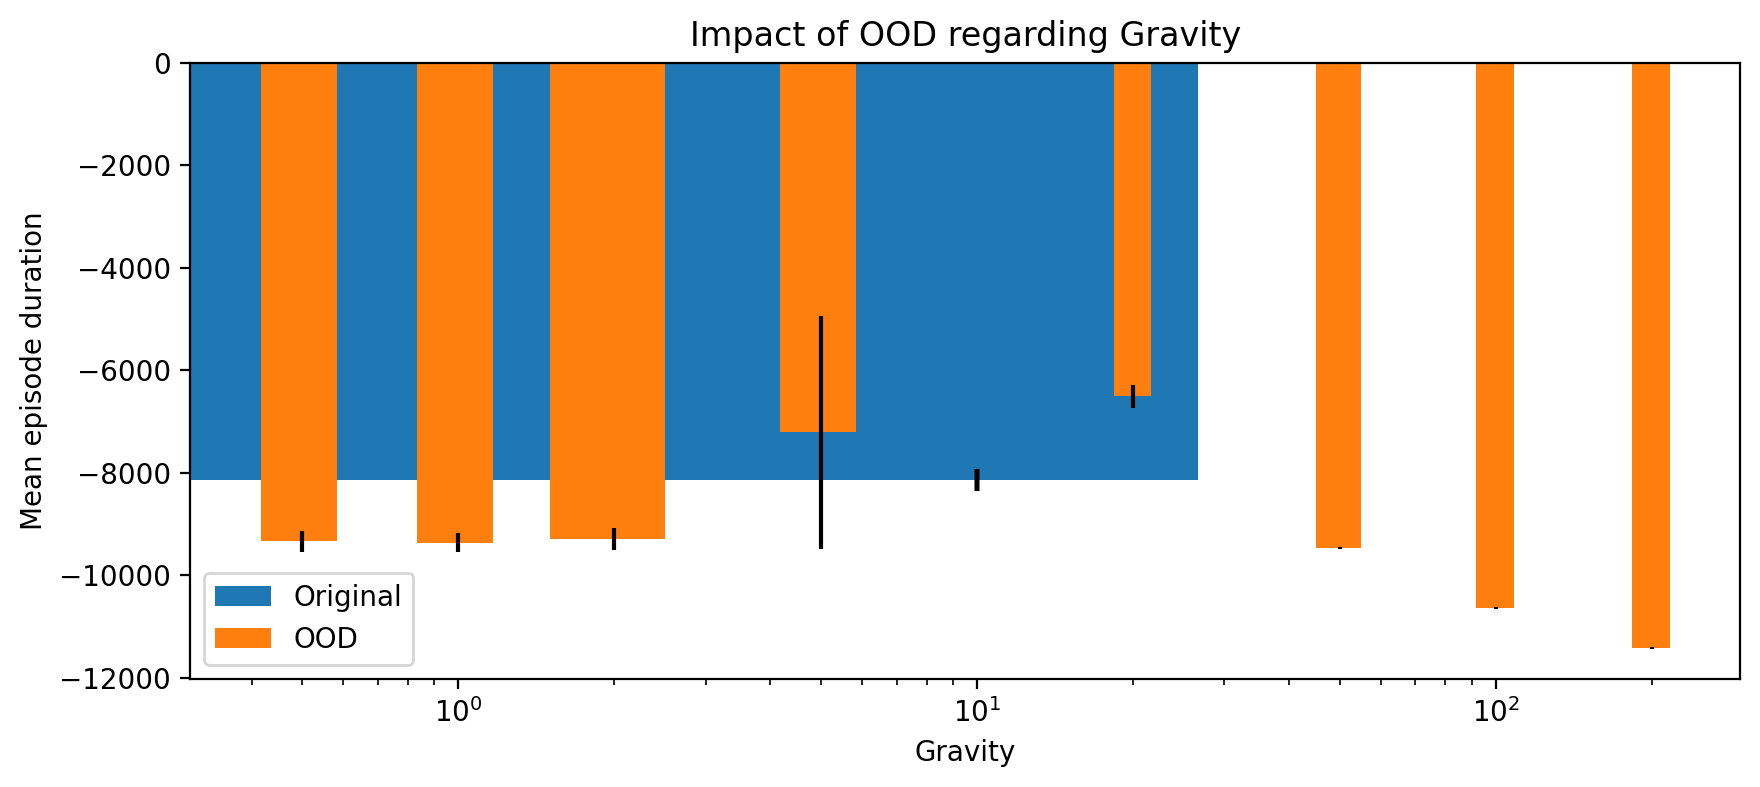

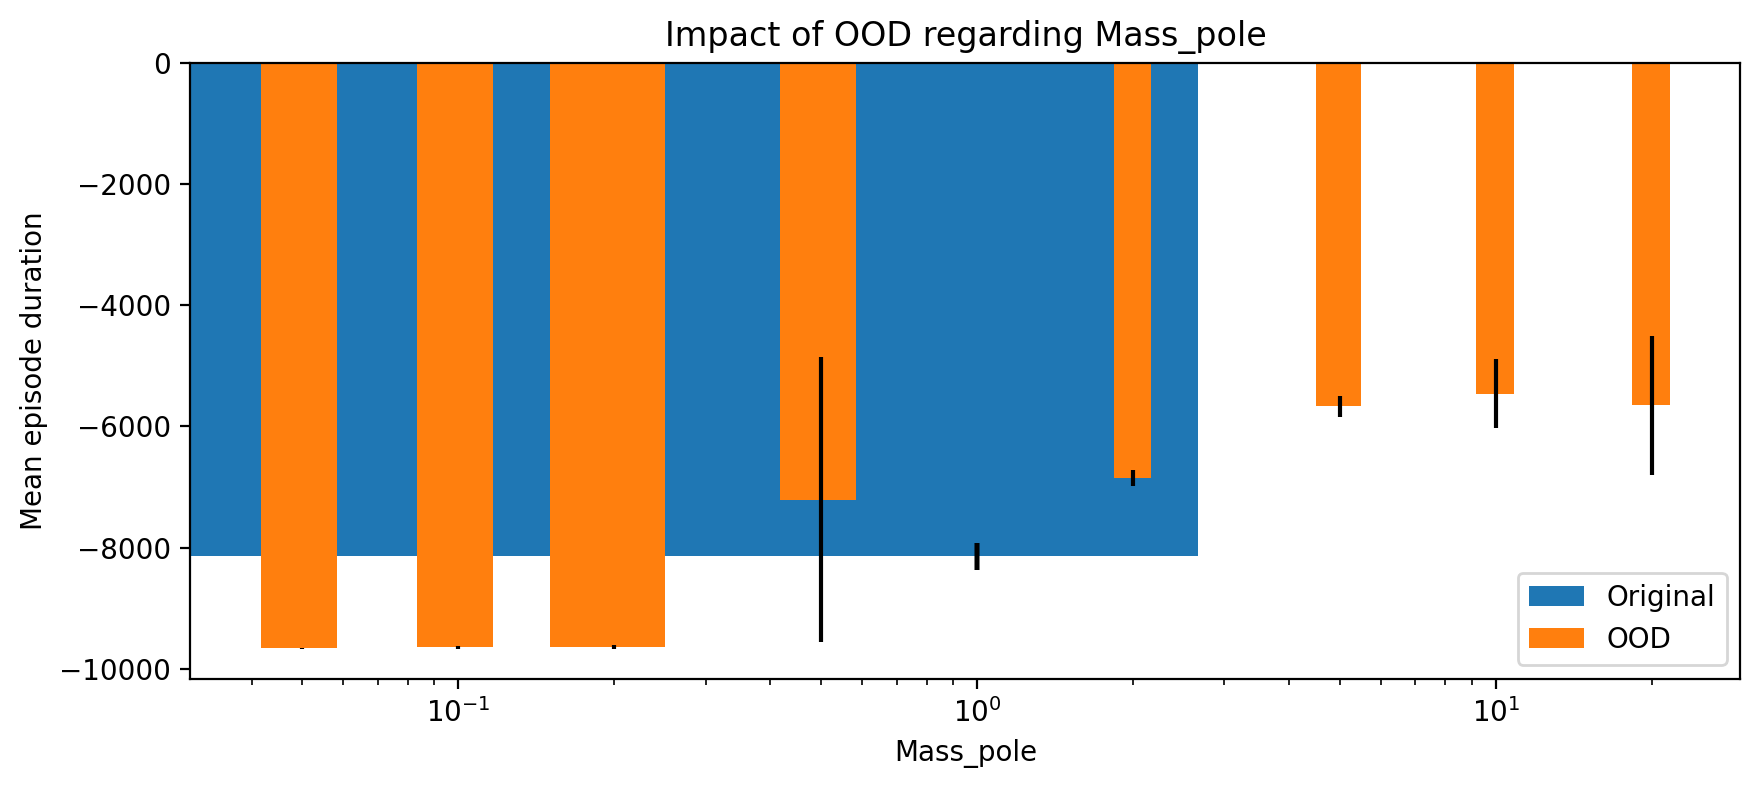

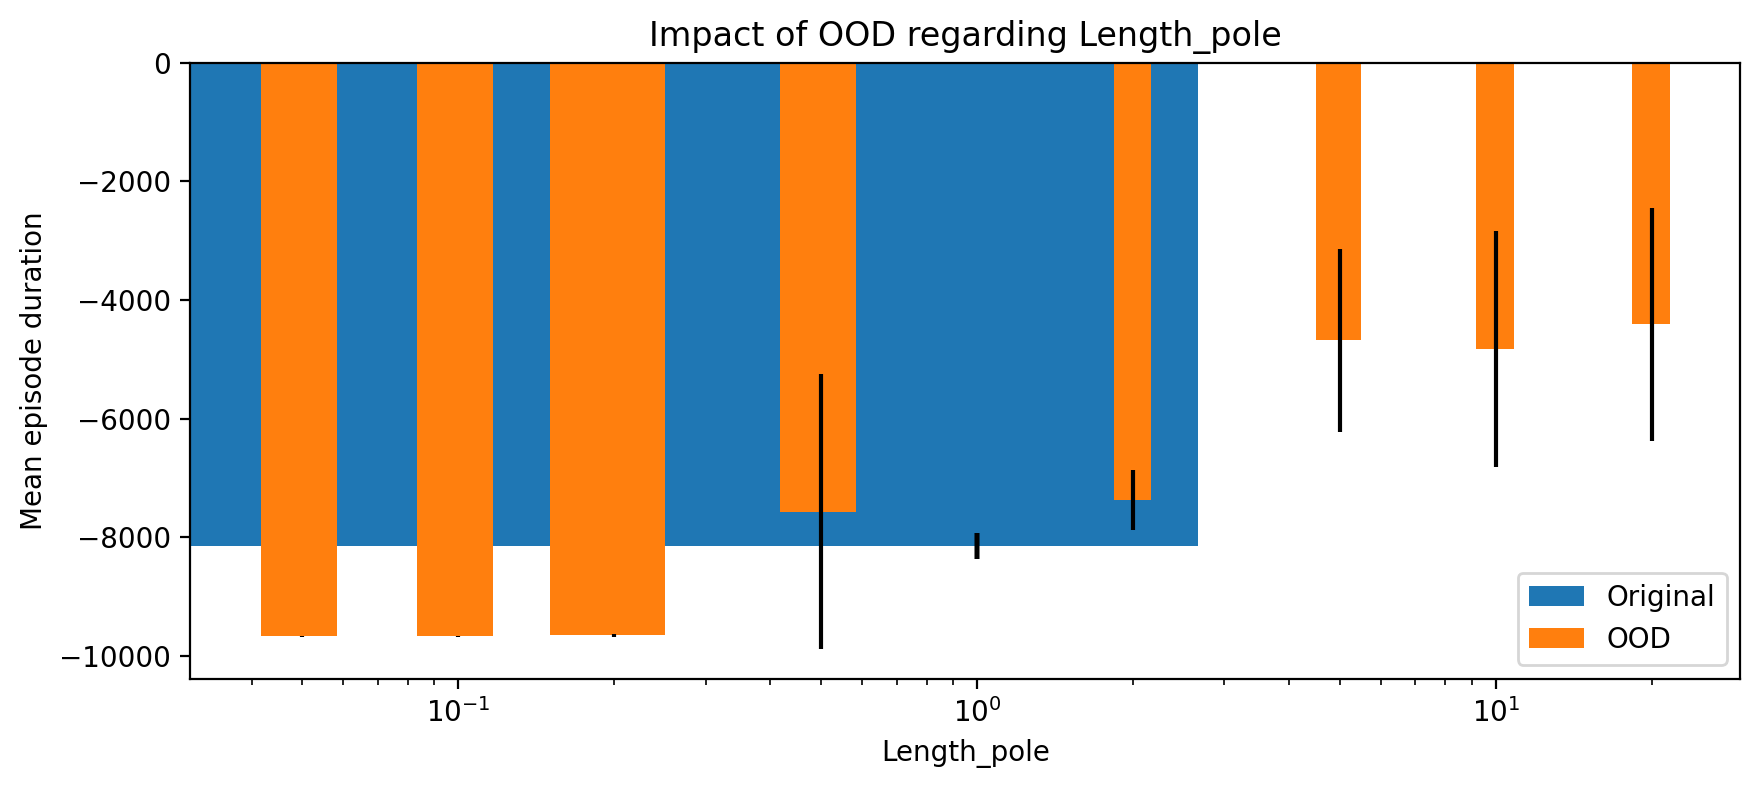

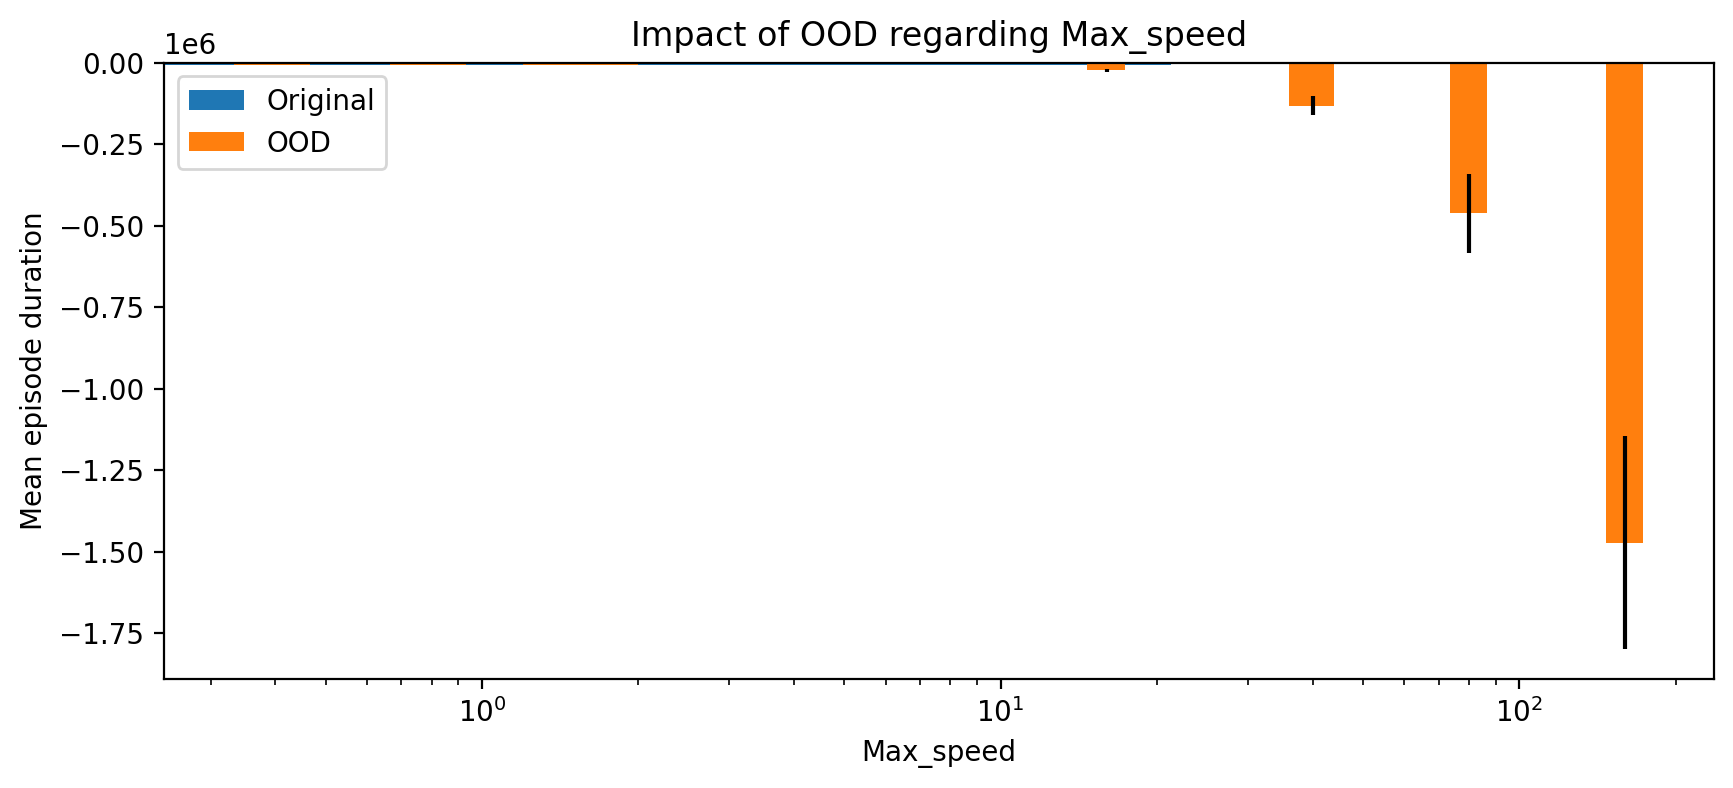

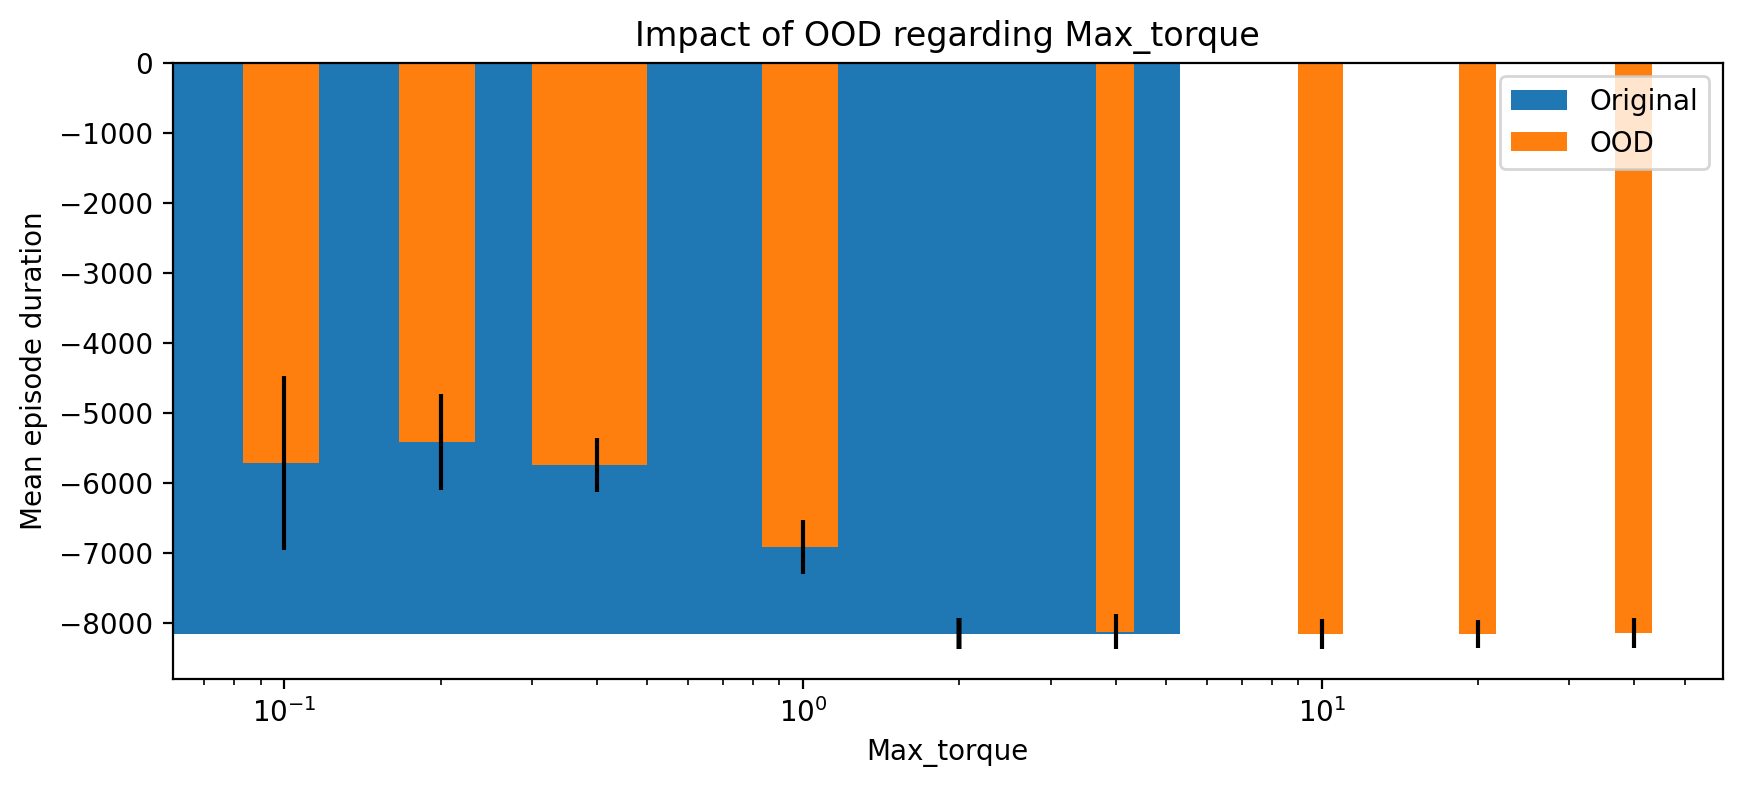

In [13]:
for key in results:
    fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
    ax.set_xscale('log')
    
    labels = copy(values[key])
    labels.append(default_values[key])
    labels = sorted(labels)
    
    width = np.array(labels[1:]) - np.array(labels[:-1]) 
    width /= 3
    #print(width, np.array([width[-1]]))
    #width = np.concatenate((width, np.array([width[-1]])))/ 5
    #print(width)
    ax.bar(default_values[key], original_result, yerr=original_std_result, width=width, label='Original')

    ax.bar(values[key], results[key], yerr=std_results[key], width=width, label='OOD')
    
    ax.set_xlabel(key)
    ax.set_ylabel('Mean episode duration')
    ax.set_title('Impact of OOD regarding '+key)
    ax.legend()
    """
    ax.bar(str(default_values[key]), original_result, width=width)
    labels = [str(x) for x in values[key]]
    ax.bar(labels, results[key], width=width)
    """
    

# Create OOD detector

The configuration ood detector is relative to its default environment

In [14]:
default_values, values = get_pendulum_values()
env = instanciate_pendulum(default_values)
ood_detector = MartingaleOODDetector(env, verbose=False)
default_values

{'Gravity': 10.0,
 'Mass_pole': 1.0,
 'Length_pole': 1.0,
 'Max_speed': 8.0,
 'Max_torque': 2.0}

We have a low ood score on the delaut environment

In [15]:
ood_detector.get_in_distrib_score()

0.3443990439410894

It should be higher on ood environment

In [16]:
ood_config = get_ood_configs(default_values, values)[-1]
ood_env = instanciate_pendulum(ood_config)
ood_config

{'Gravity': 10.0,
 'Mass_pole': 1.0,
 'Length_pole': 1.0,
 'Max_speed': 8.0,
 'Max_torque': 40.0,
 'change': 'Max_torque'}

In [17]:
ood_score = ood_detector.test_ood(ood_env, nb_steps=100)
ood_score

0.34499333703590523

Let's compute the ood scores of the previously studies ood environments

In [18]:
default_values, values = get_pendulum_values()
mean_ood_scores = {}
std_ood_scores = {}

original_env = instanciate_pendulum(default_values)
agent = PPO.load(path/'Agents'/'trained_pendulum_10000', env=original_env)
ood_detector = MartingaleOODDetector(env)
in_distrib_score = ood_detector.get_in_distrib_score()

for config in tqdm(ood_configs):
    if config['change'] not in mean_ood_scores:
        mean_ood_scores[config['change']] = []
        std_ood_scores[config['change']] = []
    
    ood_env = instanciate_pendulum(config)
    agent = PPO.load(path/'Agents'/'trained_pendulum_10000', env=ood_env)
    list_scores = np.array([ood_detector.test_ood(ood_env, nb_steps=100) for _ in range(10)])
    ood_score = list_scores.mean()
    std_score = list_scores.std()

    #mean_reward, std_reward = evaluate(ood_env, agent, nb_episodes=10)

    mean_ood_scores[config['change']].append(ood_score)
    std_ood_scores[config['change']].append(std_score)
    #print(config, mean_reward)
    



 40%|████      | 16/40 [00:09<00:08,  2.69it/s]/Users/gardille/opt/anaconda3/envs/accenta/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/gardille/opt/anaconda3/envs/accenta/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/gardille/opt/anaconda3/envs/accenta/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/gardille/opt/anaconda3/envs/accenta/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/gardille/opt/anaconda3/envs/accenta/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: ove

We now realise a plot of the mean reward and ood scores of each environment. The ones of the delaut environment are in darker colour at the middle of the plot.

In [19]:
width

array([0.03333333, 0.06666667, 0.2       , 0.33333333, 0.66666667,
       2.        , 3.33333333, 6.66666667])

100%|██████████| 5/5 [00:00<00:00, 36.77it/s]


width [  0.5   1.    3.    5.   10.   30.   50.  100. ]
width [ 0.05  0.1   0.3   0.5   1.    3.    5.   10.  ]
width [ 0.05  0.1   0.3   0.5   1.    3.    5.   10.  ]
width [ 0.4  0.8  2.4  4.   8.  24.  40.  80. ]
width [ 0.1  0.2  0.6  1.   2.   6.  10.  20. ]


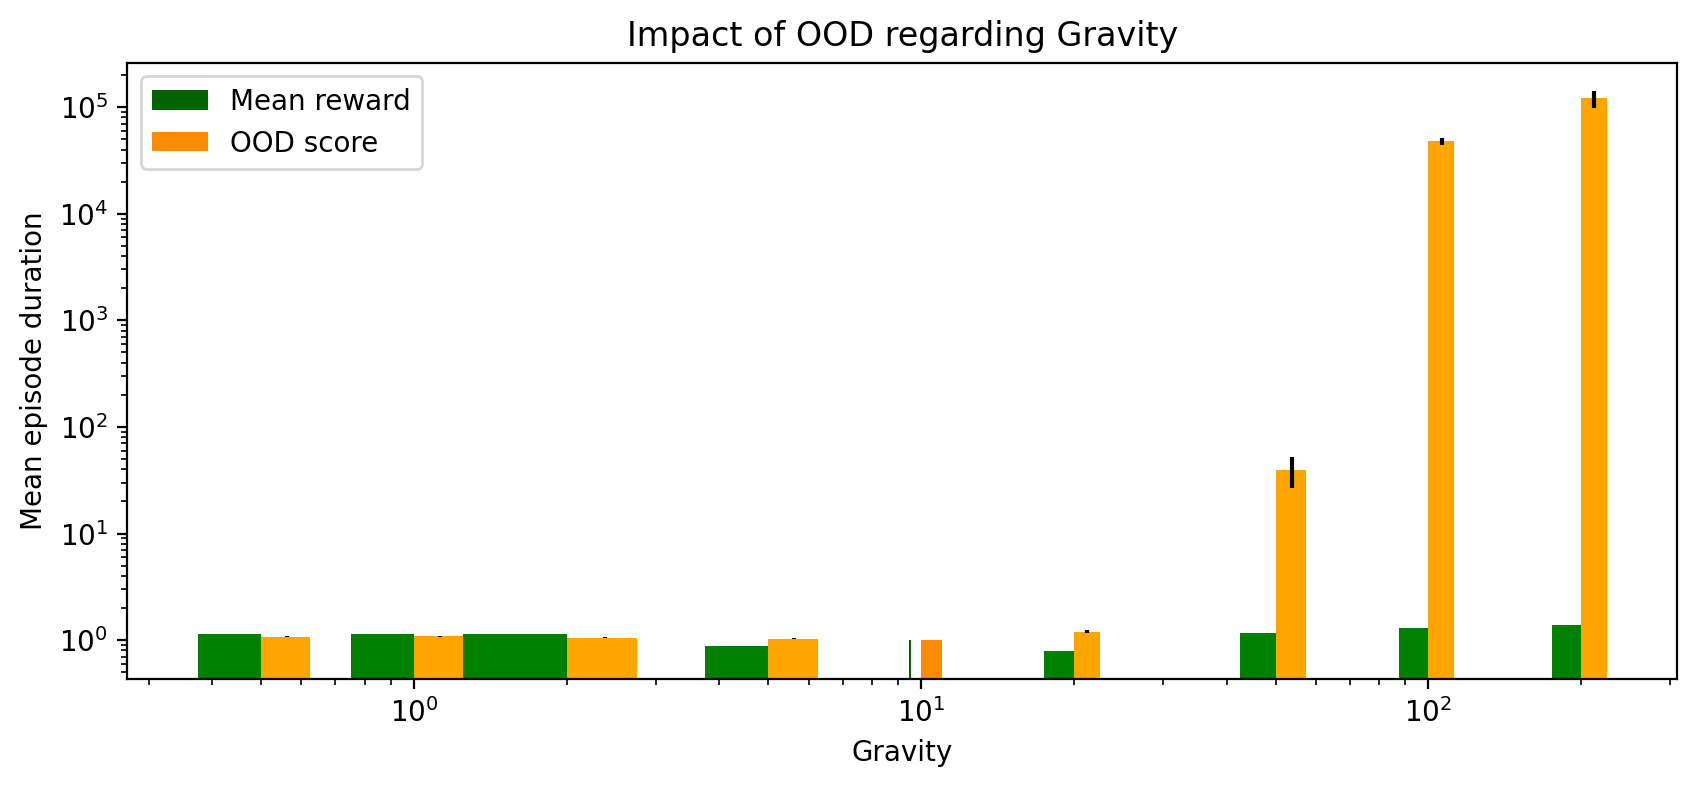

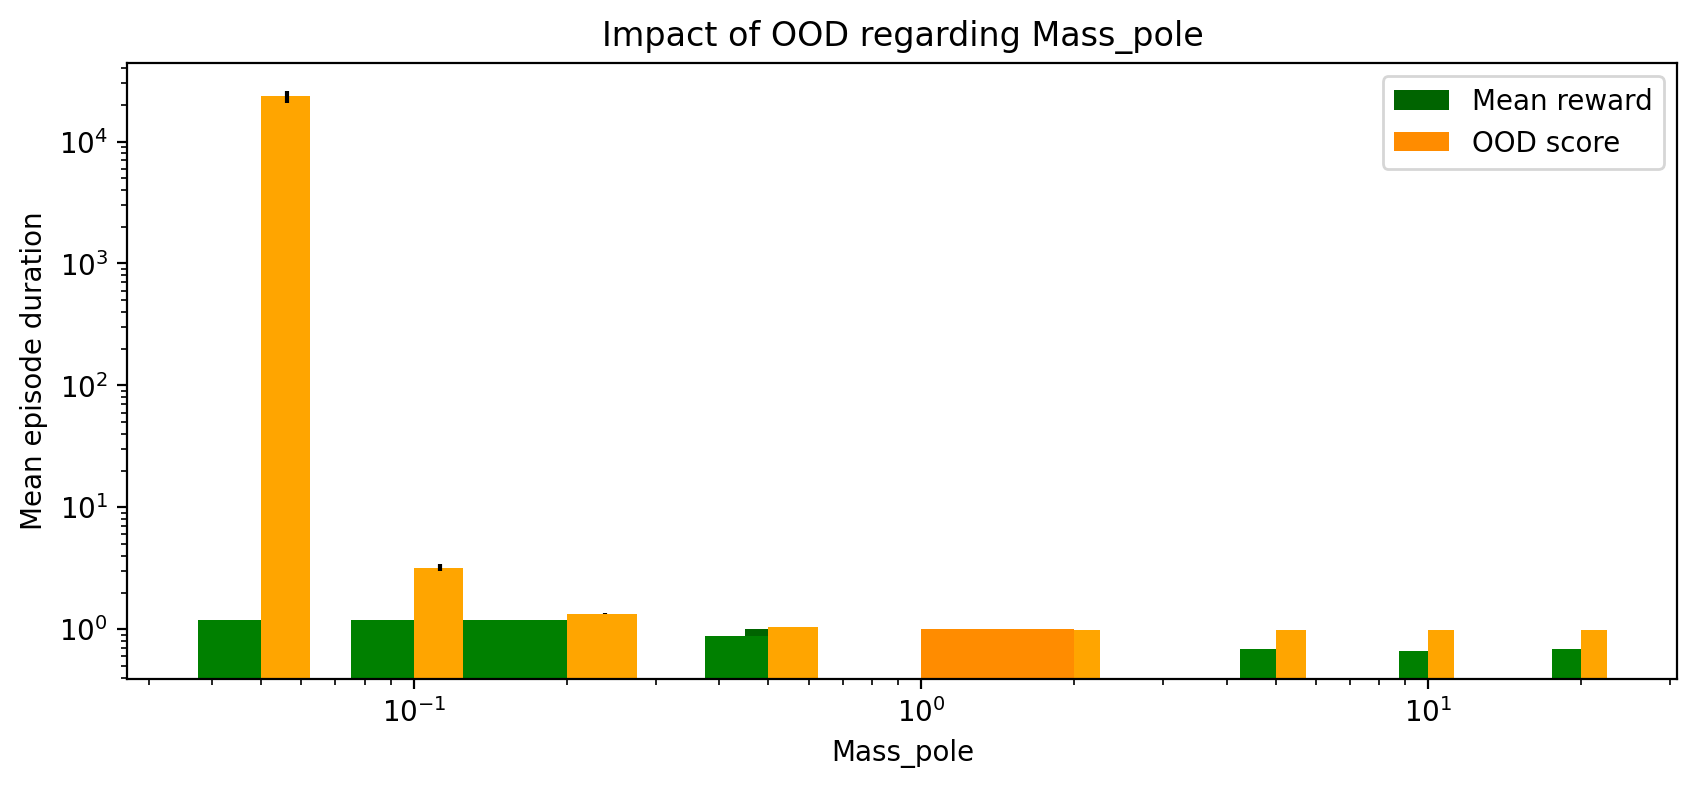

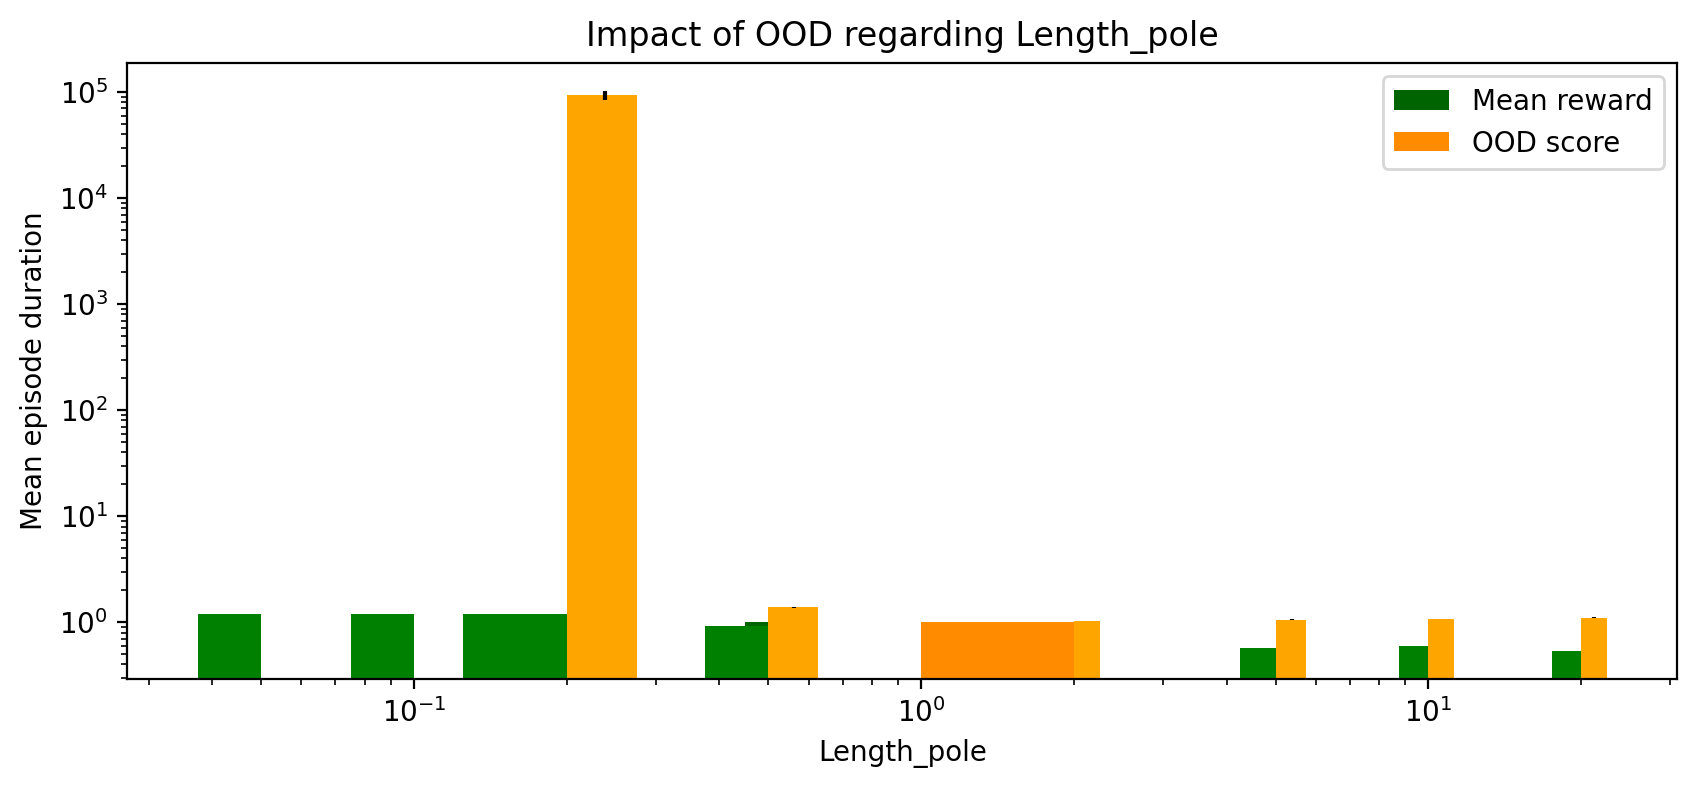

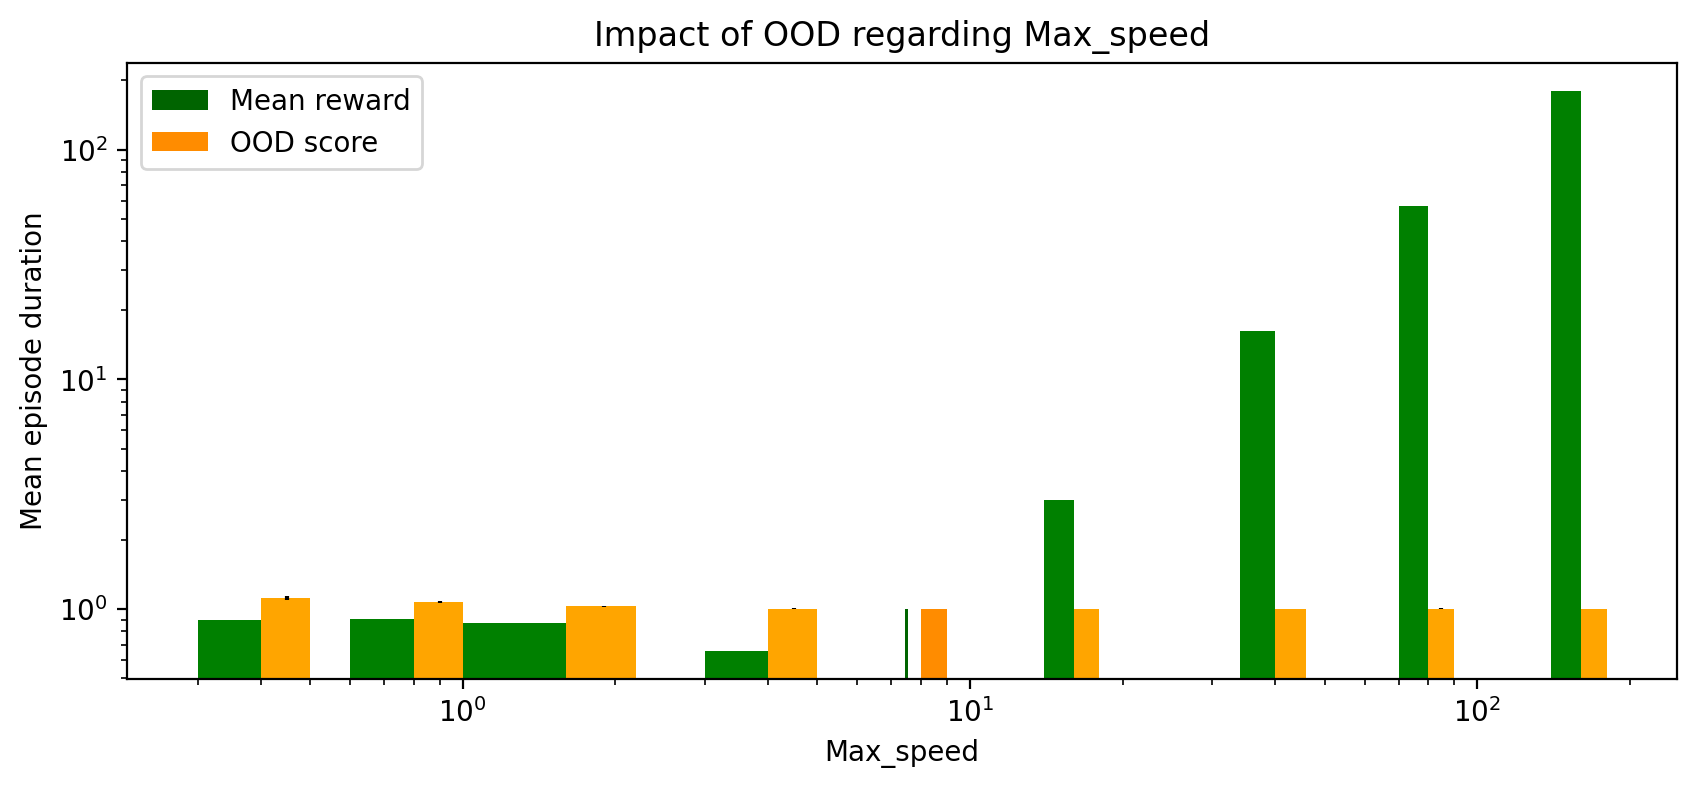

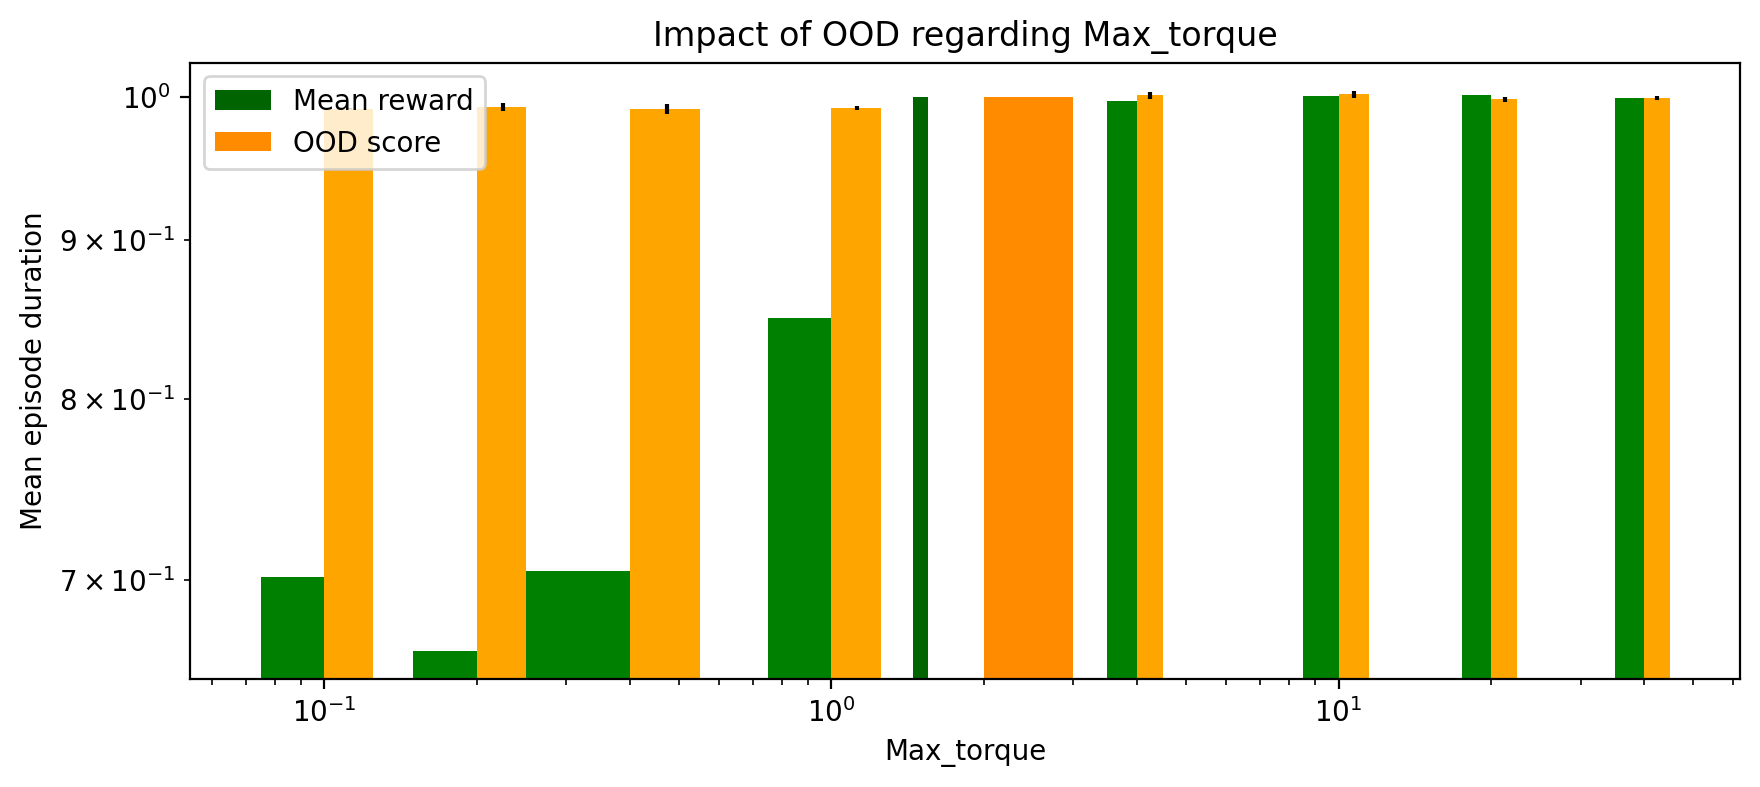

In [20]:
from turtle import color


for key in tqdm(results):
    fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    labels = copy(values[key])
    labels.append(default_values[key])
    labels = sorted(labels)
    
    ref_width = 1.0
    width = np.array(labels[1:]) - np.array(labels[:-1]) 
    print("width", width)
    width /= 4

    ax.bar(default_values[key]- ref_width/2, ref_width, width=0.1, label='Mean reward', color='darkgreen')
    ax.bar(values[key]- width/2, results[key]/original_result, width=width,  color='green')

    ax.bar(default_values[key]+ref_width/2, 1.0, width=ref_width, label='OOD score', color='darkorange')
    ax.bar(values[key]+ width/2, mean_ood_scores[key]/in_distrib_score, width=width, color='orange', yerr=std_ood_scores[key])
    
    ax.set_xlabel(key)
    ax.set_ylabel('Mean episode duration')
    ax.set_title('Impact of OOD regarding '+key)

    plt.legend() #prop={'size': 'medium'}, ncol=2)
   

We add as maning in distribution examples and there are ood examples

In [21]:
original_env = instanciate_pendulum(default_values)
agent = PPO.load(path/'Agents'/'trained_pendulum_10000', env=original_env)

list_scores = []
for _ in trange(5*18):
    list_scores.append(np.array([ood_detector.test_ood(original_env, nb_steps=100) for _ in range(10)]).mean())

mean_ood_scores['None'] = list_scores

100%|██████████| 90/90 [00:30<00:00,  2.95it/s]


# Computation of the AUC score

In [22]:
def compute_AUC(mean_ood_scores, plot=True, verbose=False):
    TPRs = []
    FPRs = []

    thresholds = [10**(-i/10) for i in range(-50, 50+1)]
    for threshold in thresholds:
        false_pos=0
        false_neg=0
        true_pos=0
        true_neg=0

        for key in mean_ood_scores:
            if str(key) != 'None': # Env OOD
                for test_res in mean_ood_scores[key]:

                    if test_res<threshold: # Not detected as OOD
                        false_neg +=1
                    else:
                        true_pos +=1
            else: # Env standard
                for test_res in mean_ood_scores[key]:

                    if test_res>threshold: # Detected as OOD
                        false_pos +=1
                    else:
                        true_neg +=1


        try:
            tpr = true_pos/(true_pos+false_neg)
        except ZeroDivisionError:
            print('error computing tpr')
            continue
            tpr = 1.0
        
        try:
            fpr = false_pos/(false_pos+true_neg)
        except ZeroDivisionError:
            print('error computing fpr')
            continue

        if verbose:
            print(threshold)
            print('TP', true_pos, 'FP',false_pos)
            print('FN', false_neg, 'TN',true_neg)
            print()
            print(tpr, fpr)
        TPRs.append(tpr)
        FPRs.append(fpr)
        #AUC += tpr/len(thresholds)

    if verbose:
        plt.title("TPR and FPR curves")
        plt.plot(TPRs, label='TPR')
        plt.plot(FPRs, label='FPR')
        plt.legend()
        plt.show()
        
    #print('AUC: ', AUC)
    plt.title("ROC curve")
    plt.plot(FPRs, TPRs,'-*')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    plt.show()

    AUC = integrate.simps(x=FPRs, y=TPRs, even='avg')
    return AUC

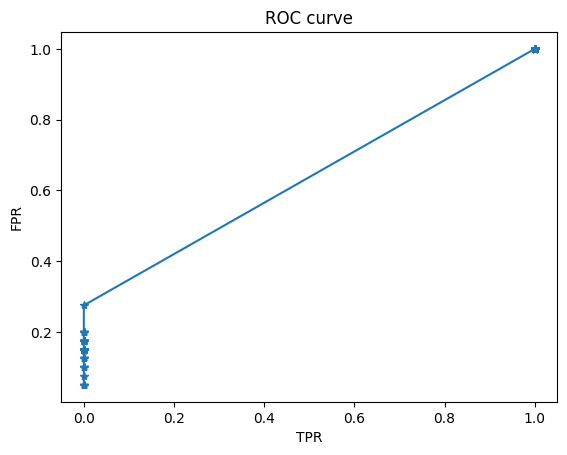

0.42499999999999993

In [23]:
compute_AUC(mean_ood_scores)